**Library Import**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import pickle
import json


**Commonly used Filtering Functions**

In [4]:
def normalization(x):
    X = []
    x_min = np.min(x)
    x_max = np.max(x)

    with open('norm.json','w') as file:
        json.dump([x_min,x_max],file)
        file.close()

    for i in x :
        X.append((i-x_min)/(x_max-x_min))

    return X

def standardization(x):
    X = []
    x_mean = np.mean(x)
    x_sig = np.std(x)

    with open('standard.json','w') as file:
        json.dump([x_mean,x_sig],file)
        file.close()

    for i in x :
        X.append((i-x_mean)/(x_sig))
    return X

**Initial Cleaning**


In [5]:
df = pd.read_csv('creditcard.csv')
df = df.drop('id',axis=1)
df = df.dropna(subset='Class')
df = df.fillna(0)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


**Attribute Visualization**

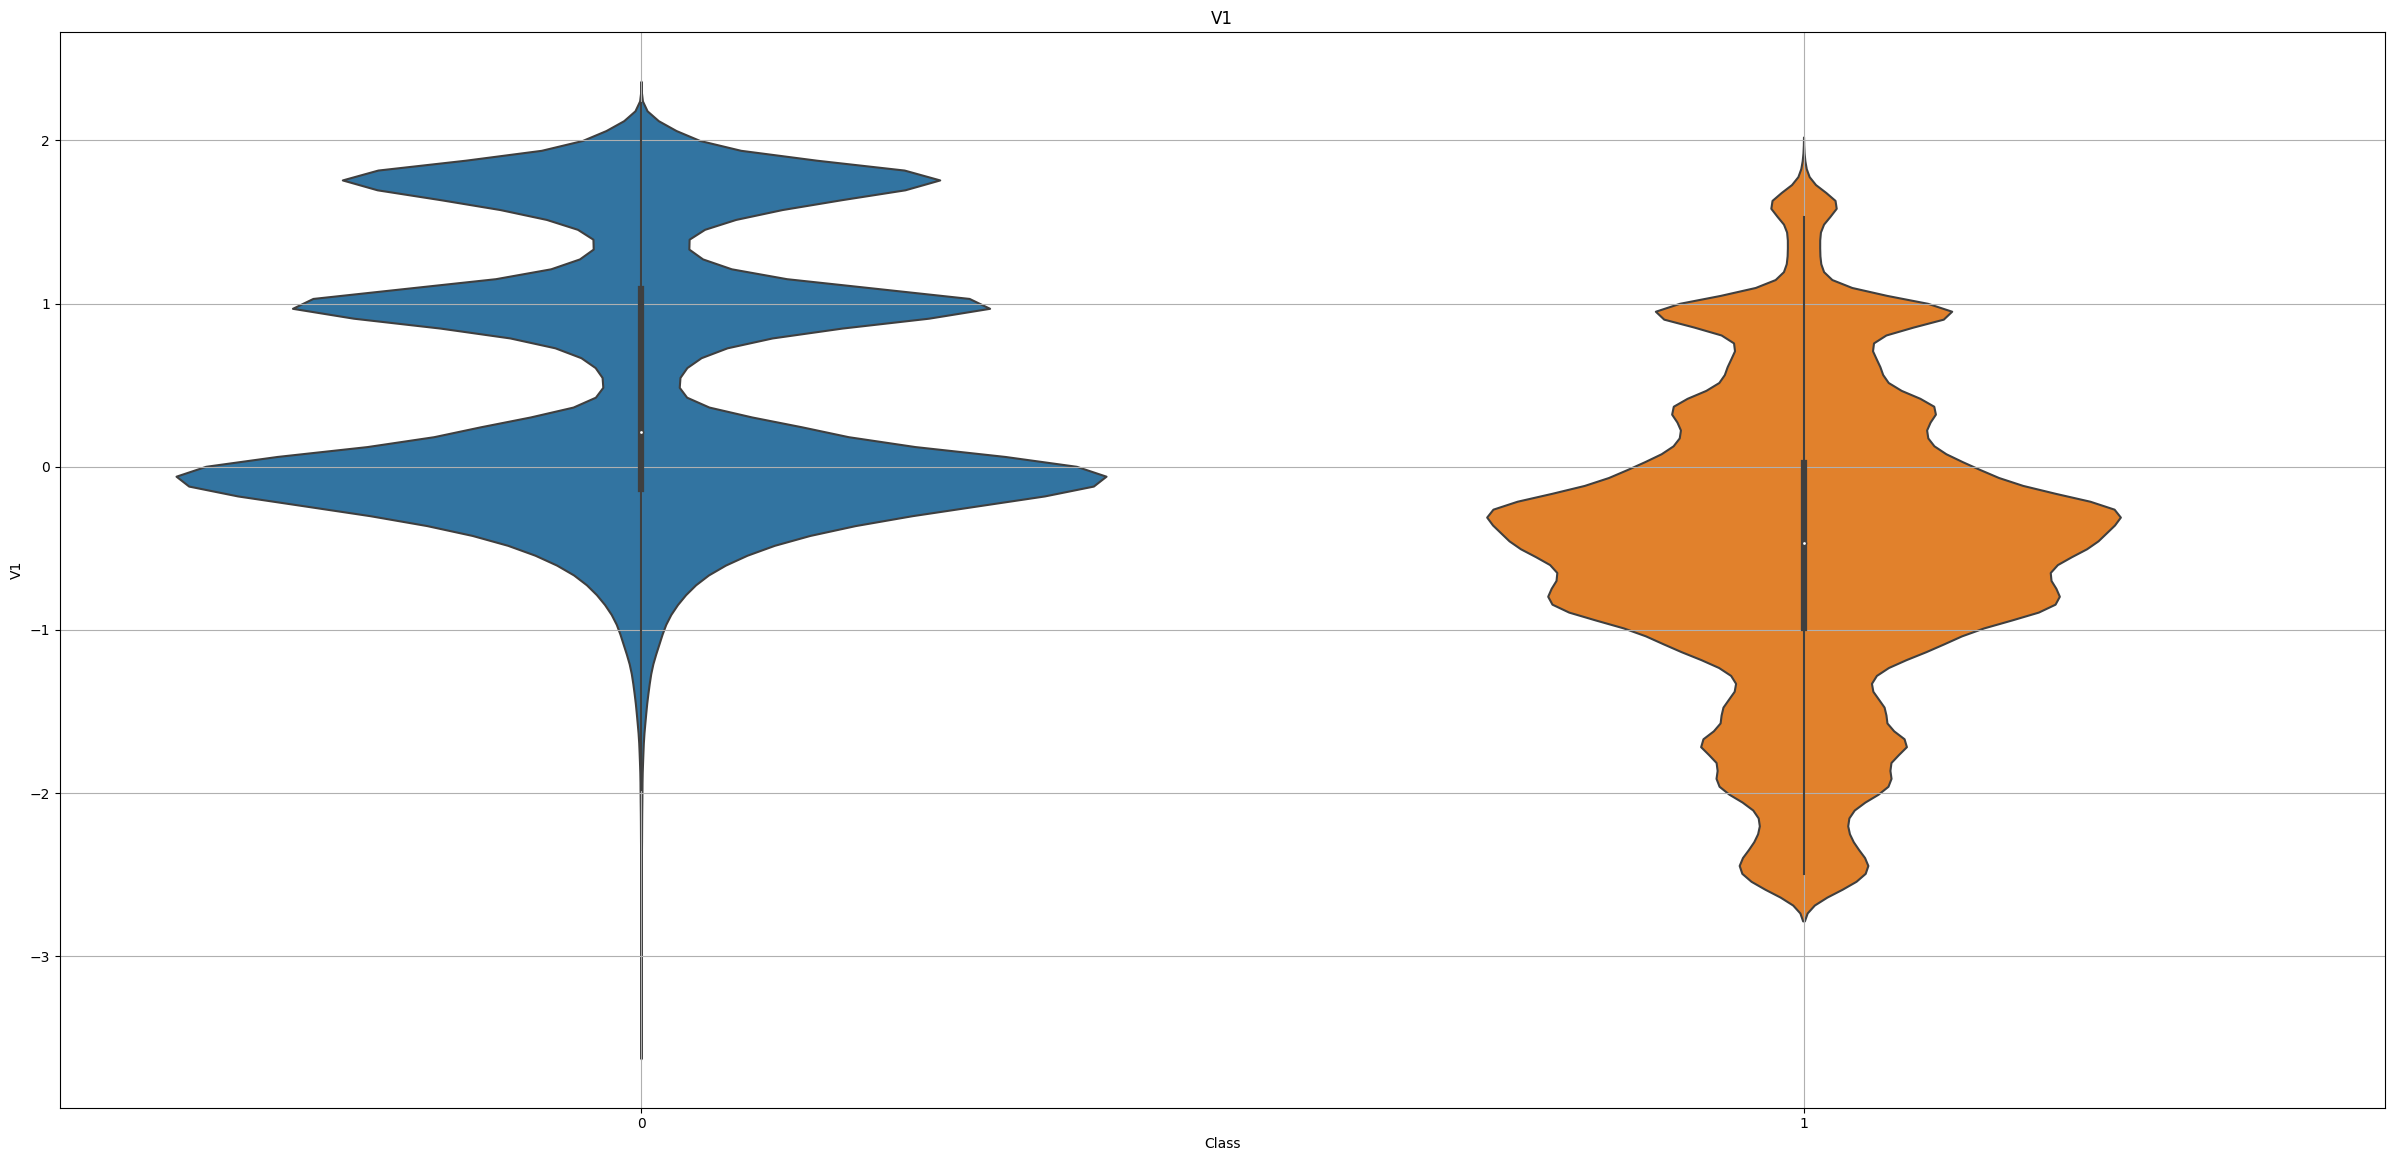

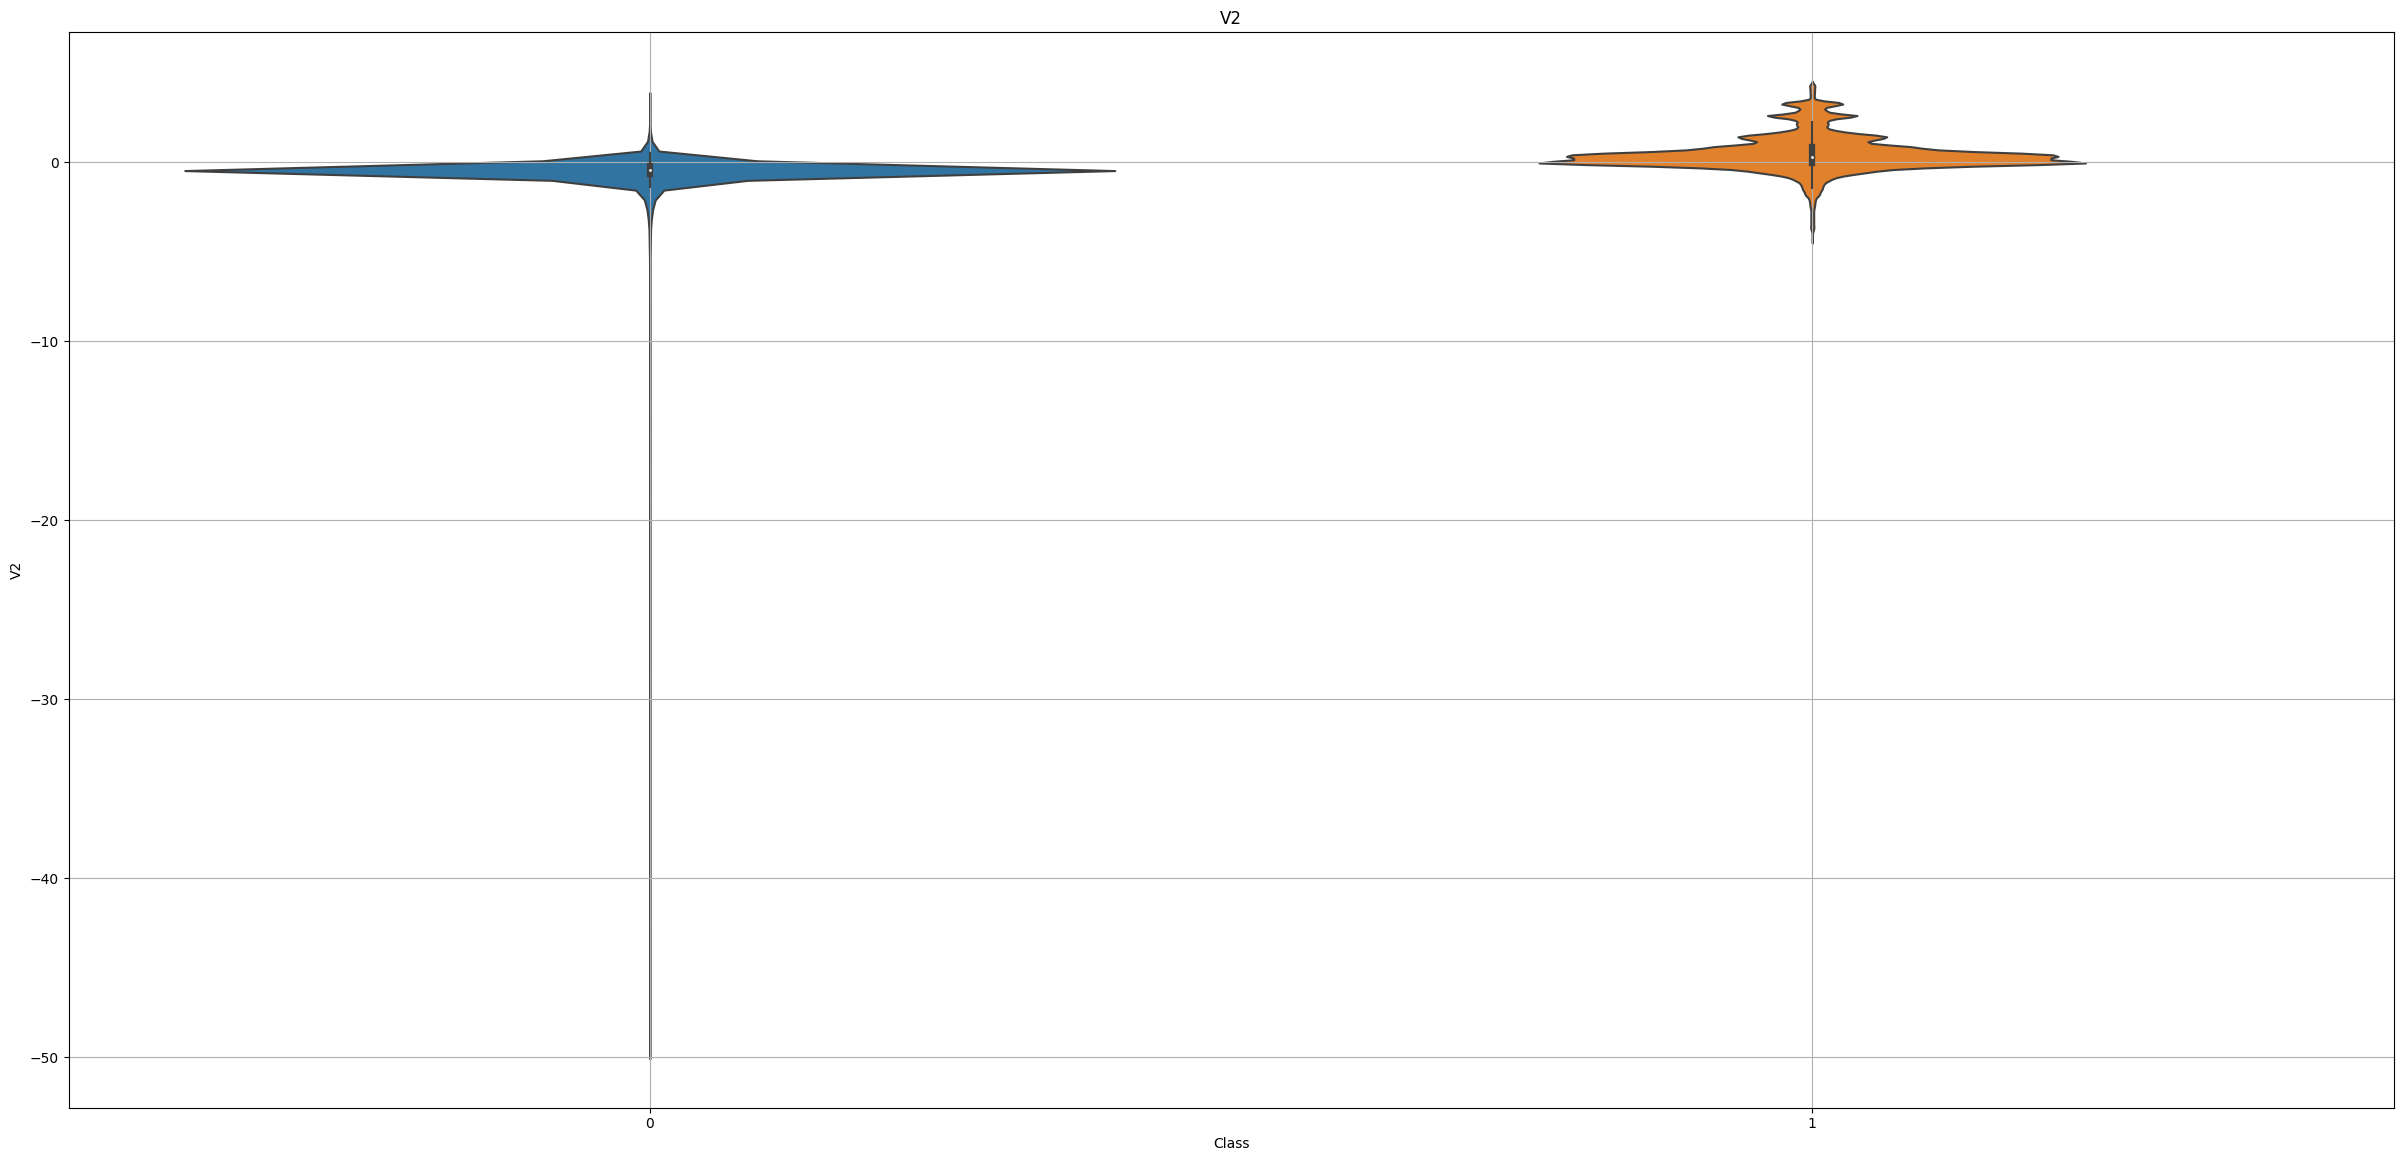

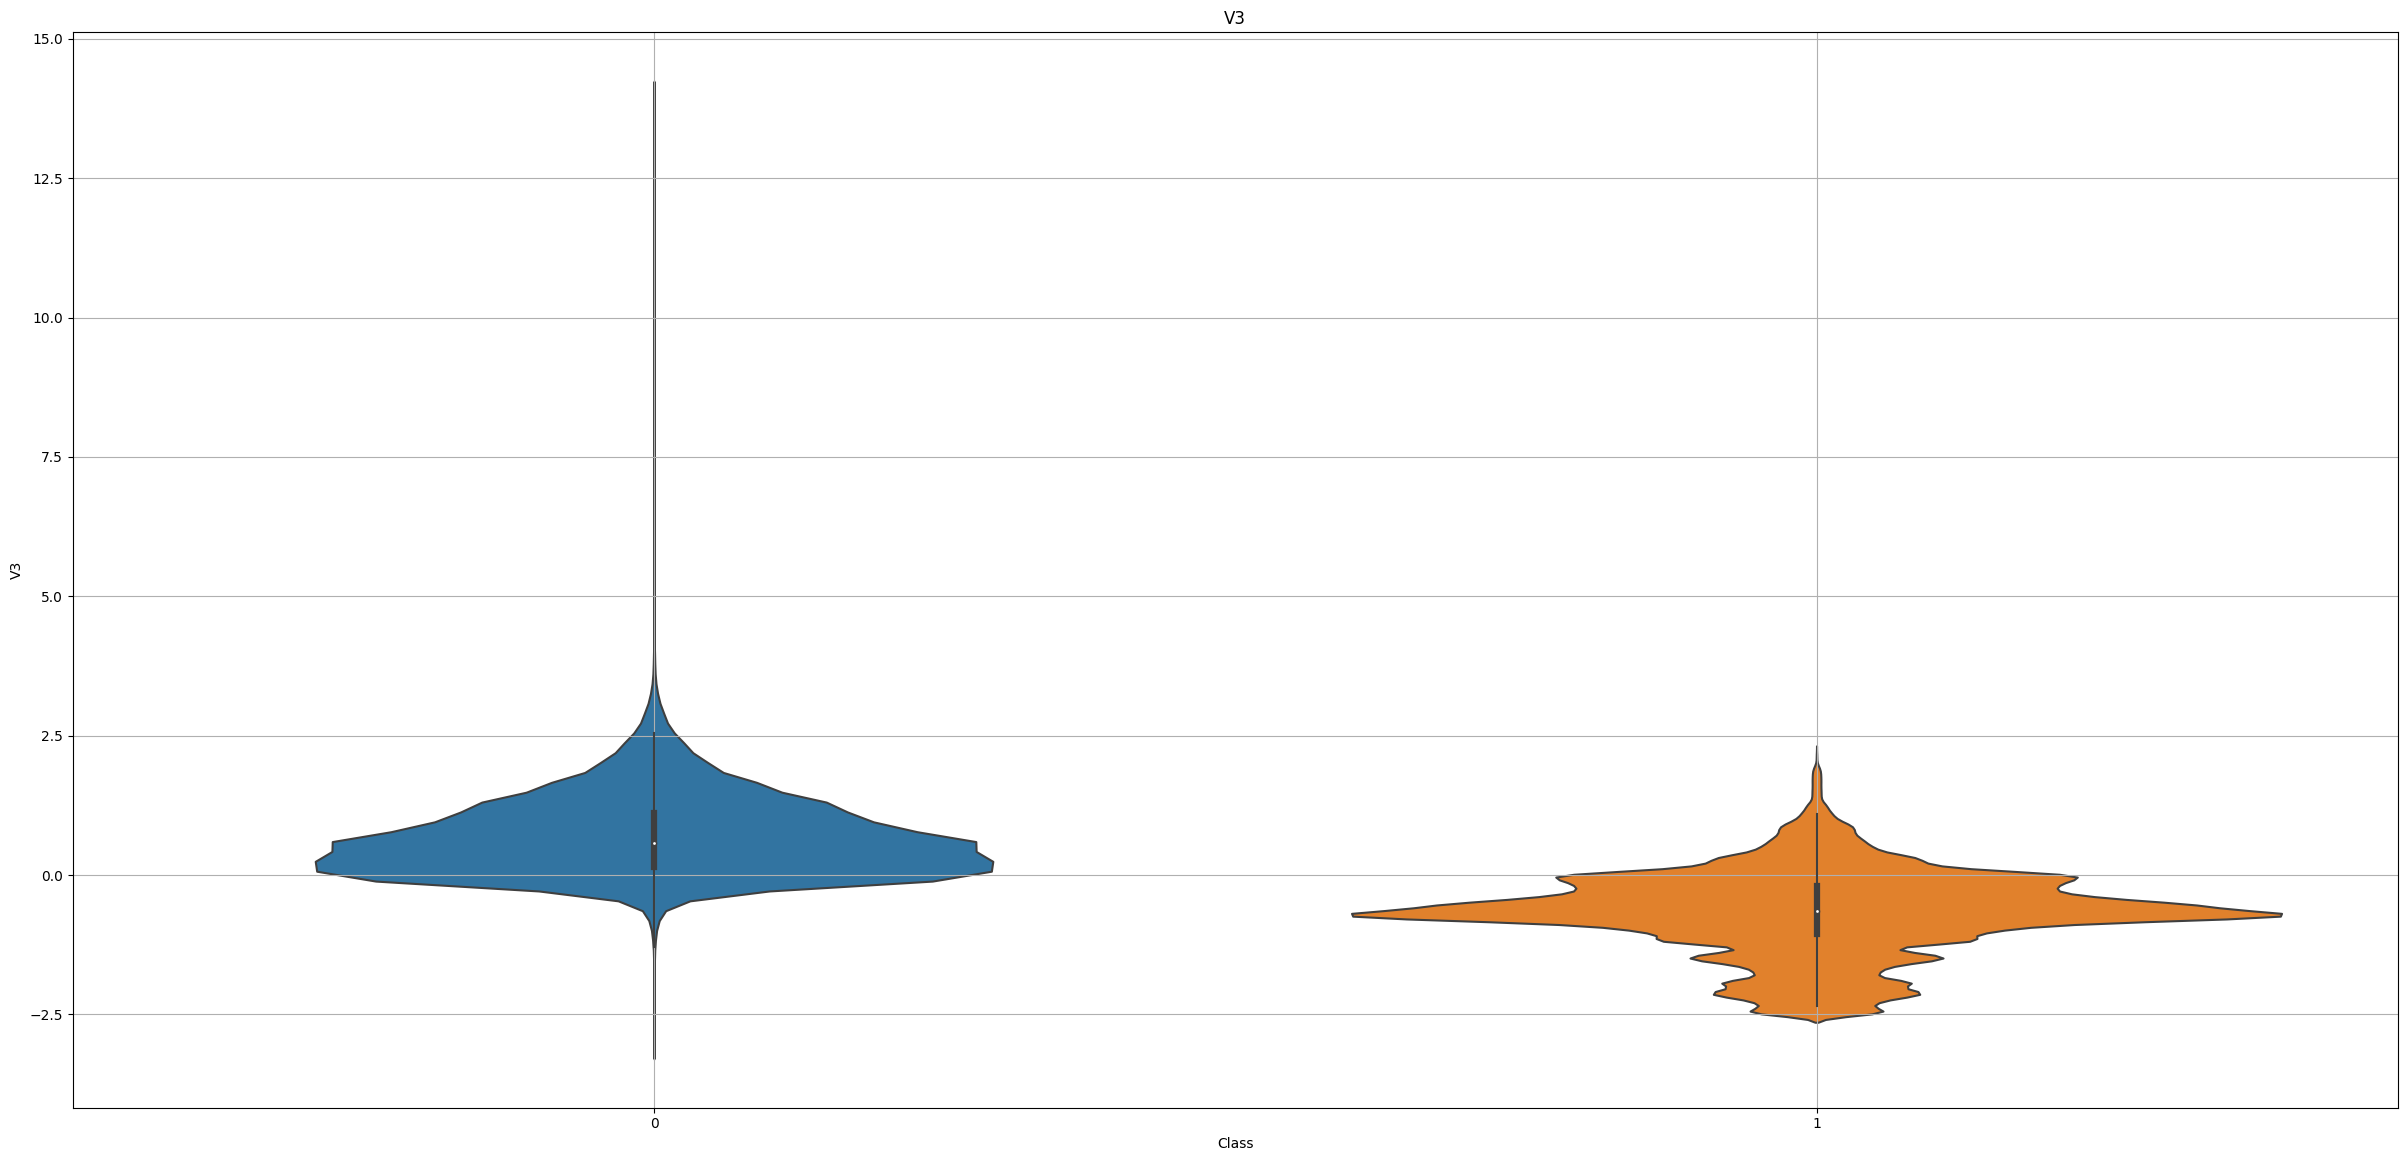

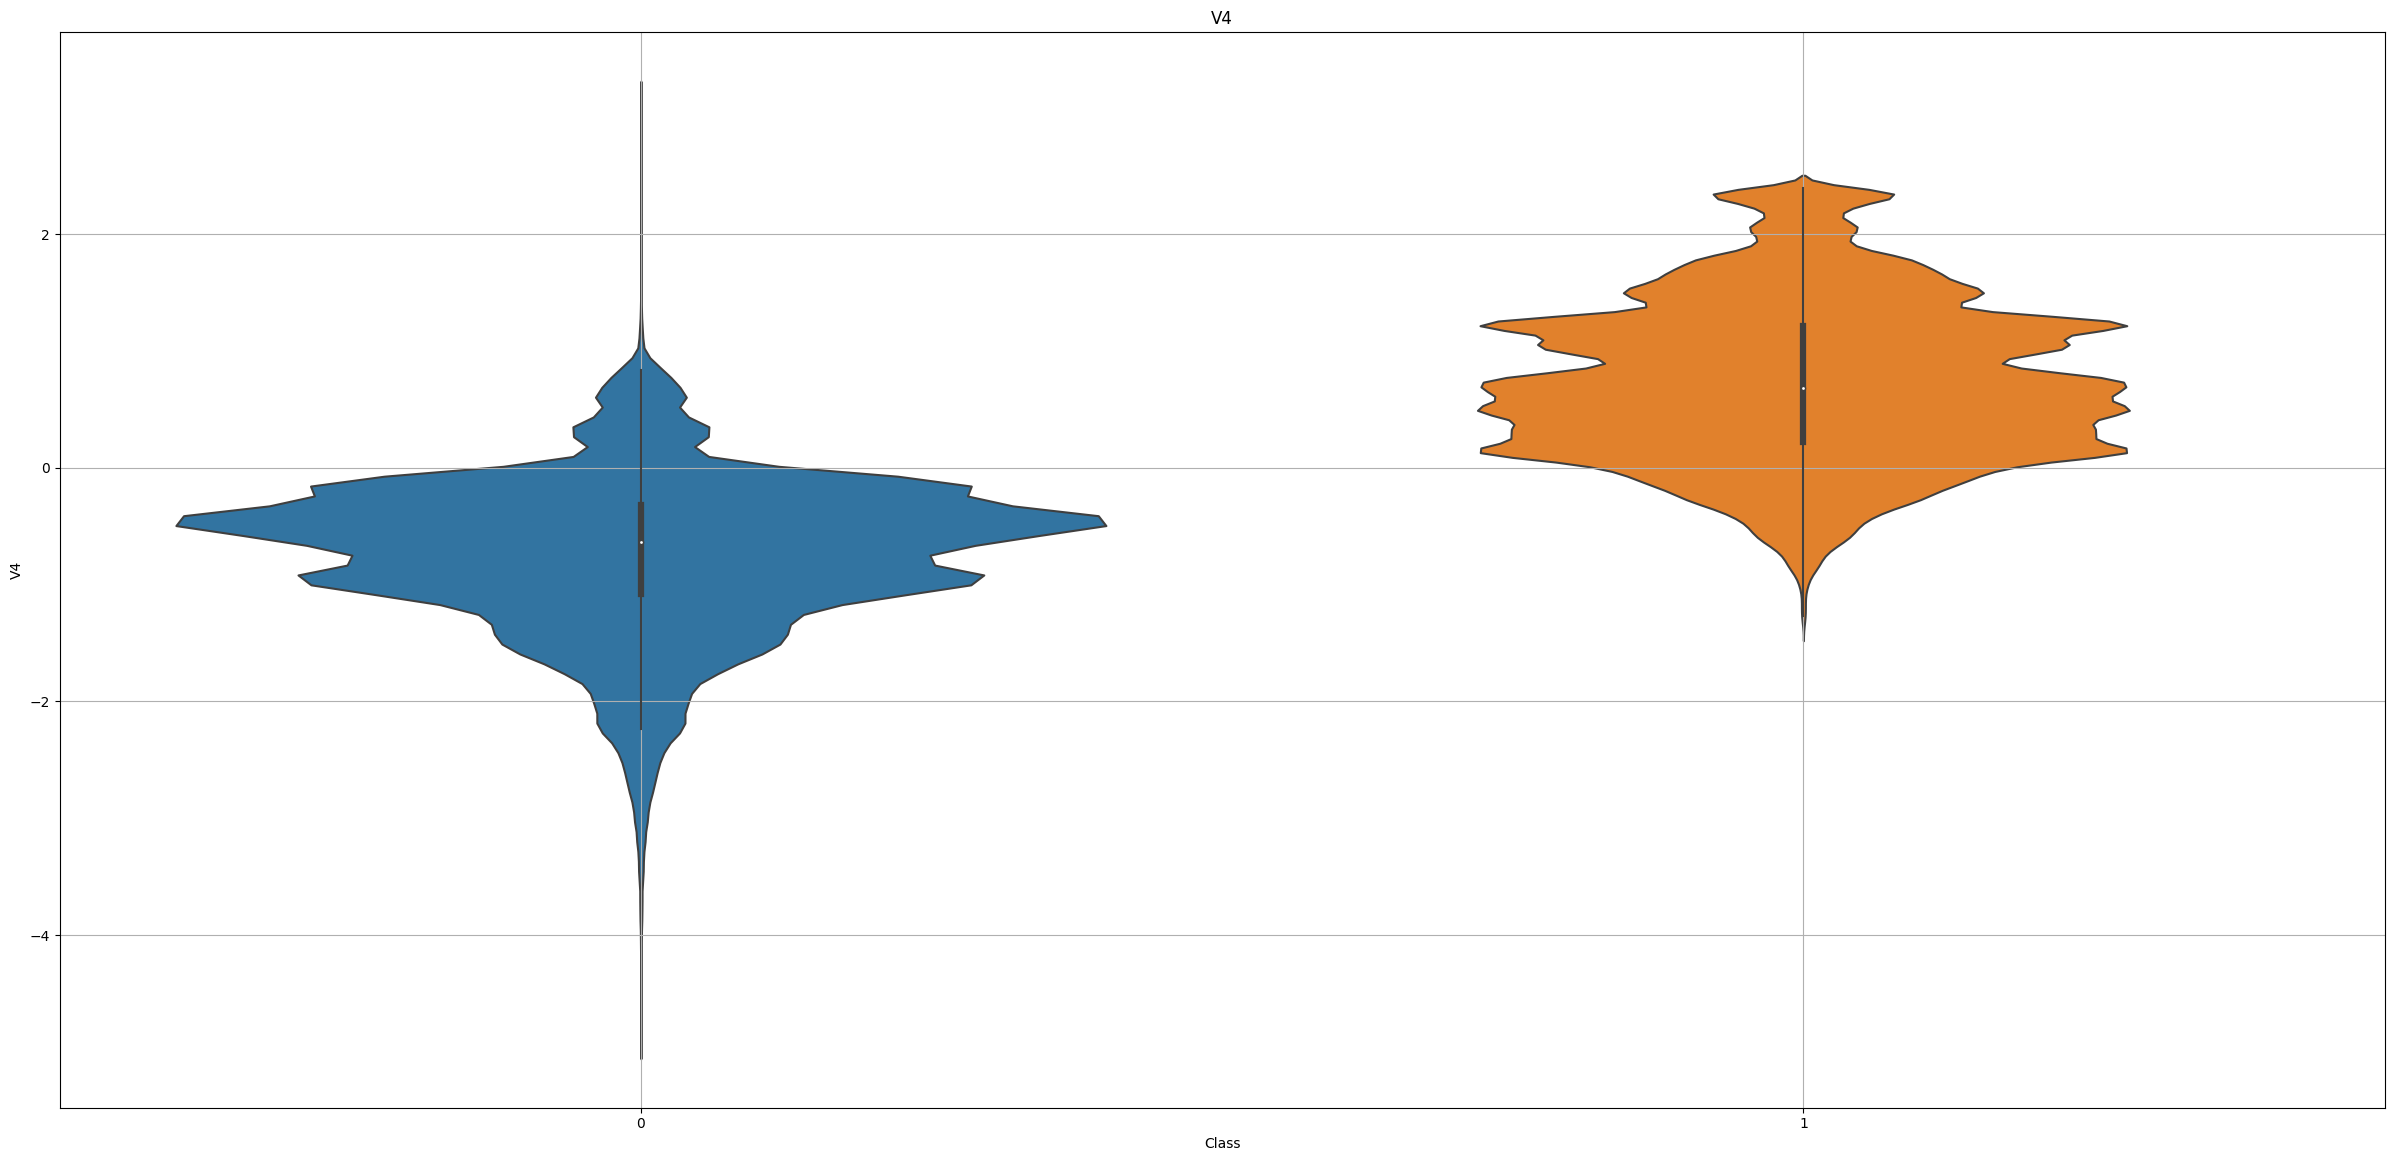

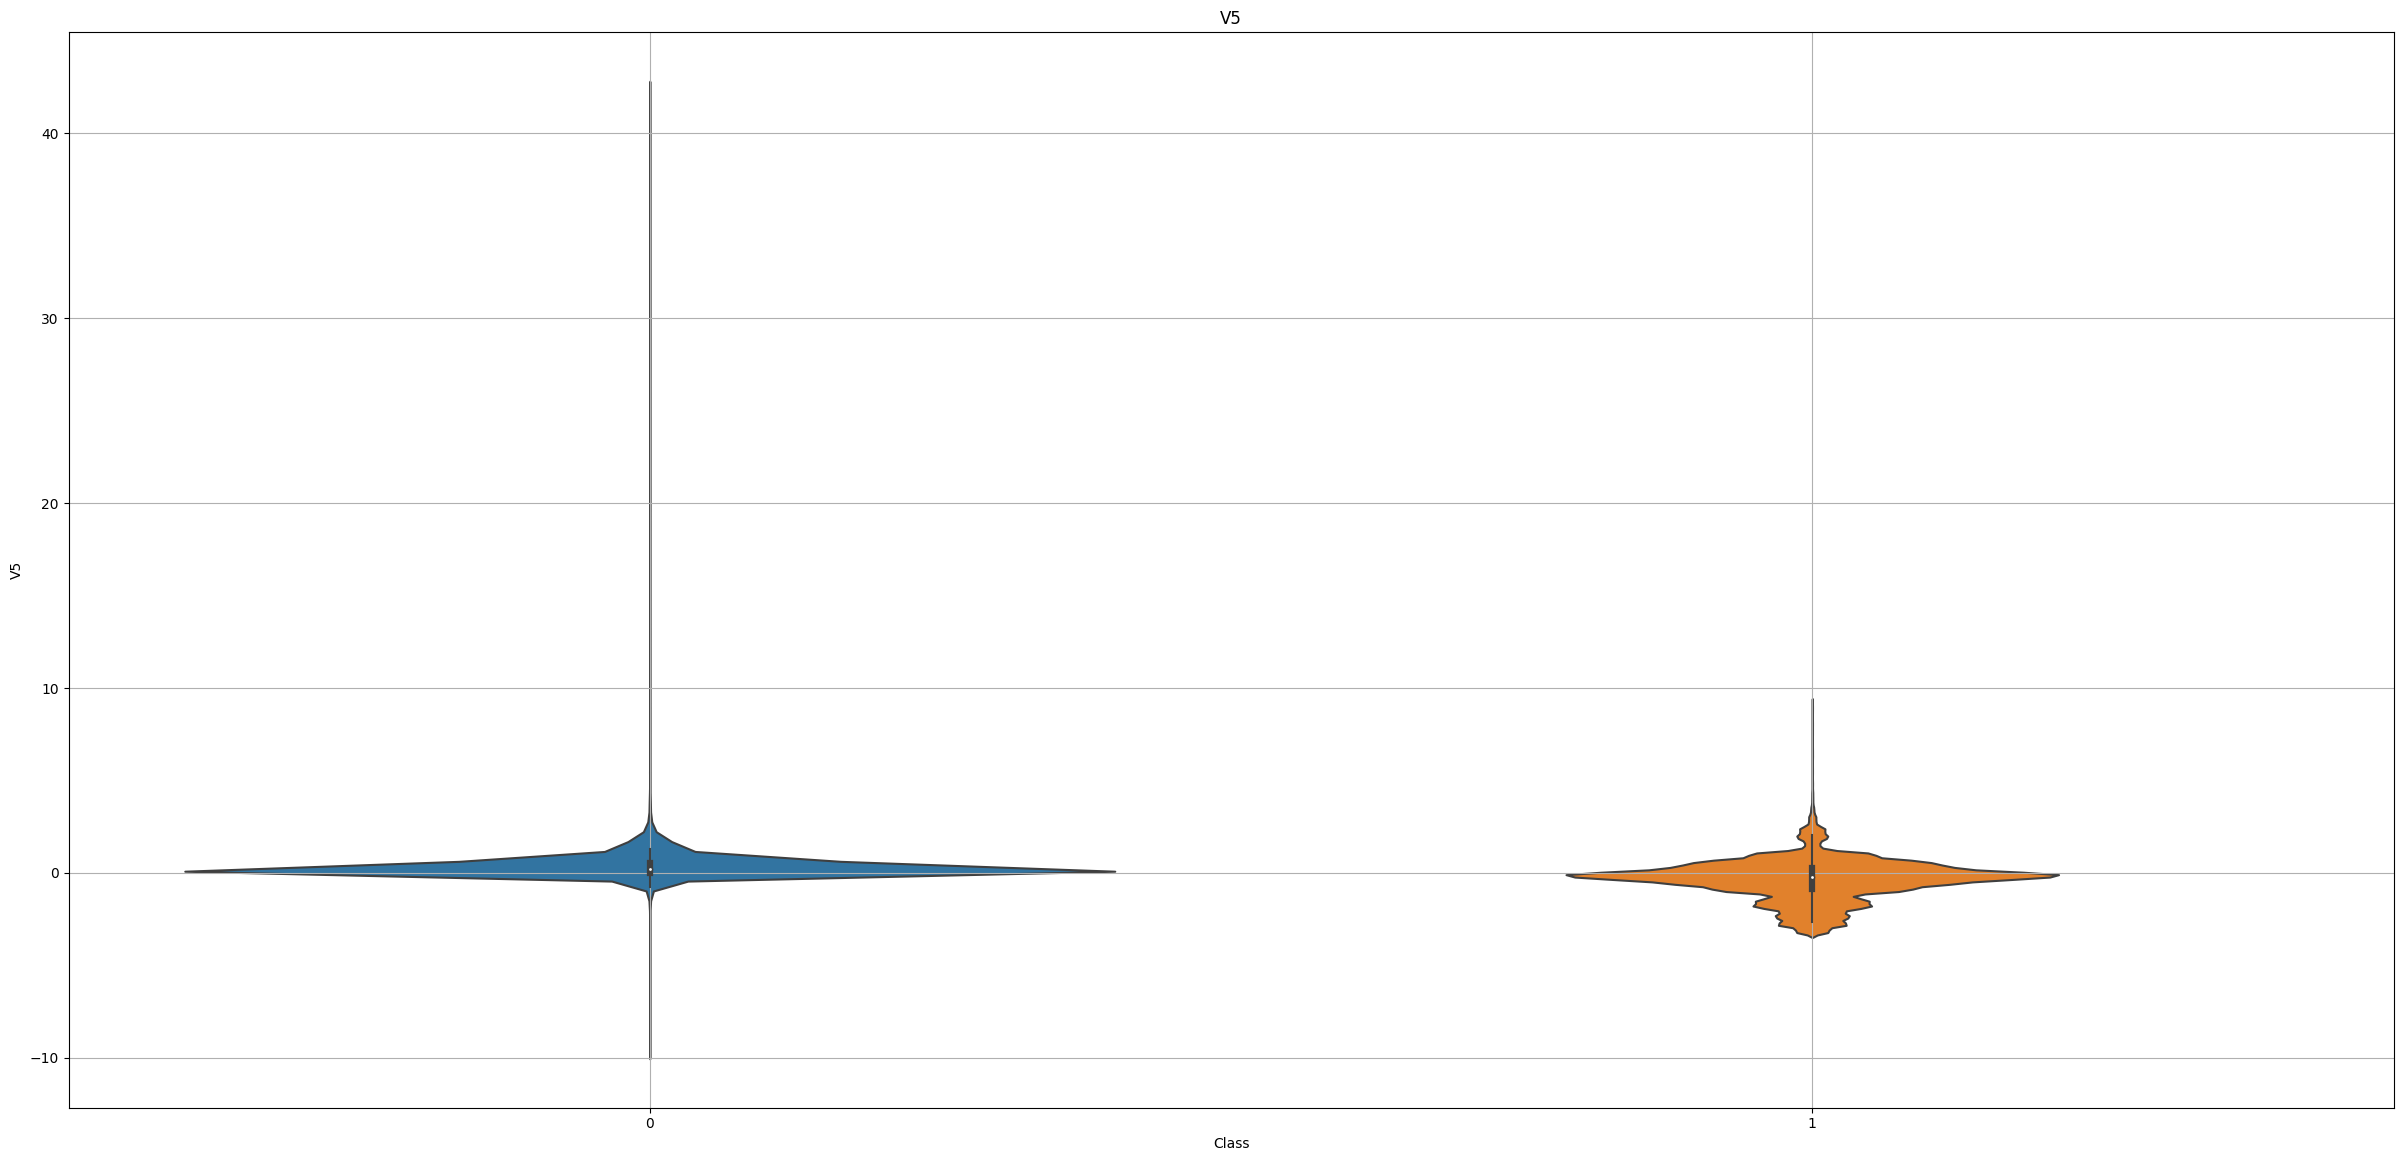

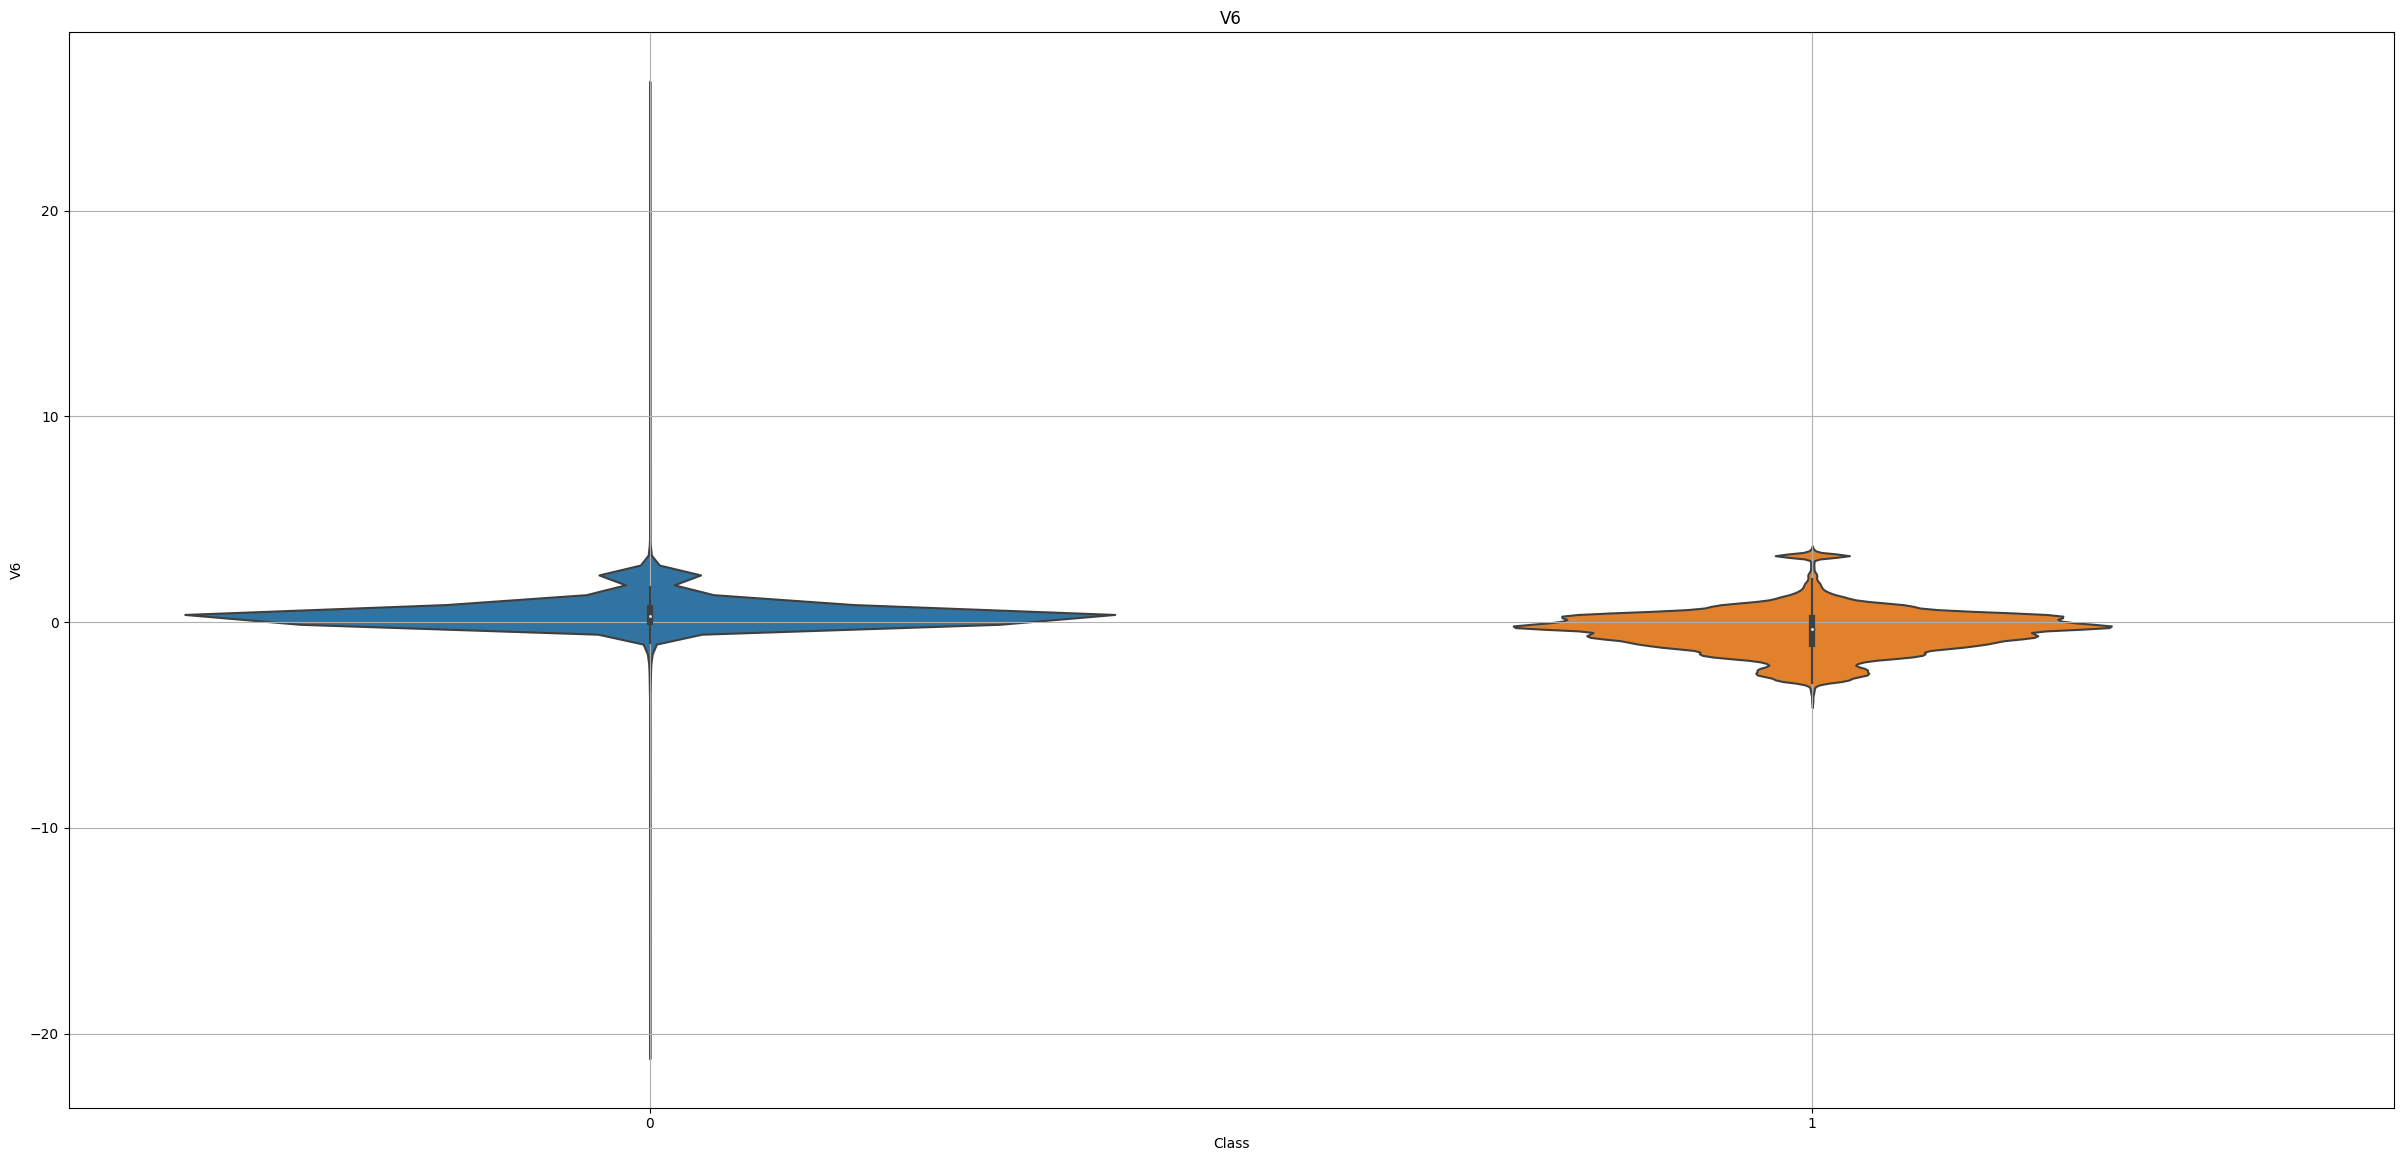

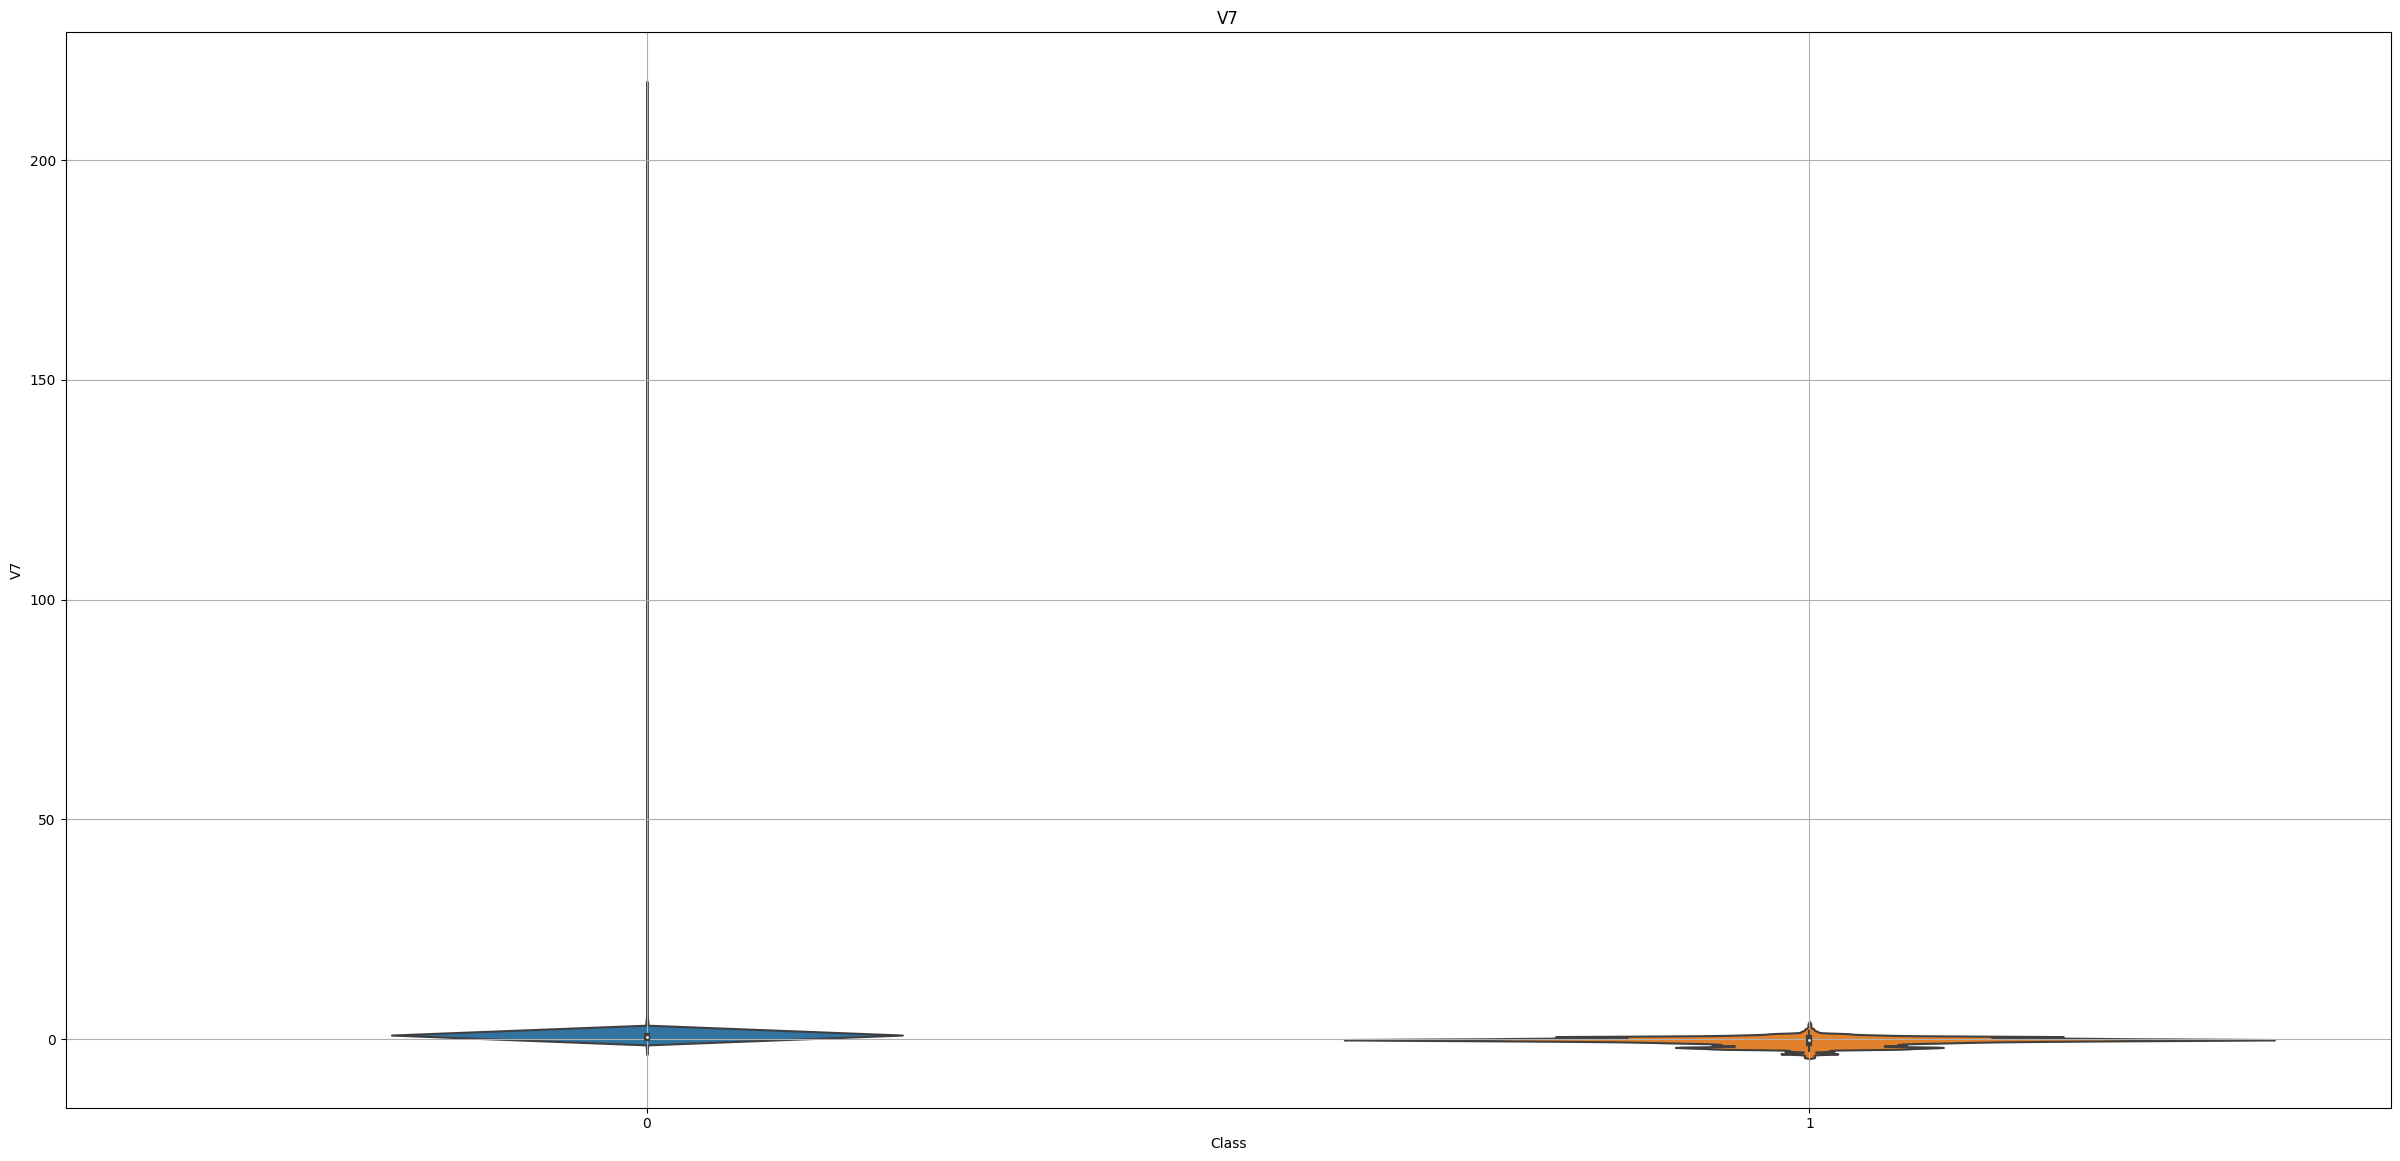

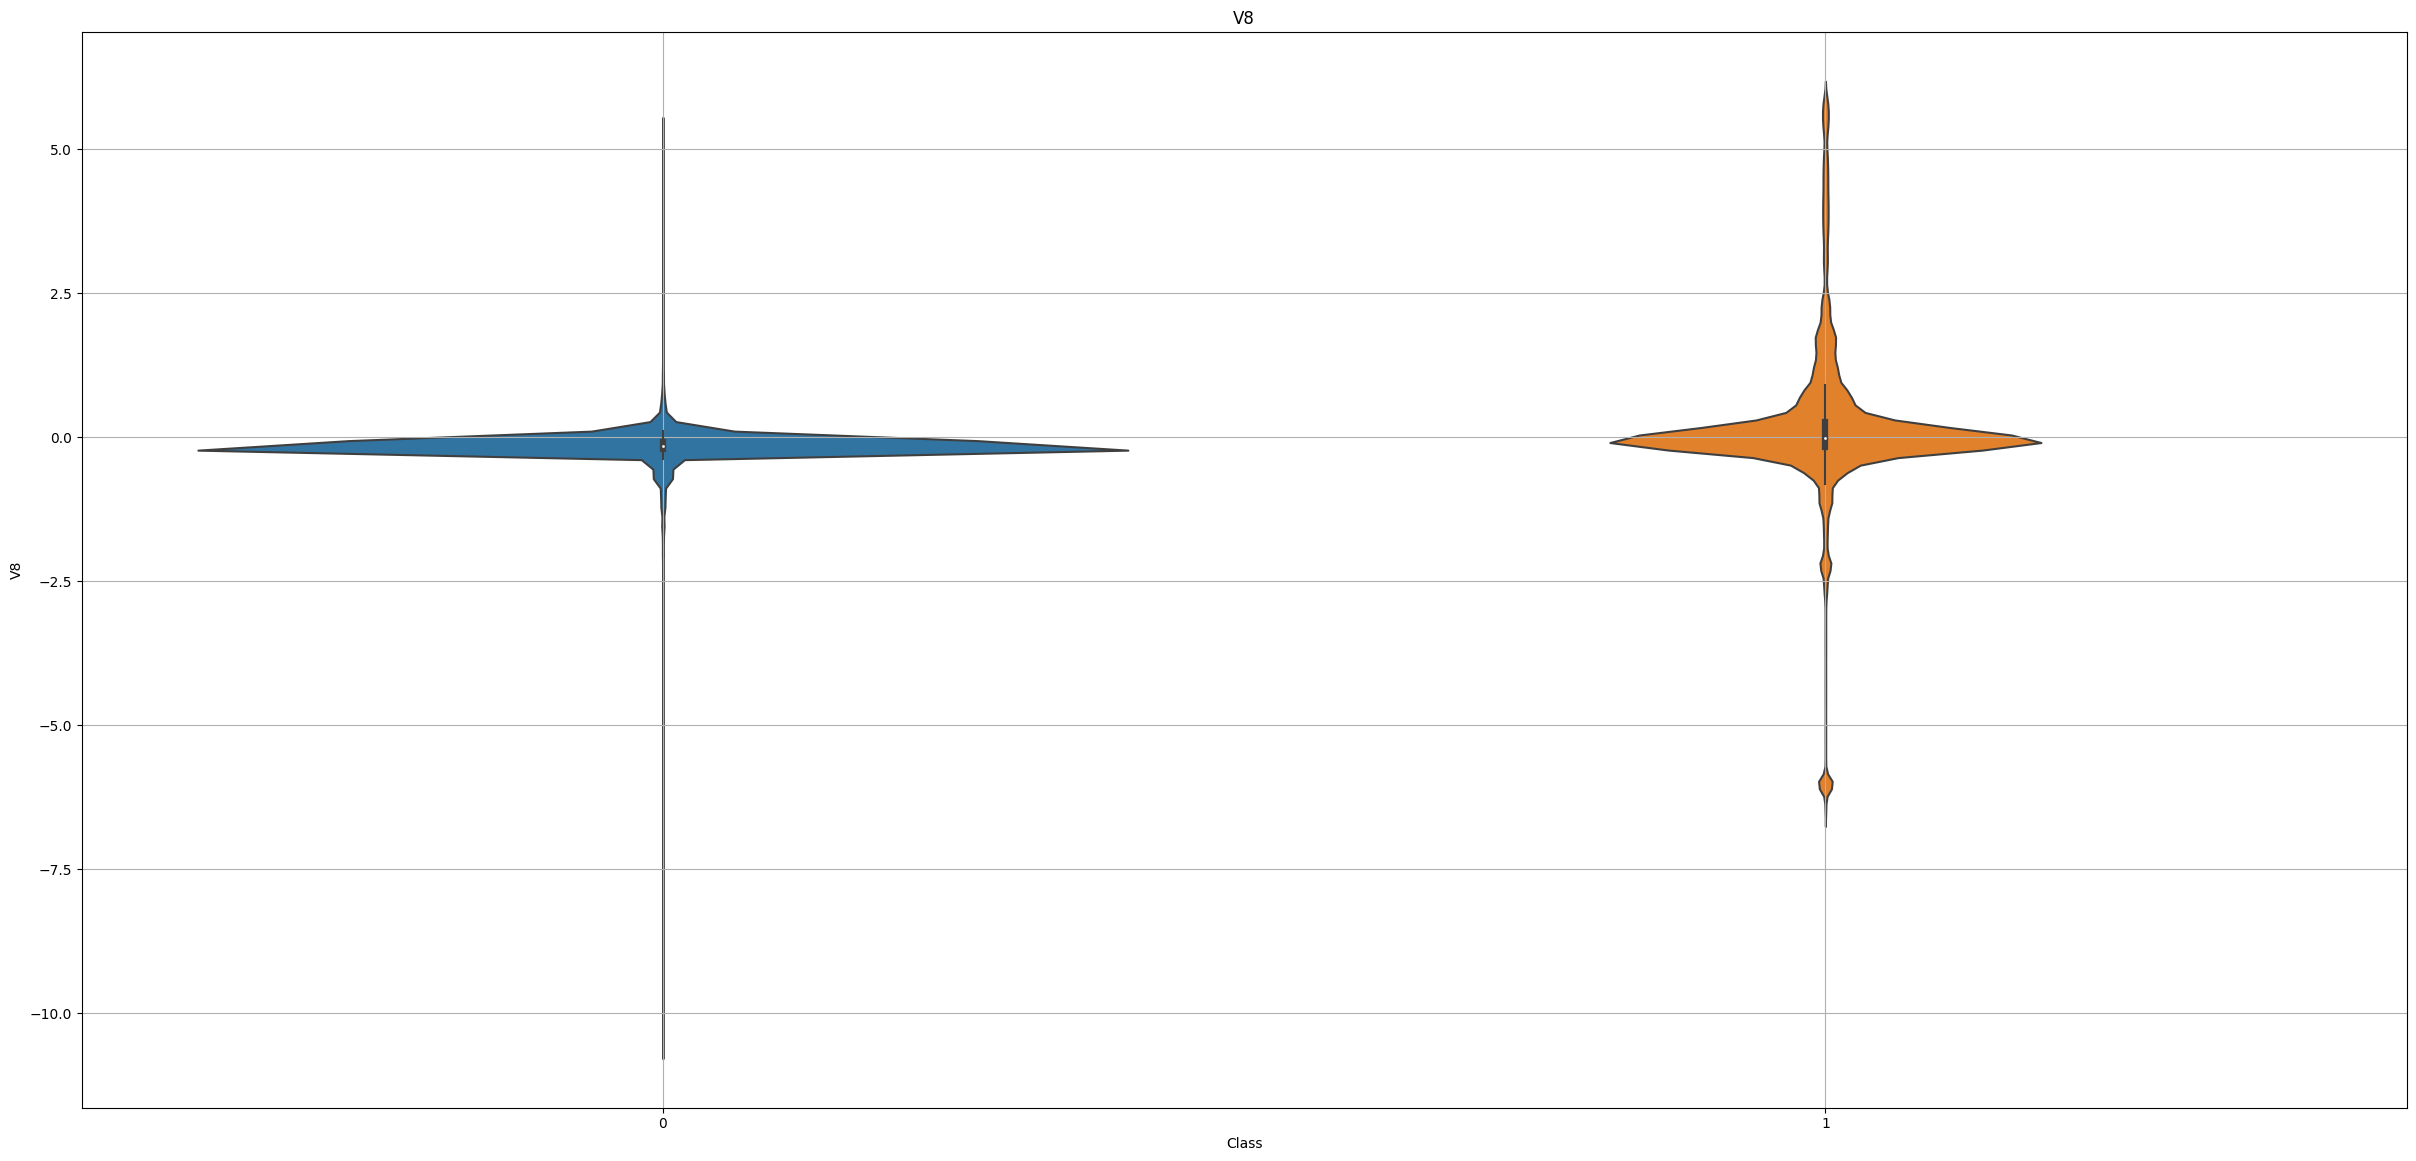

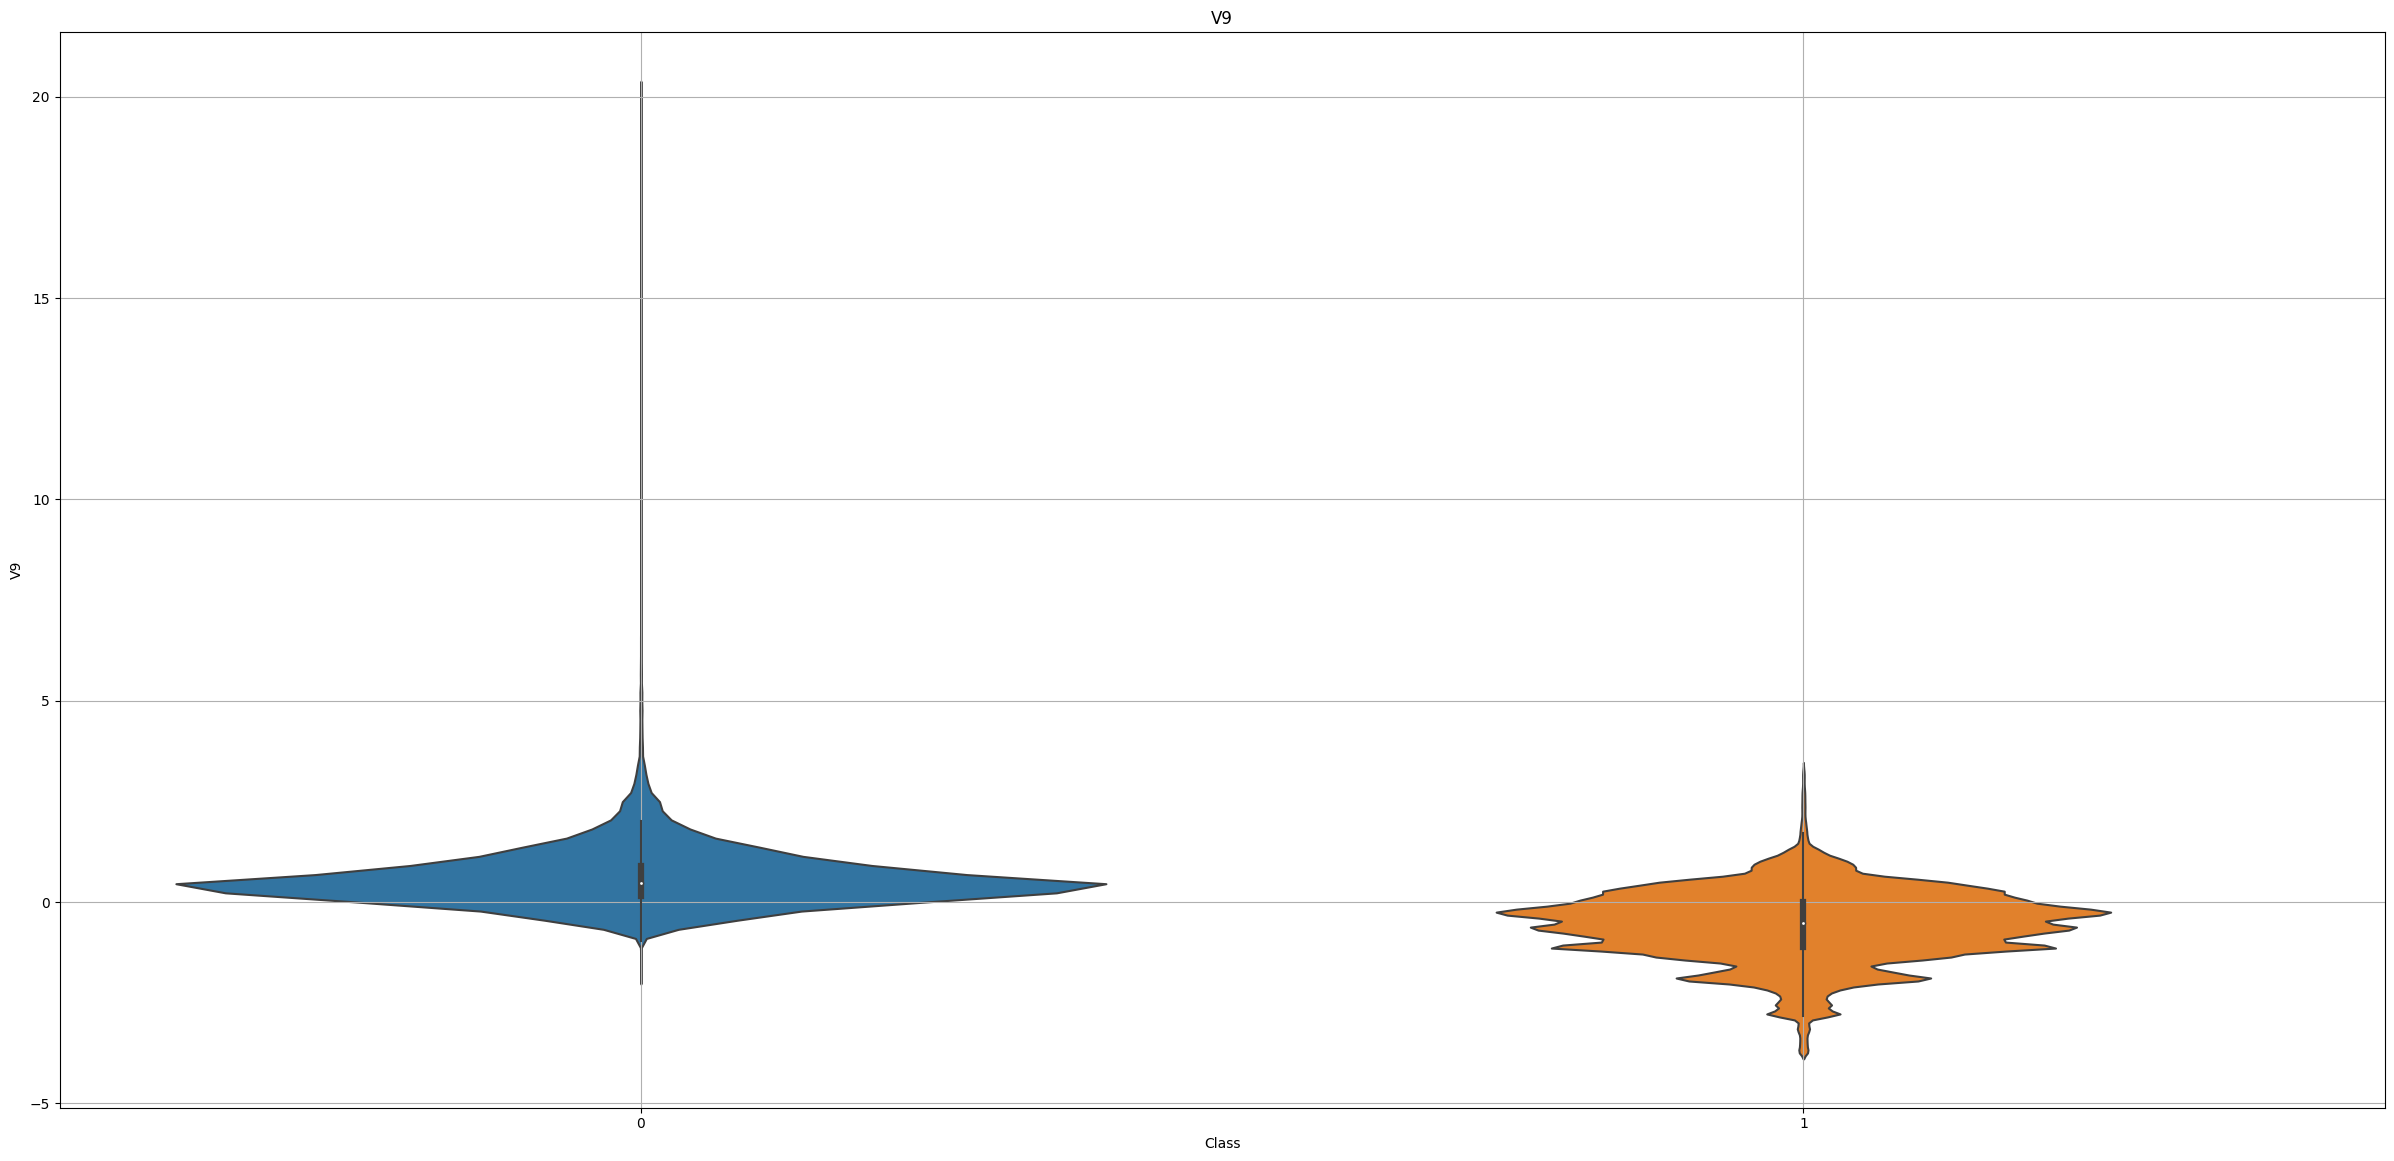

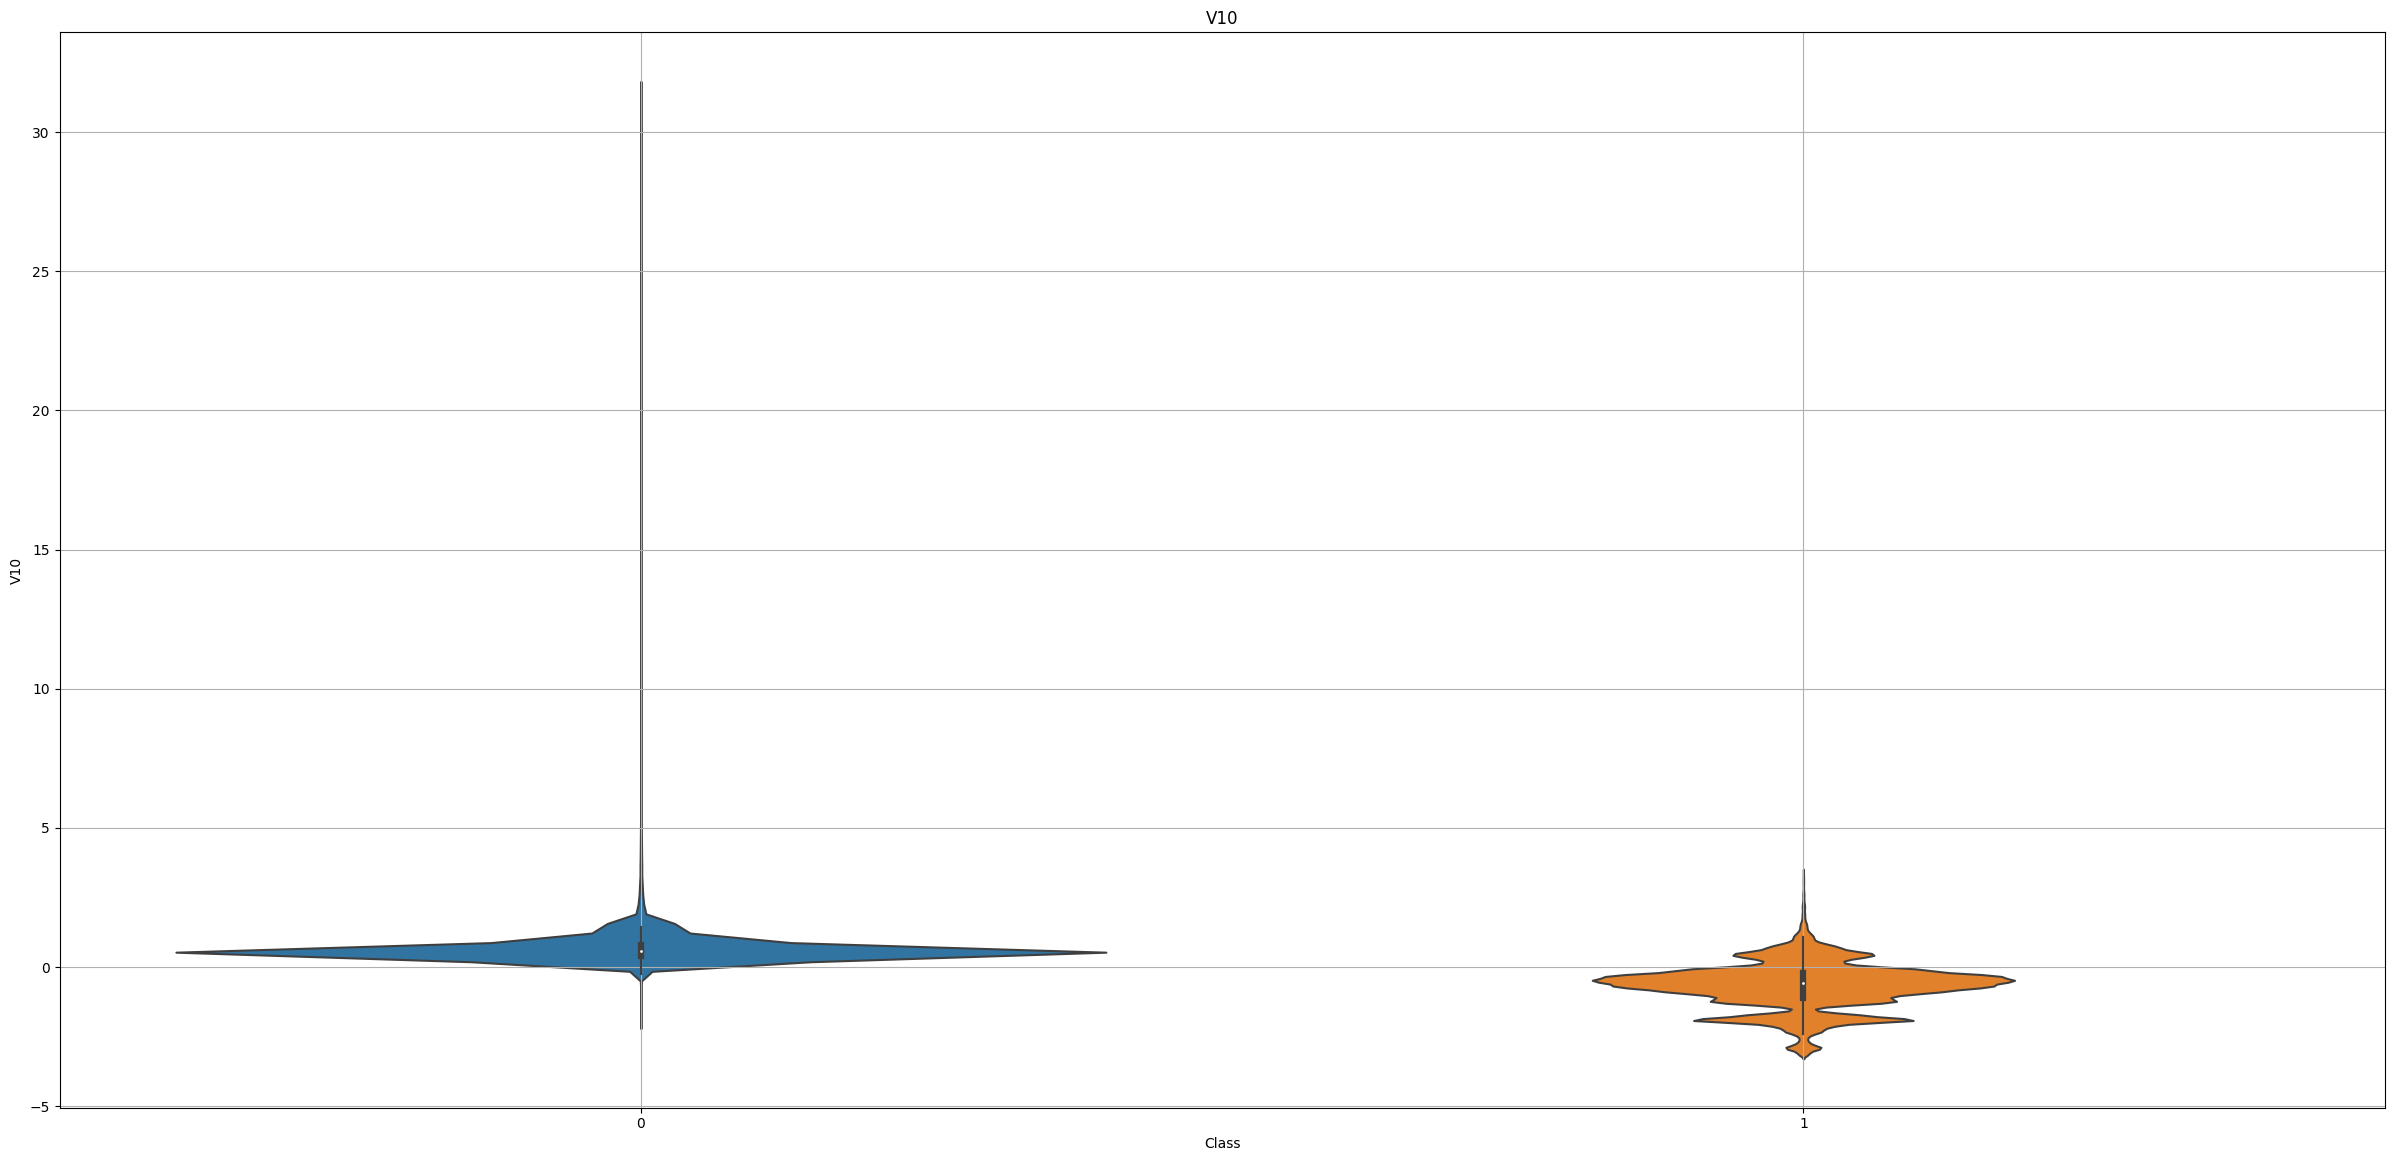

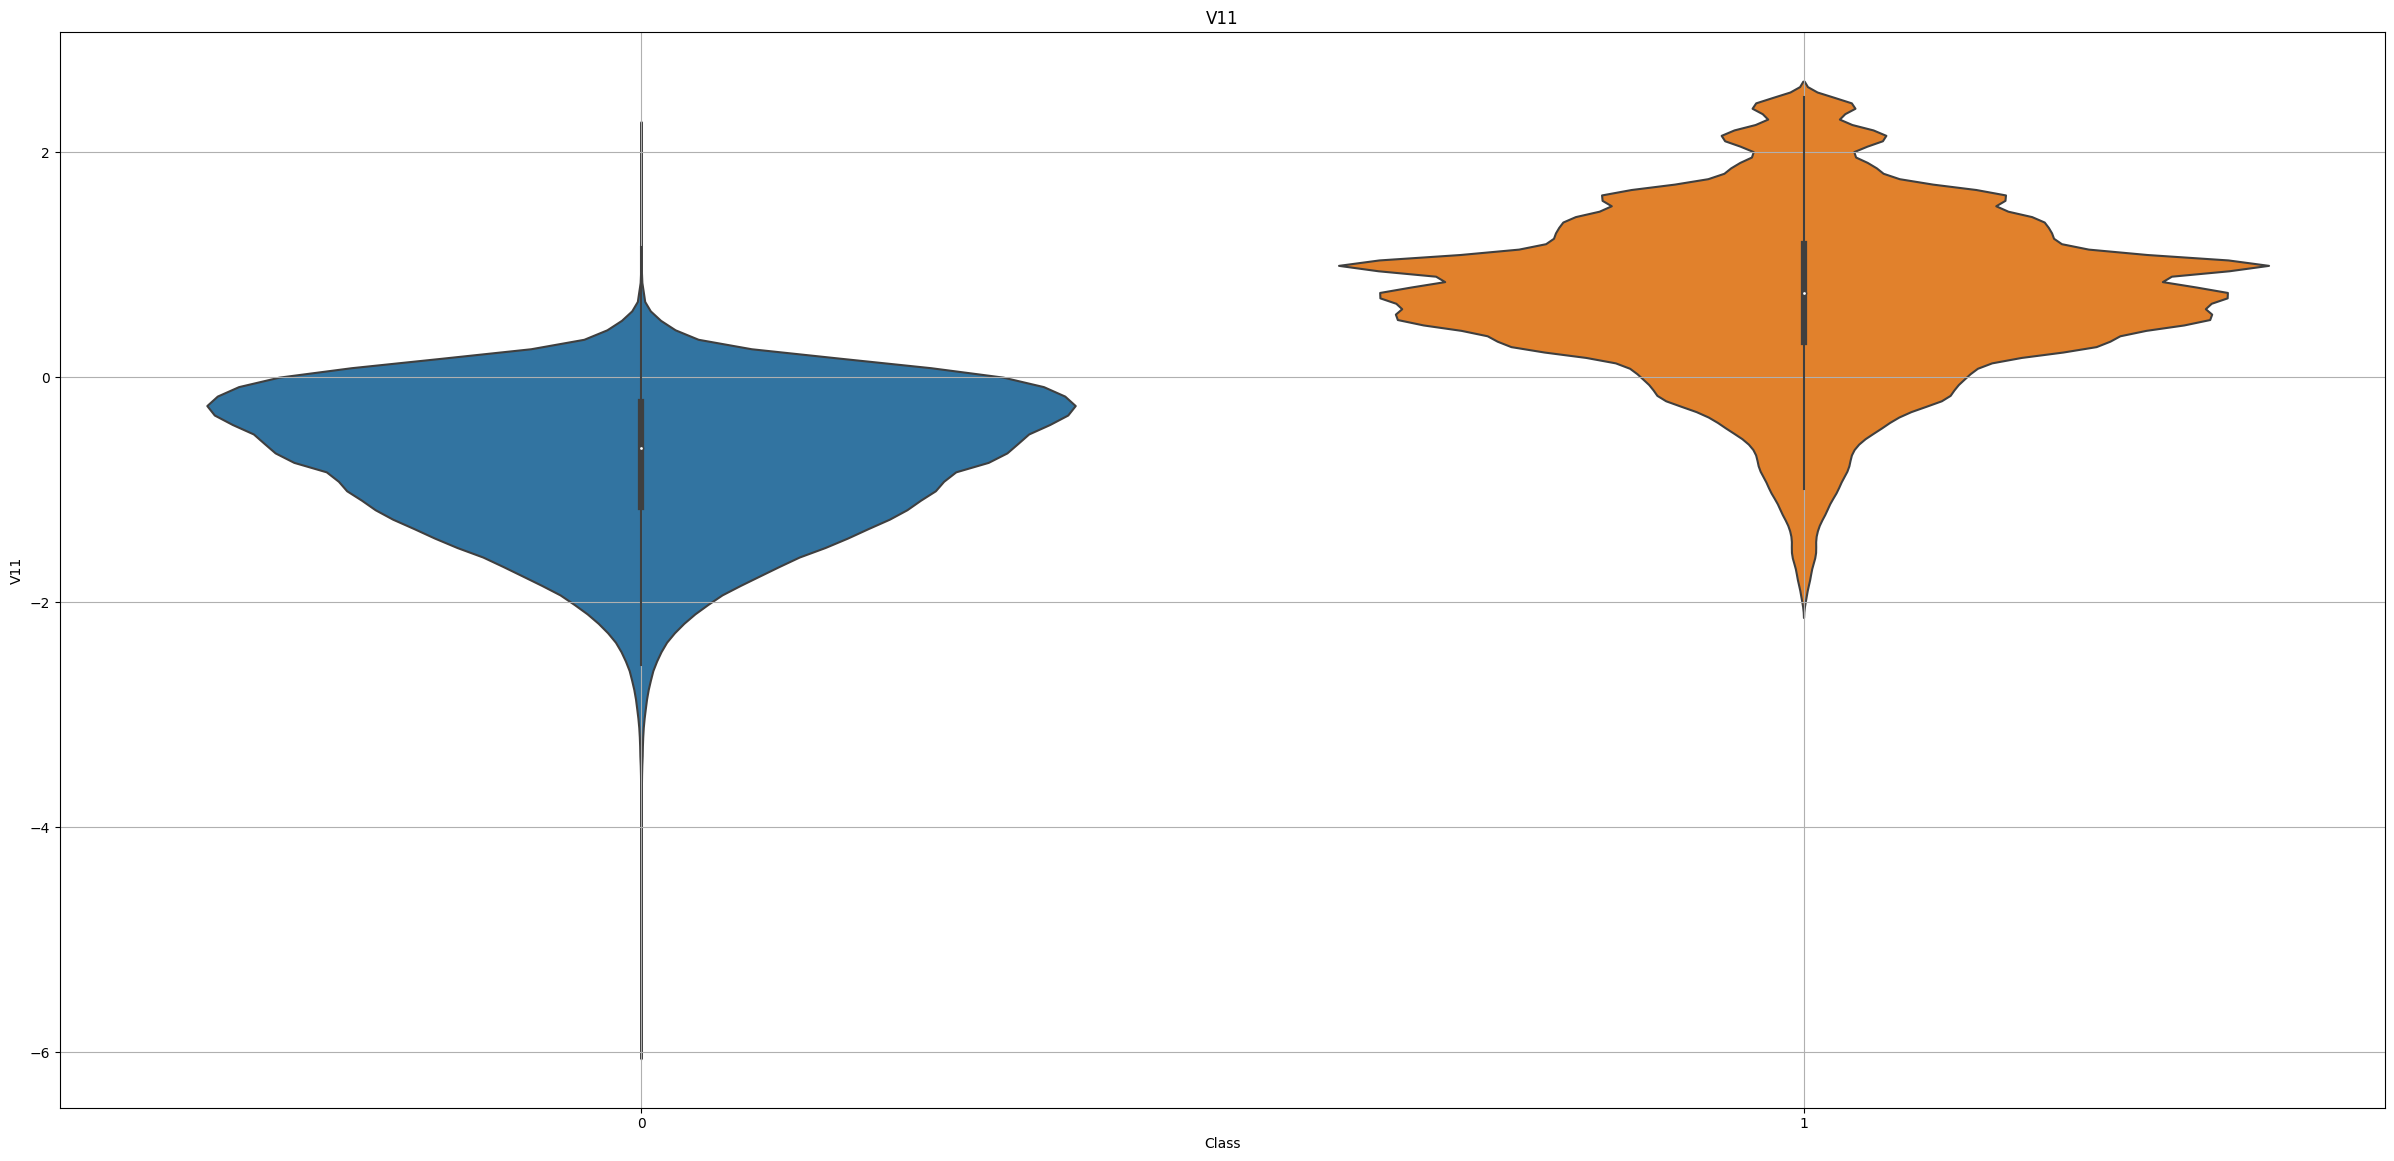

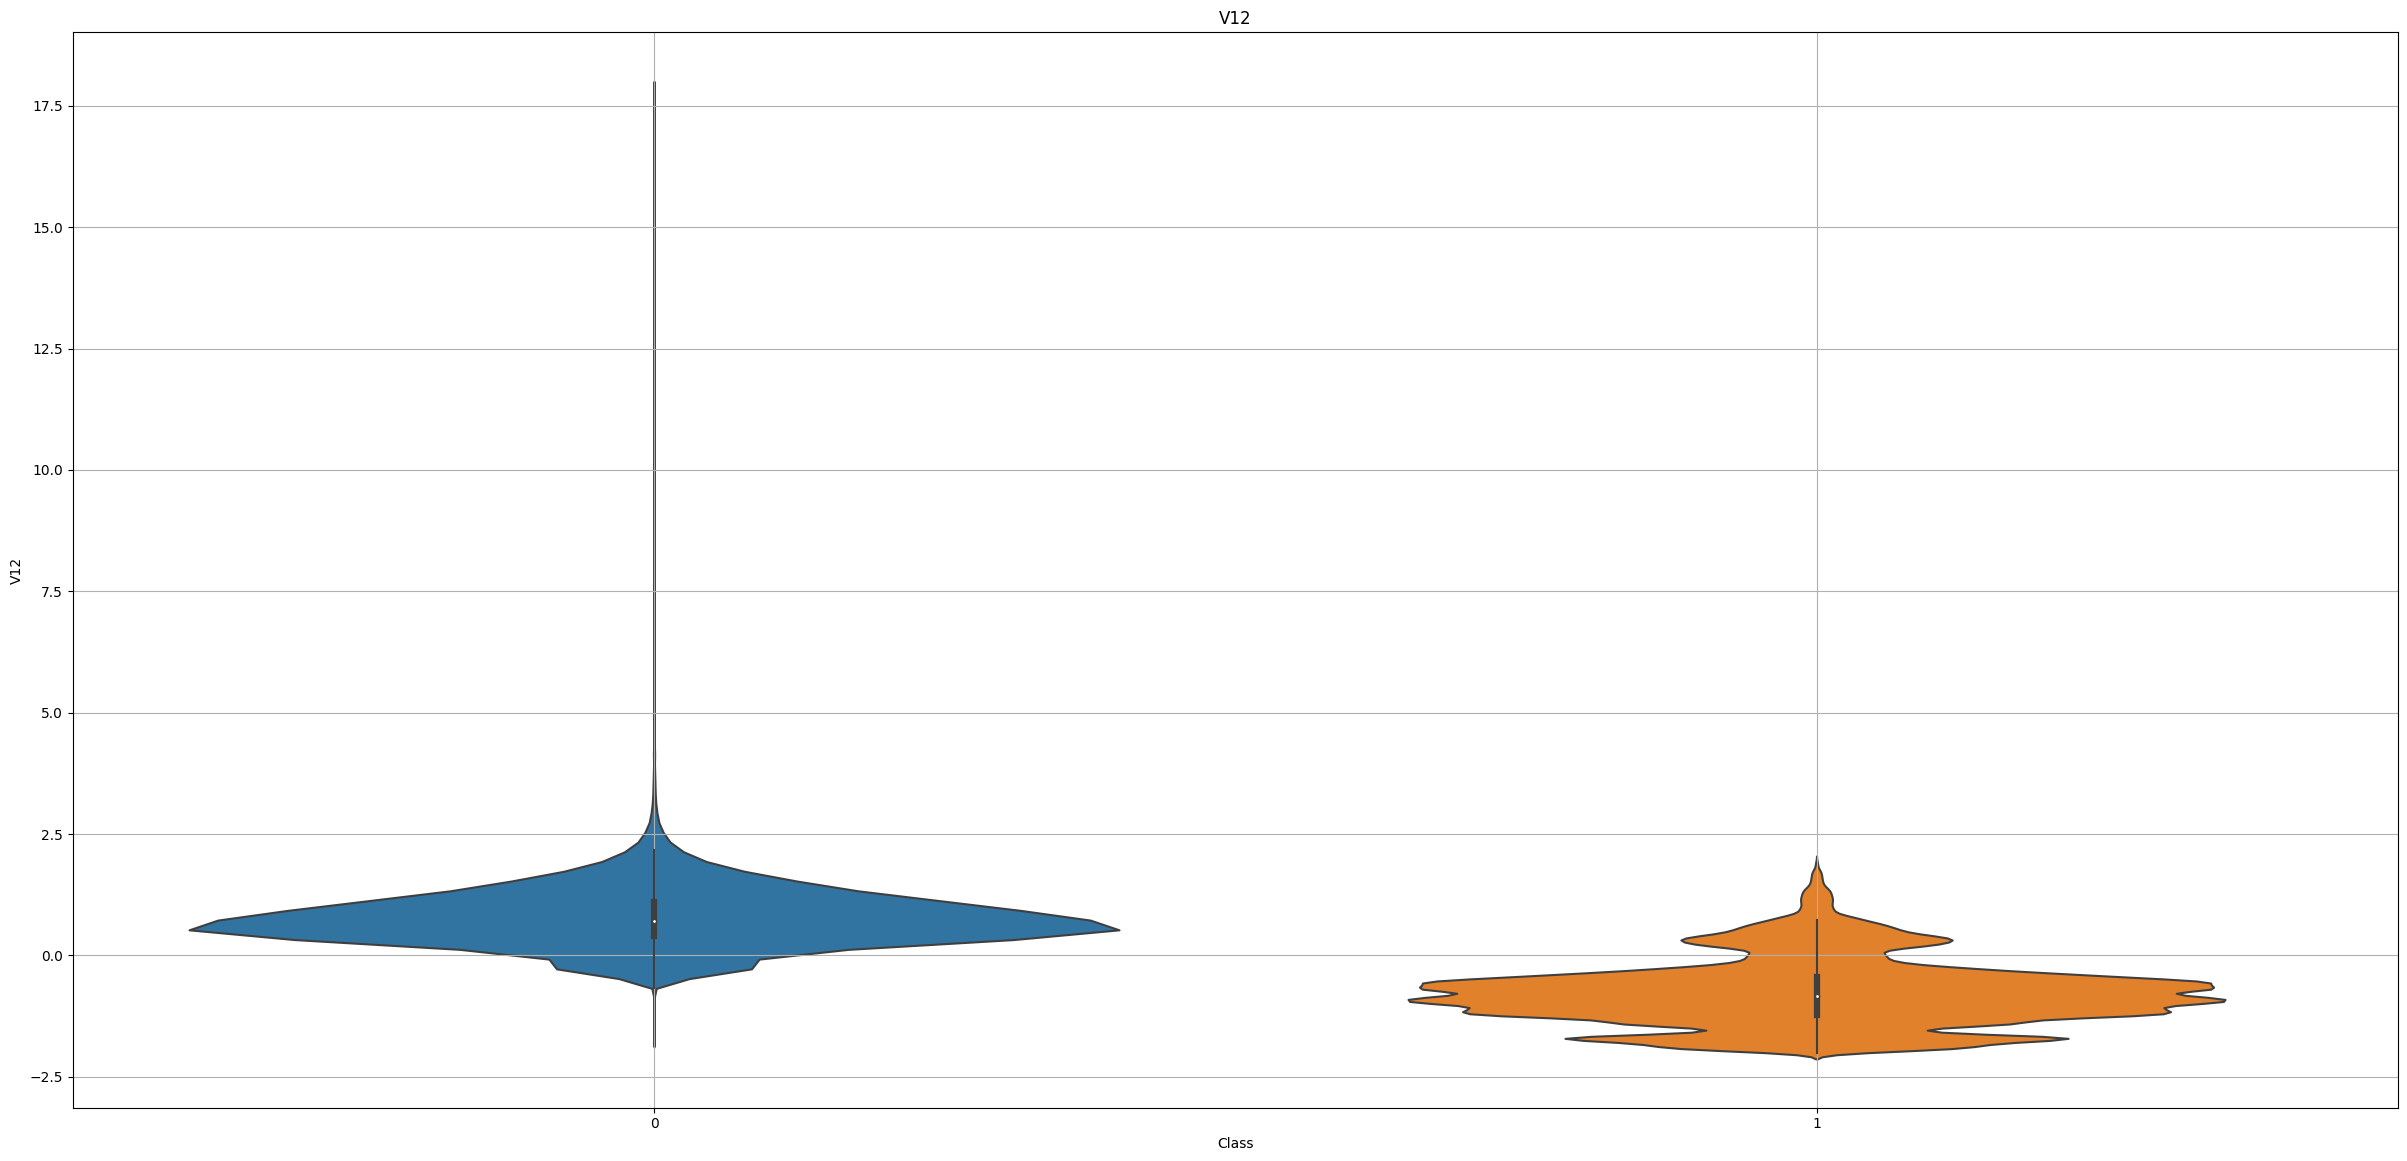

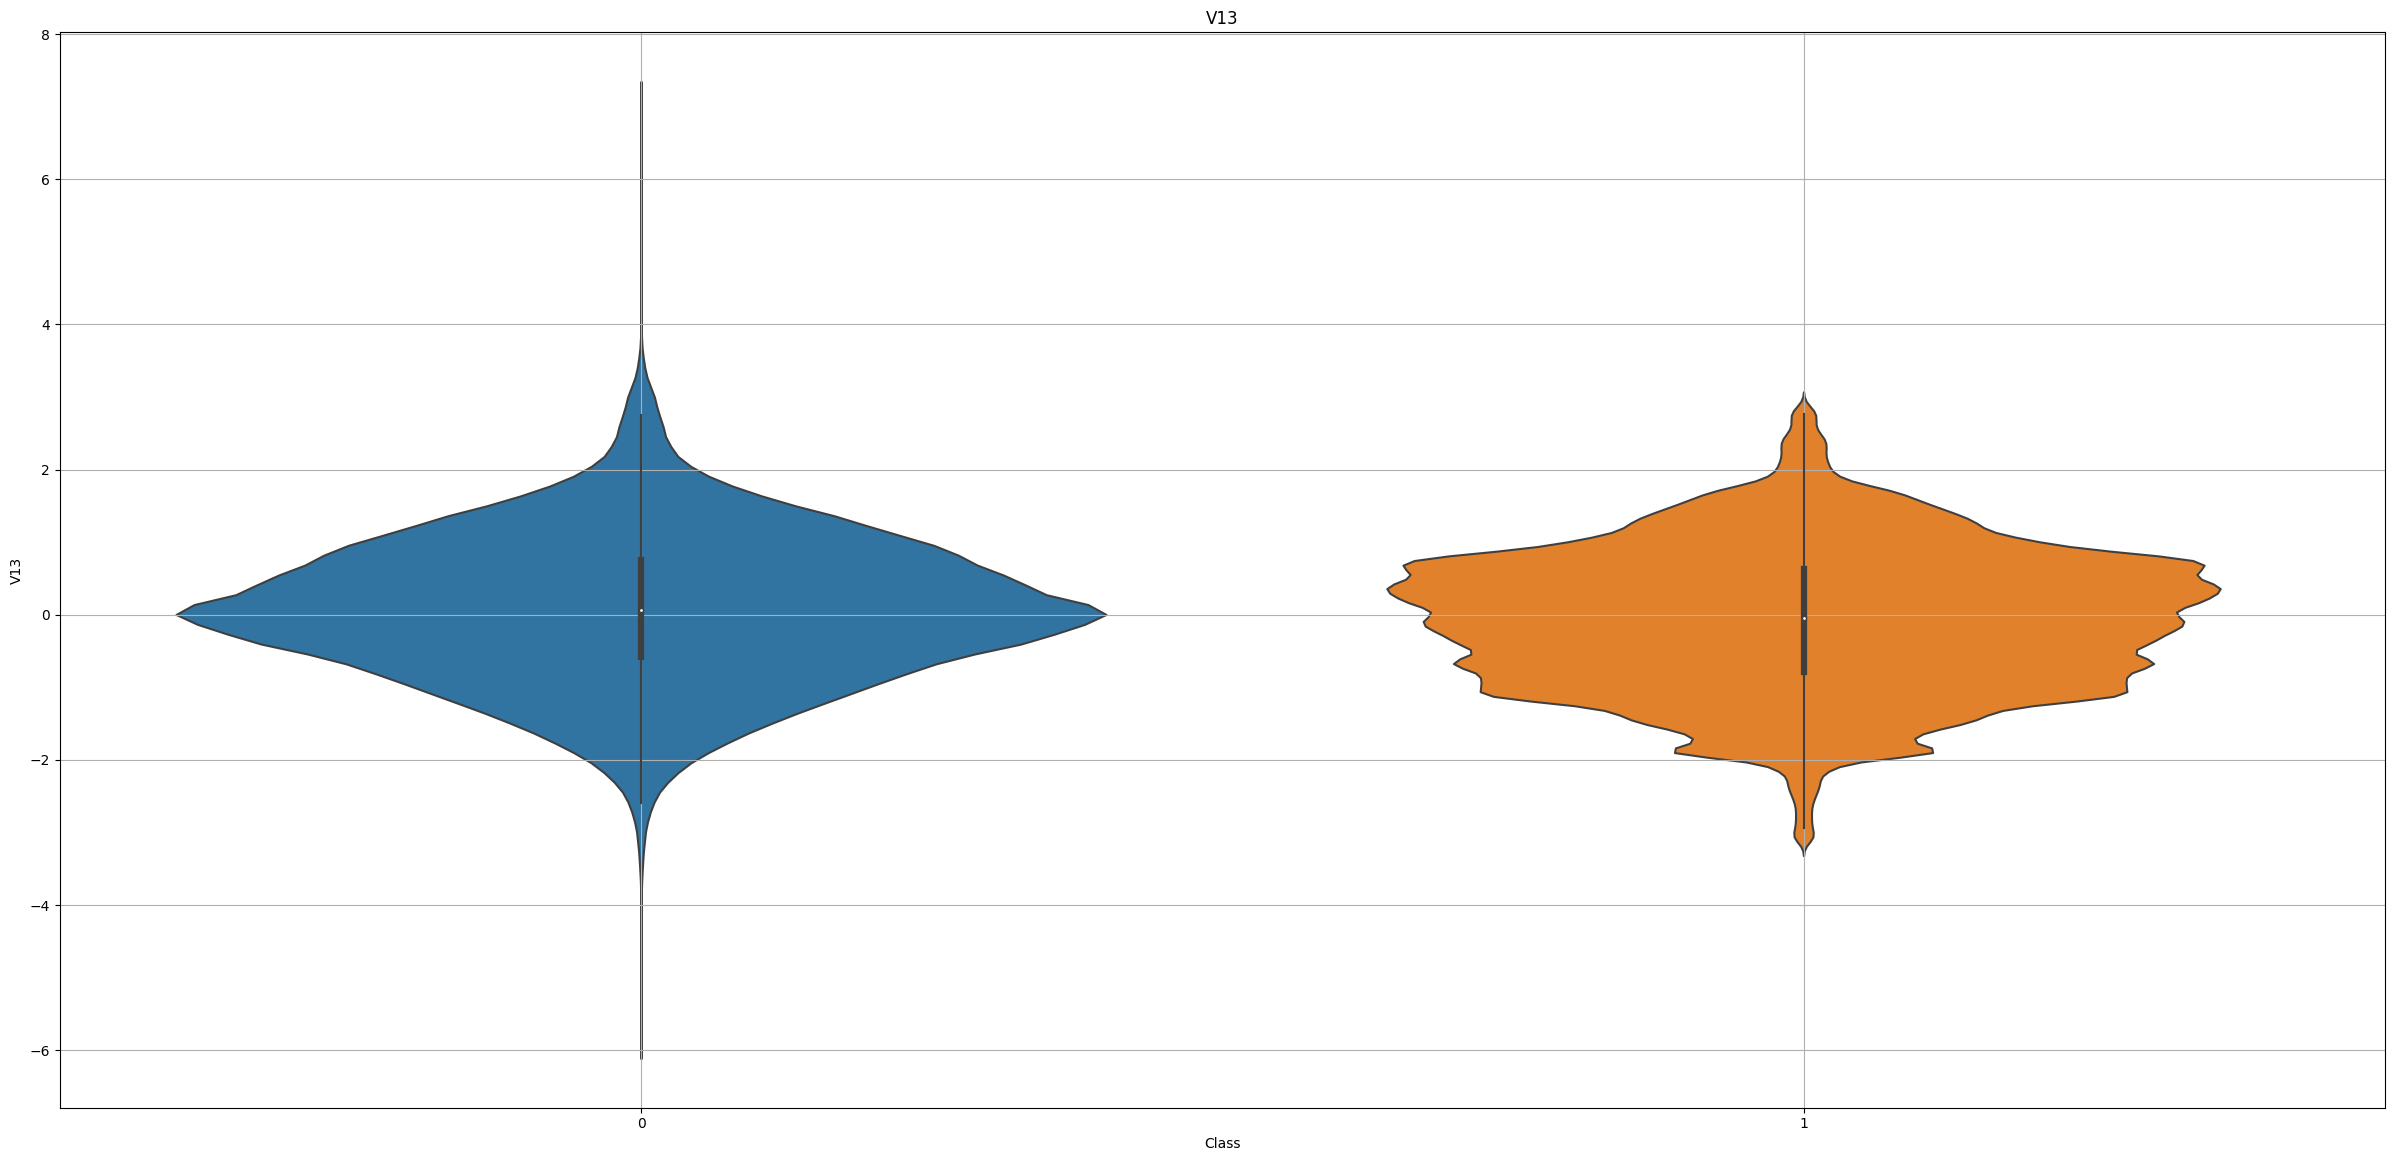

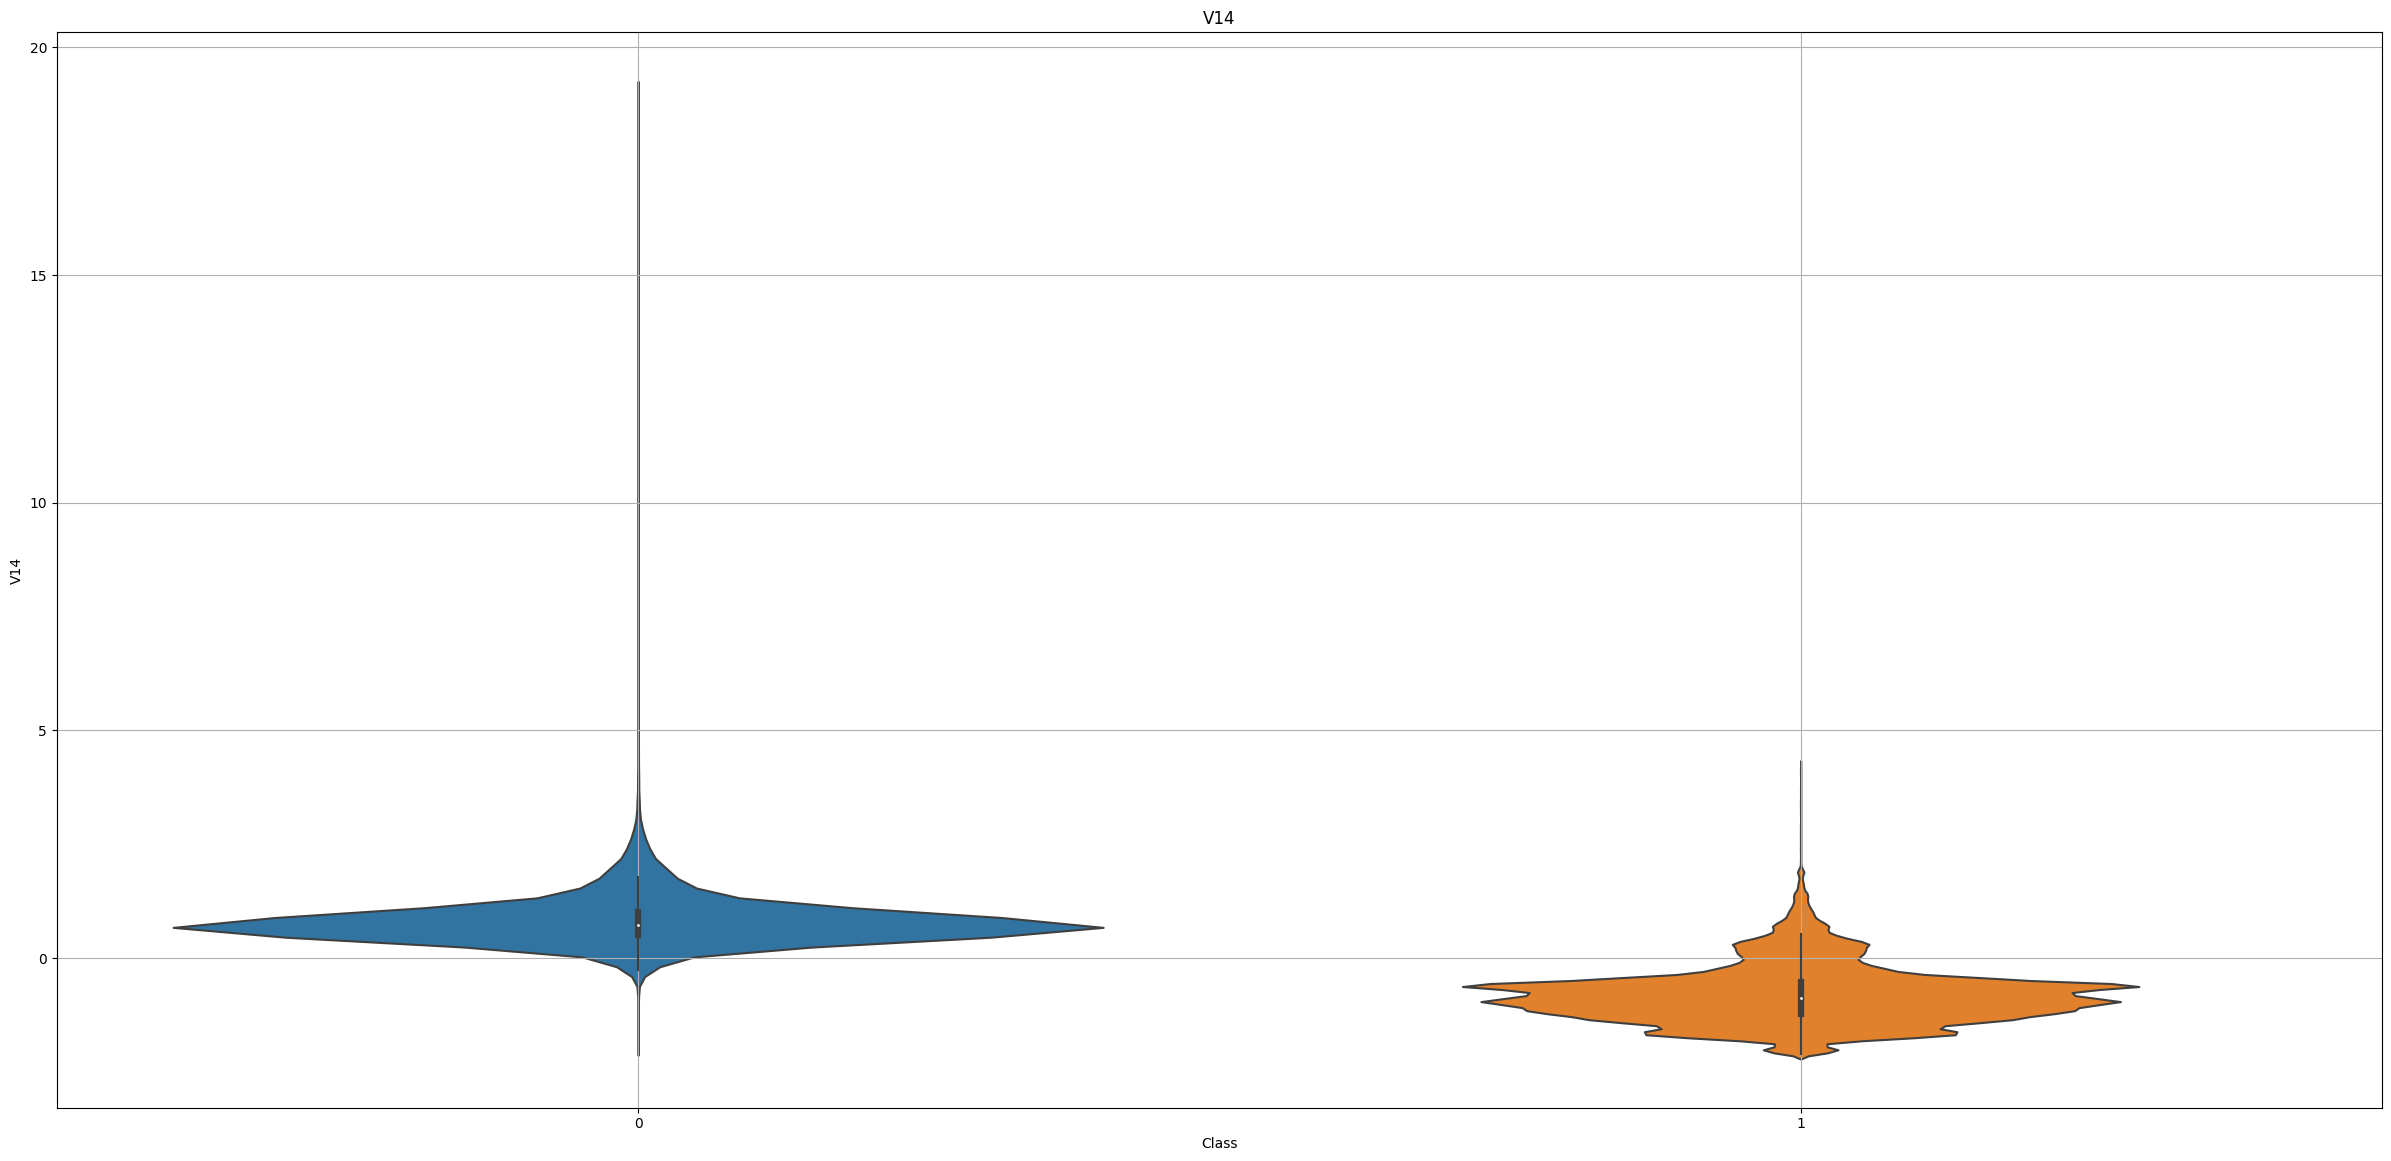

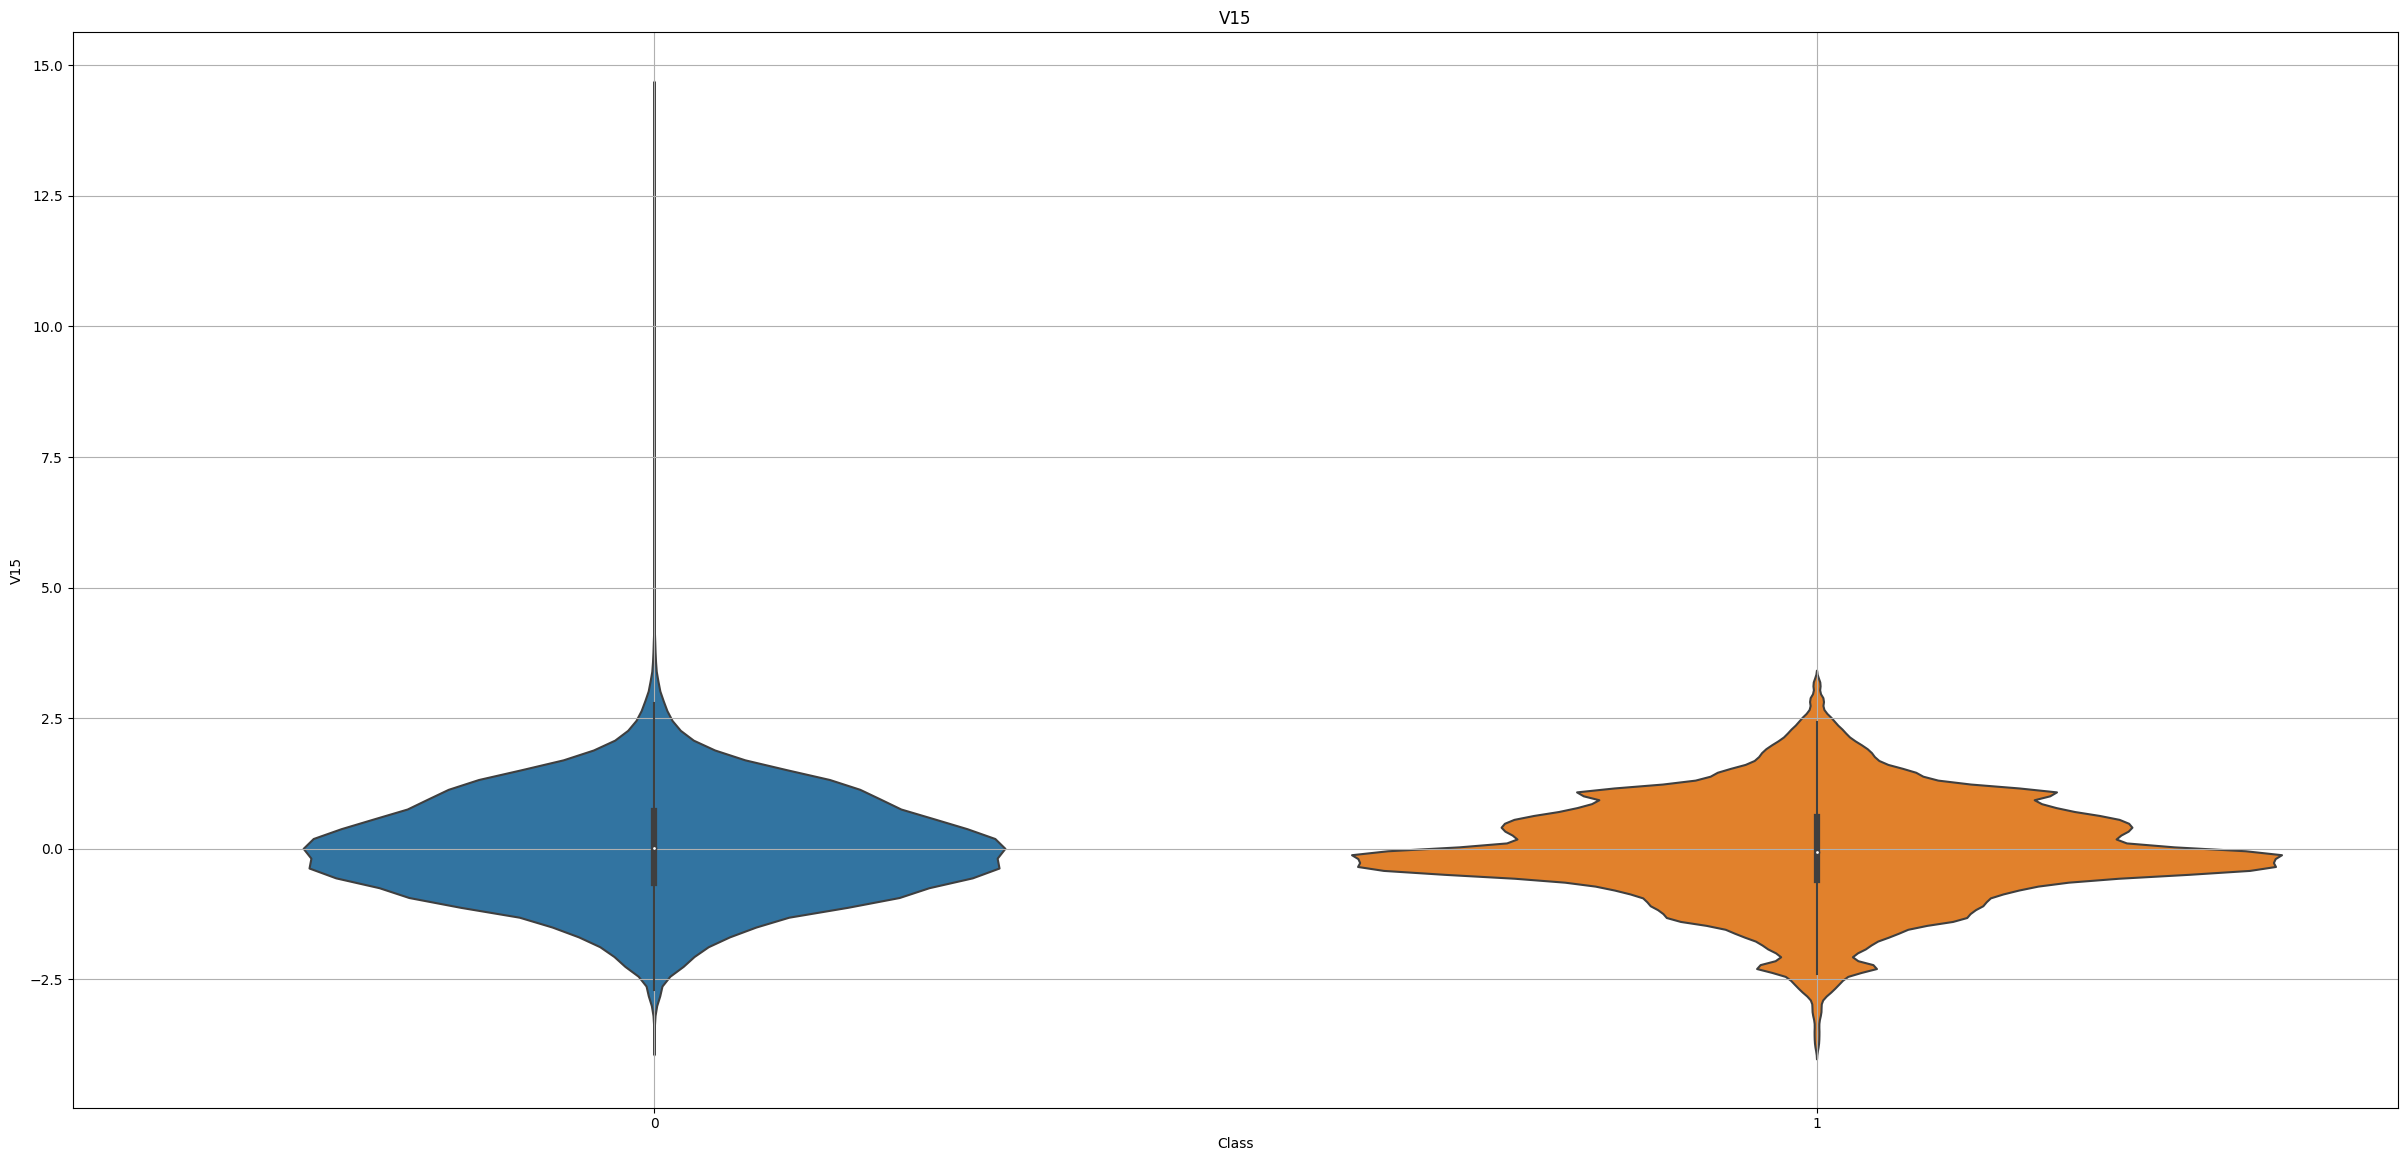

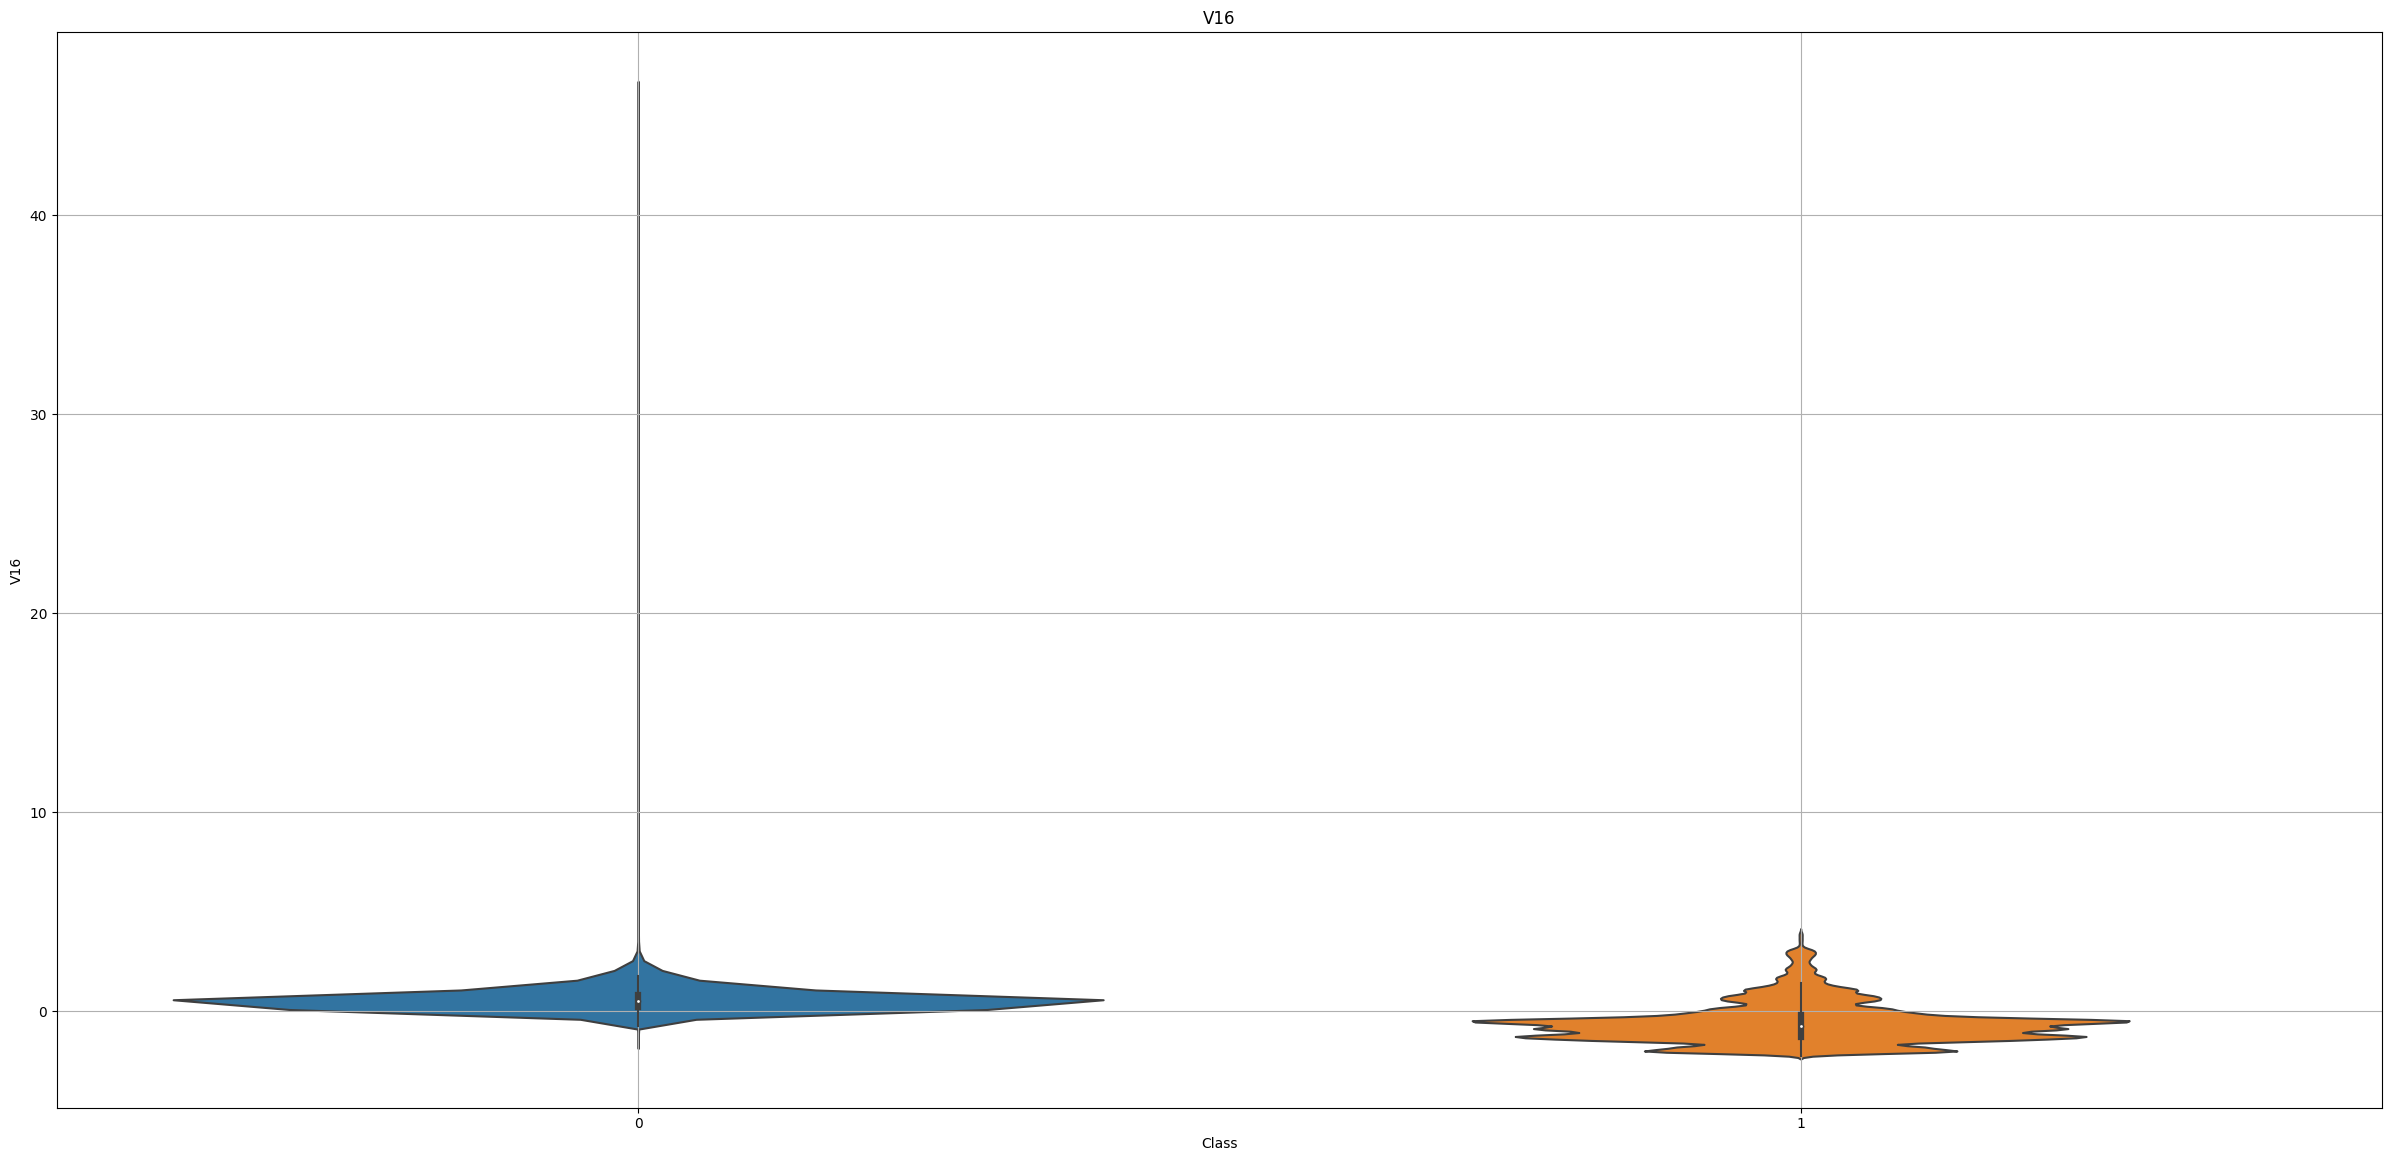

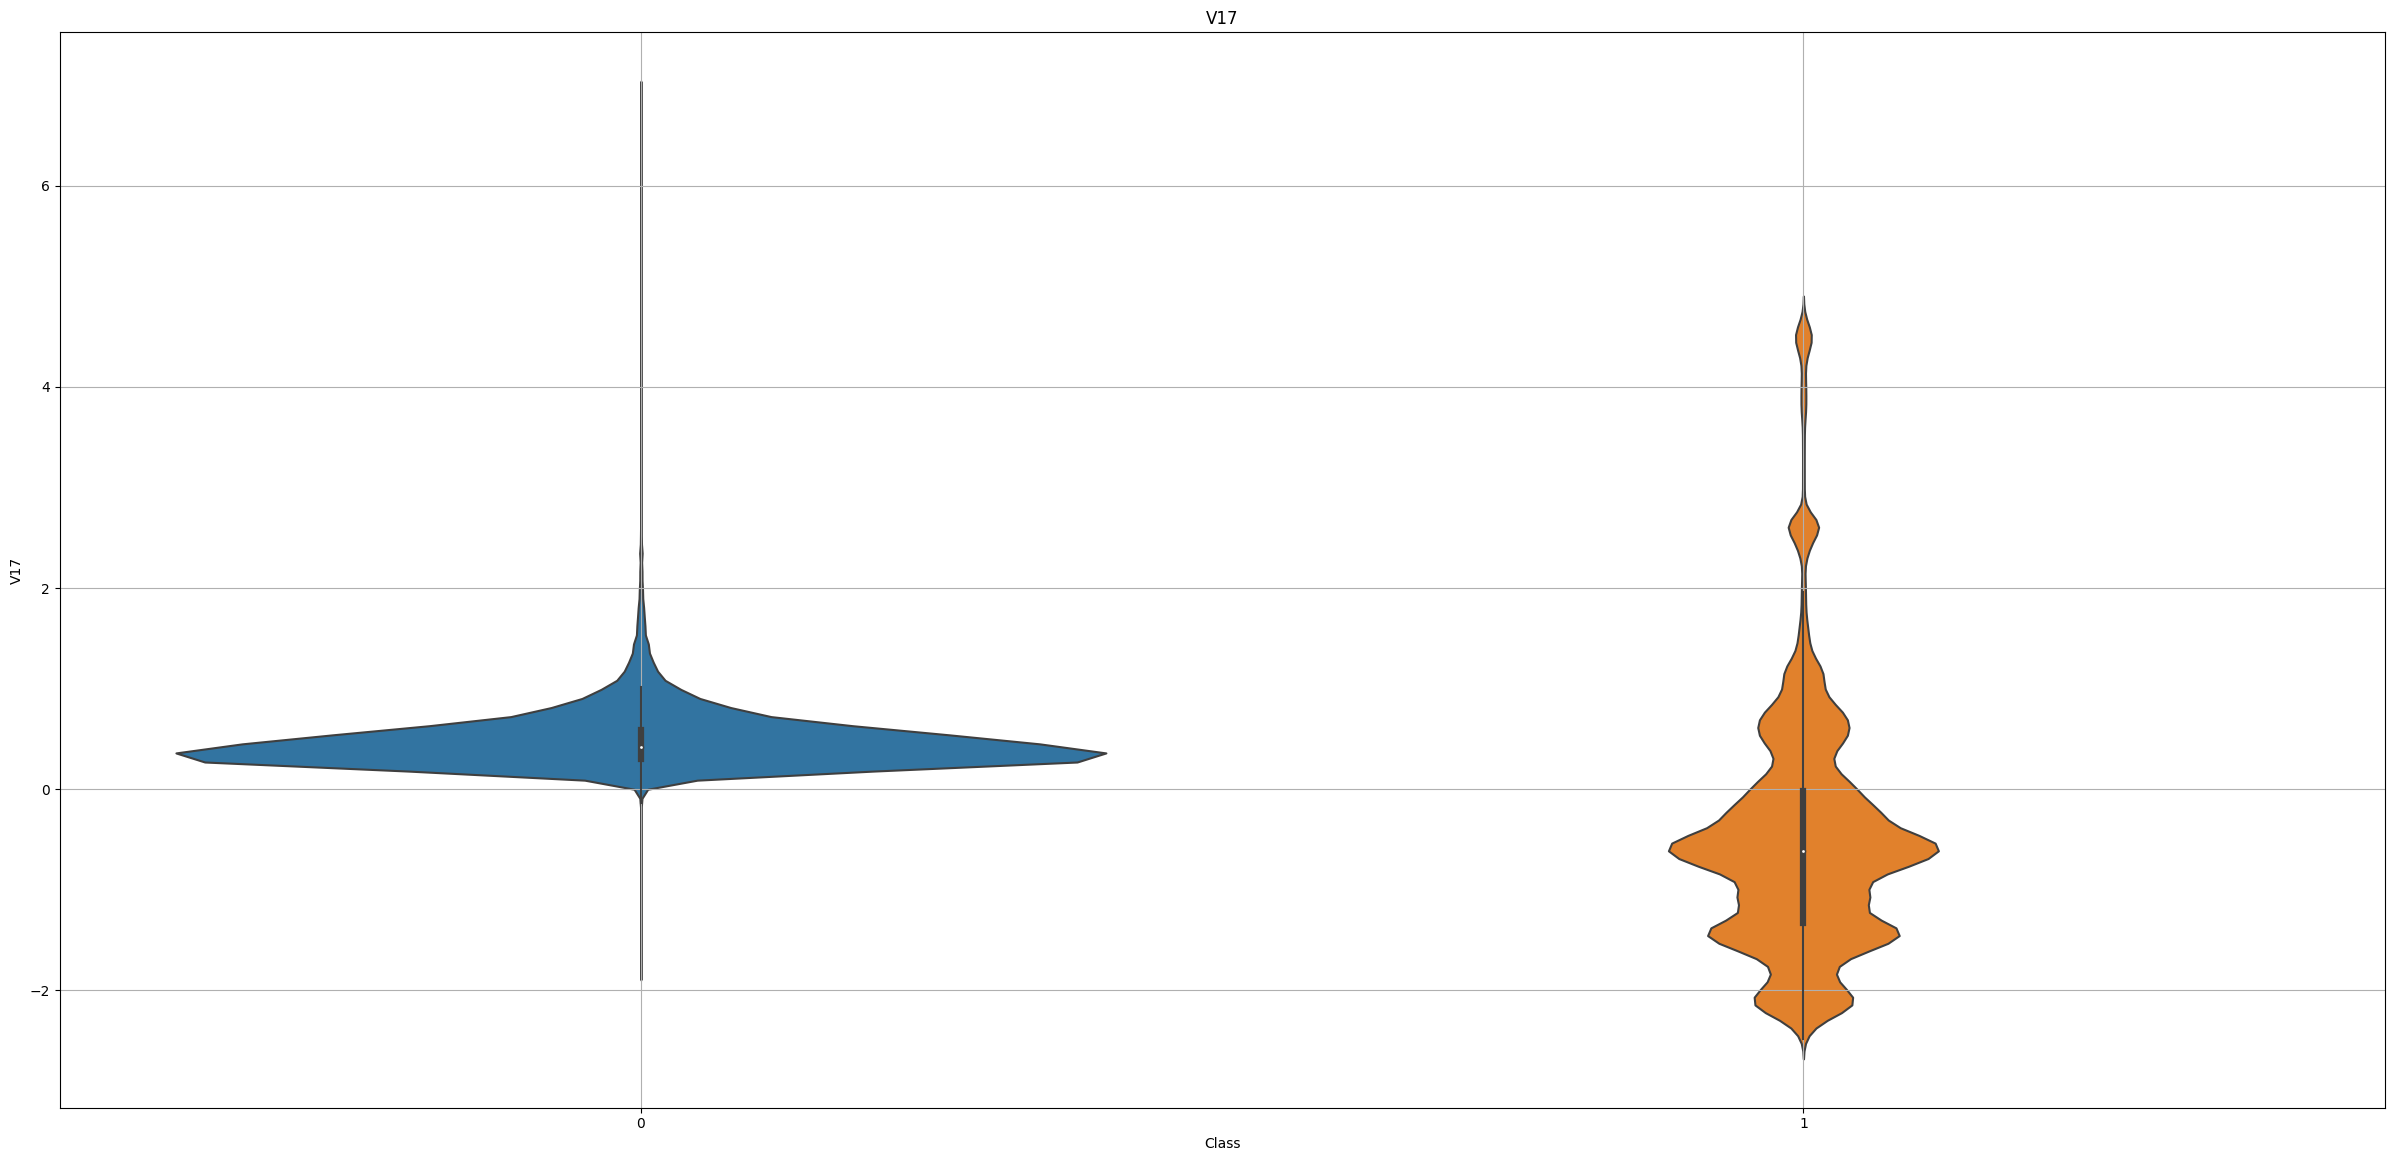

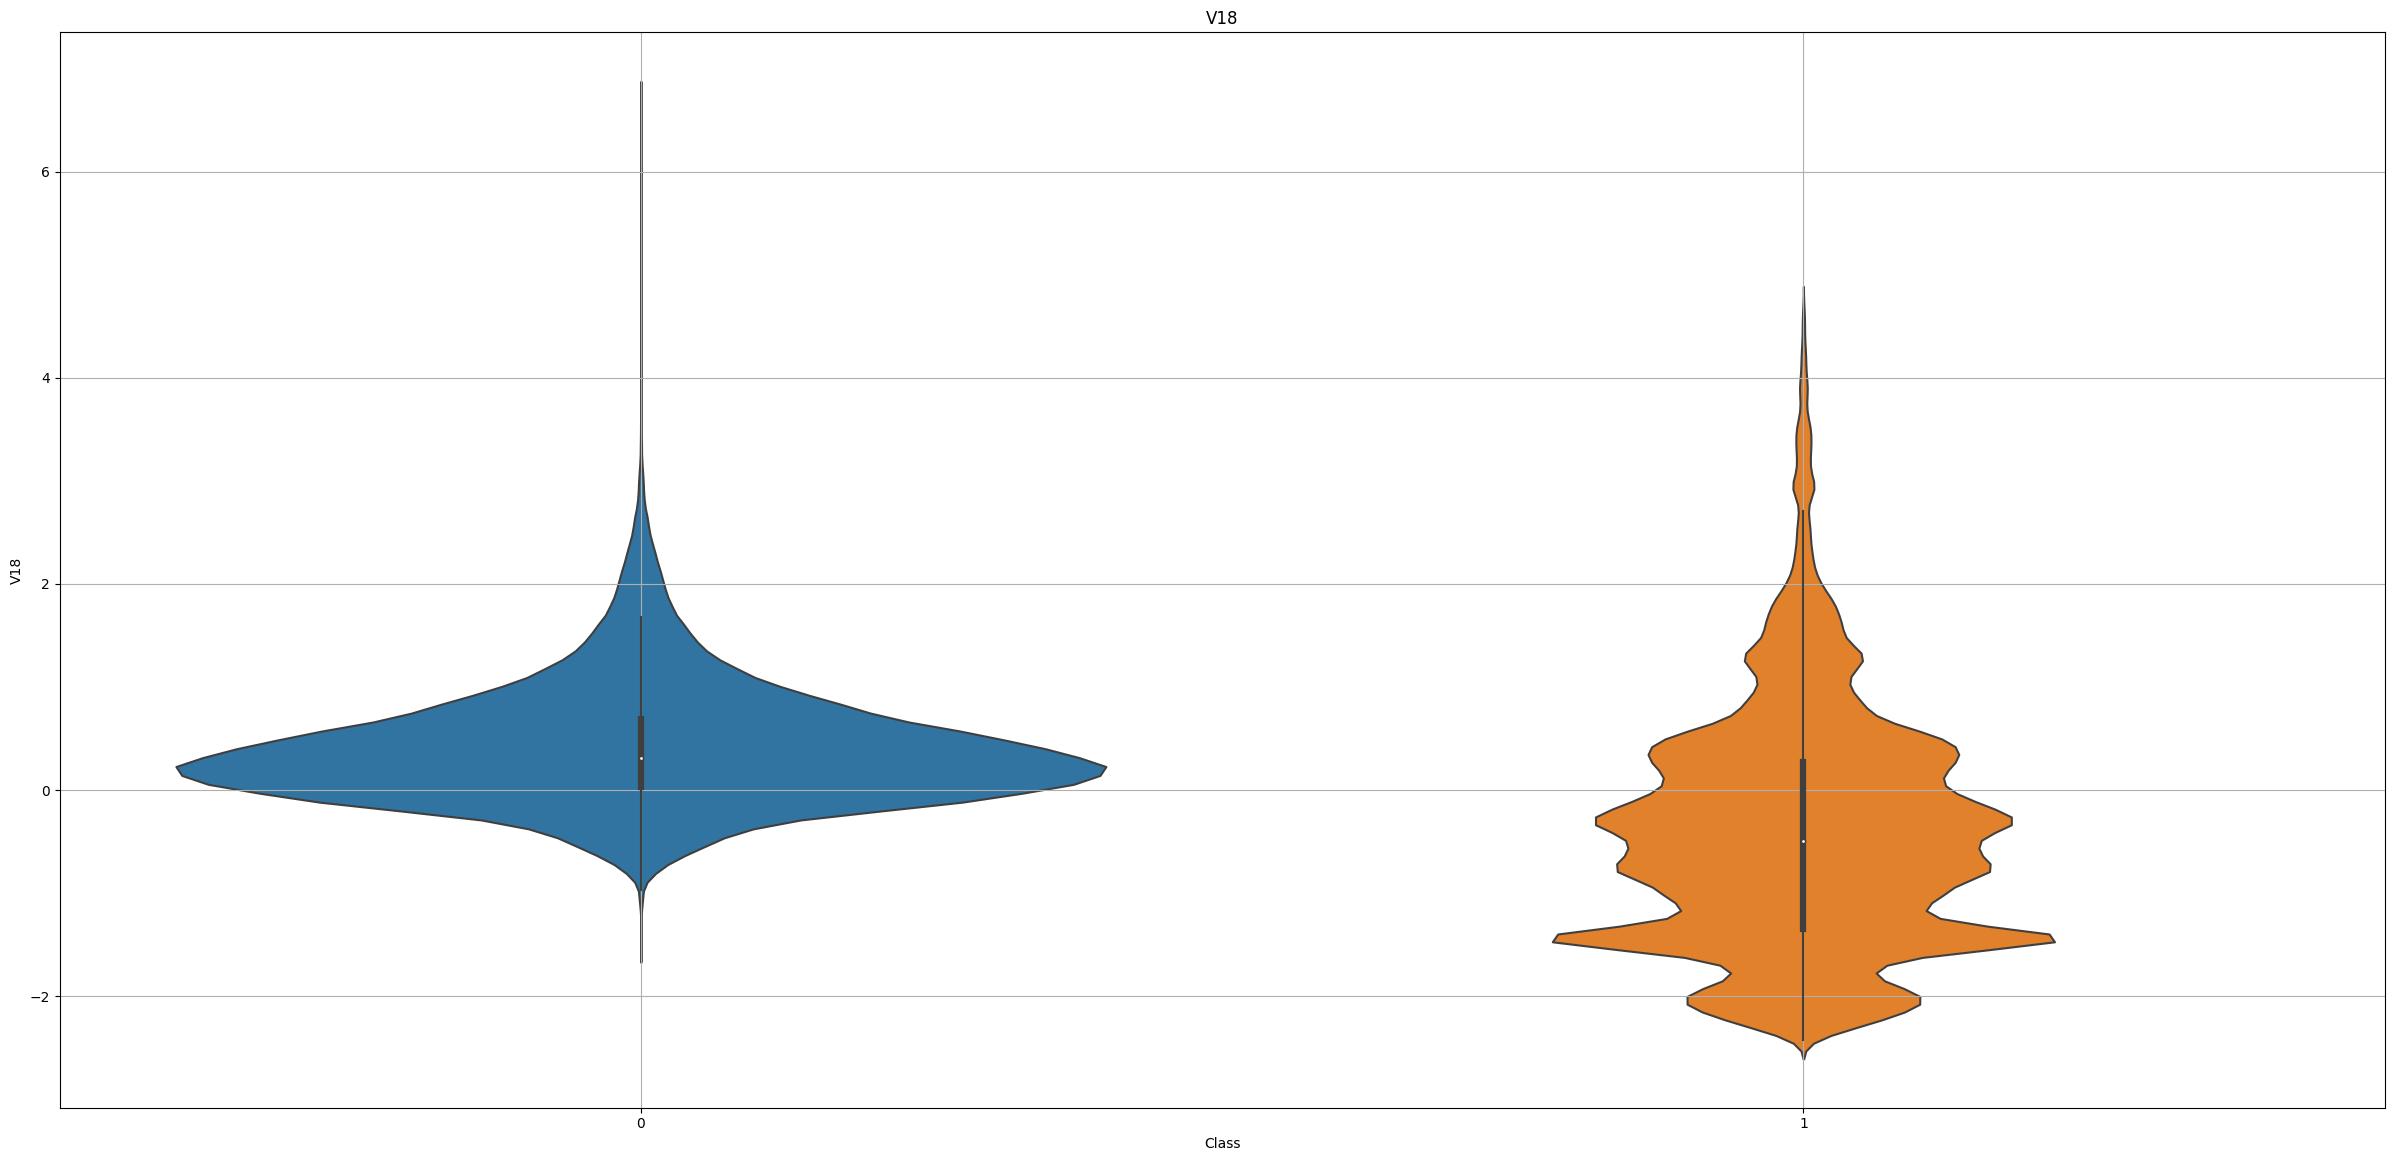

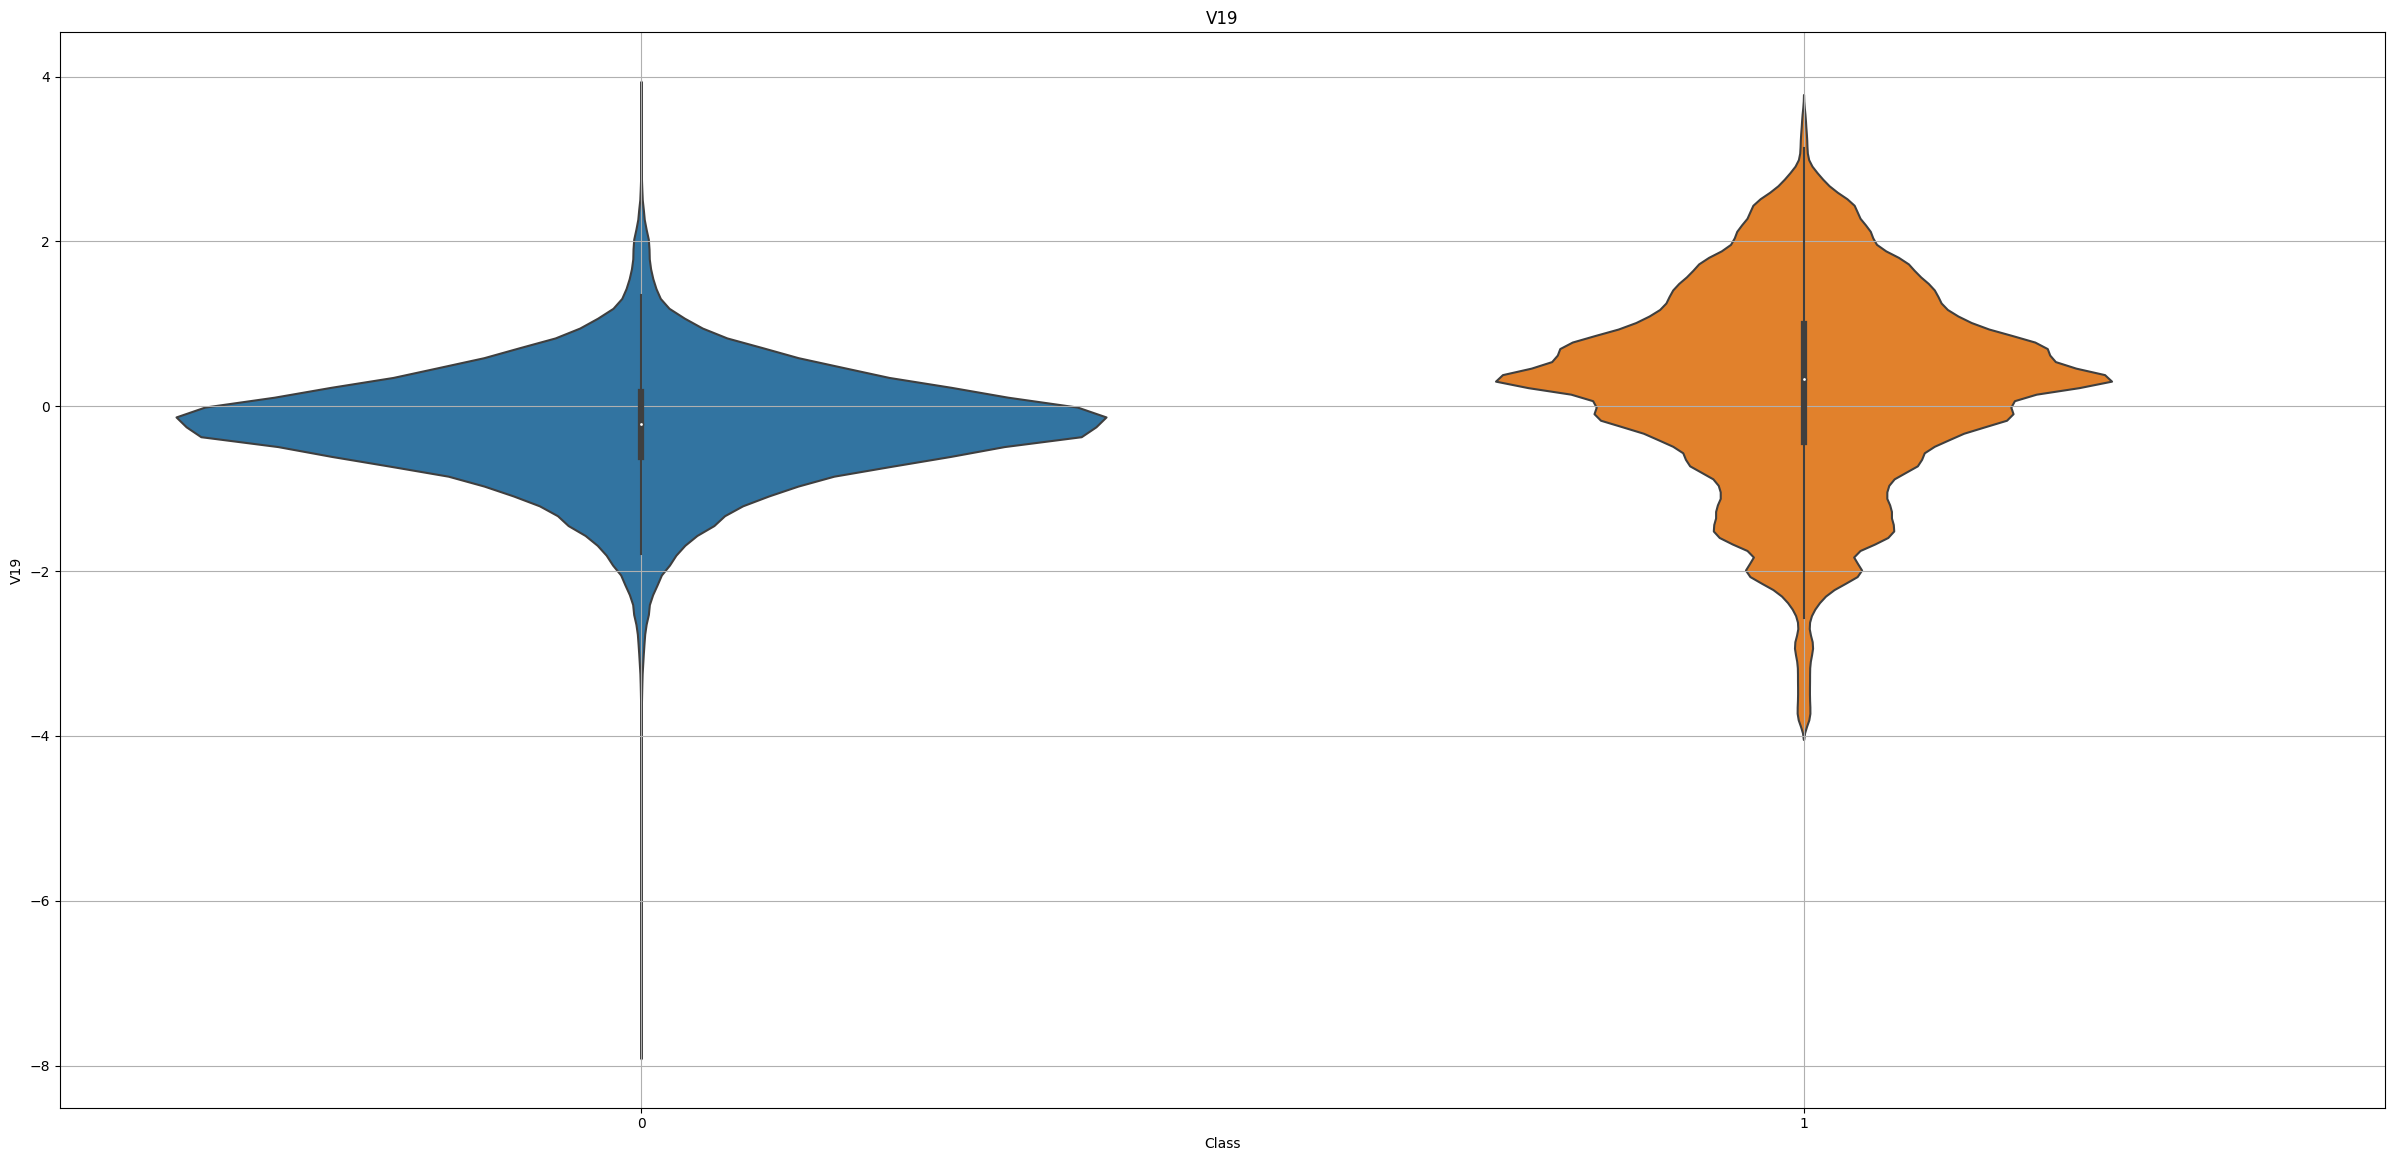

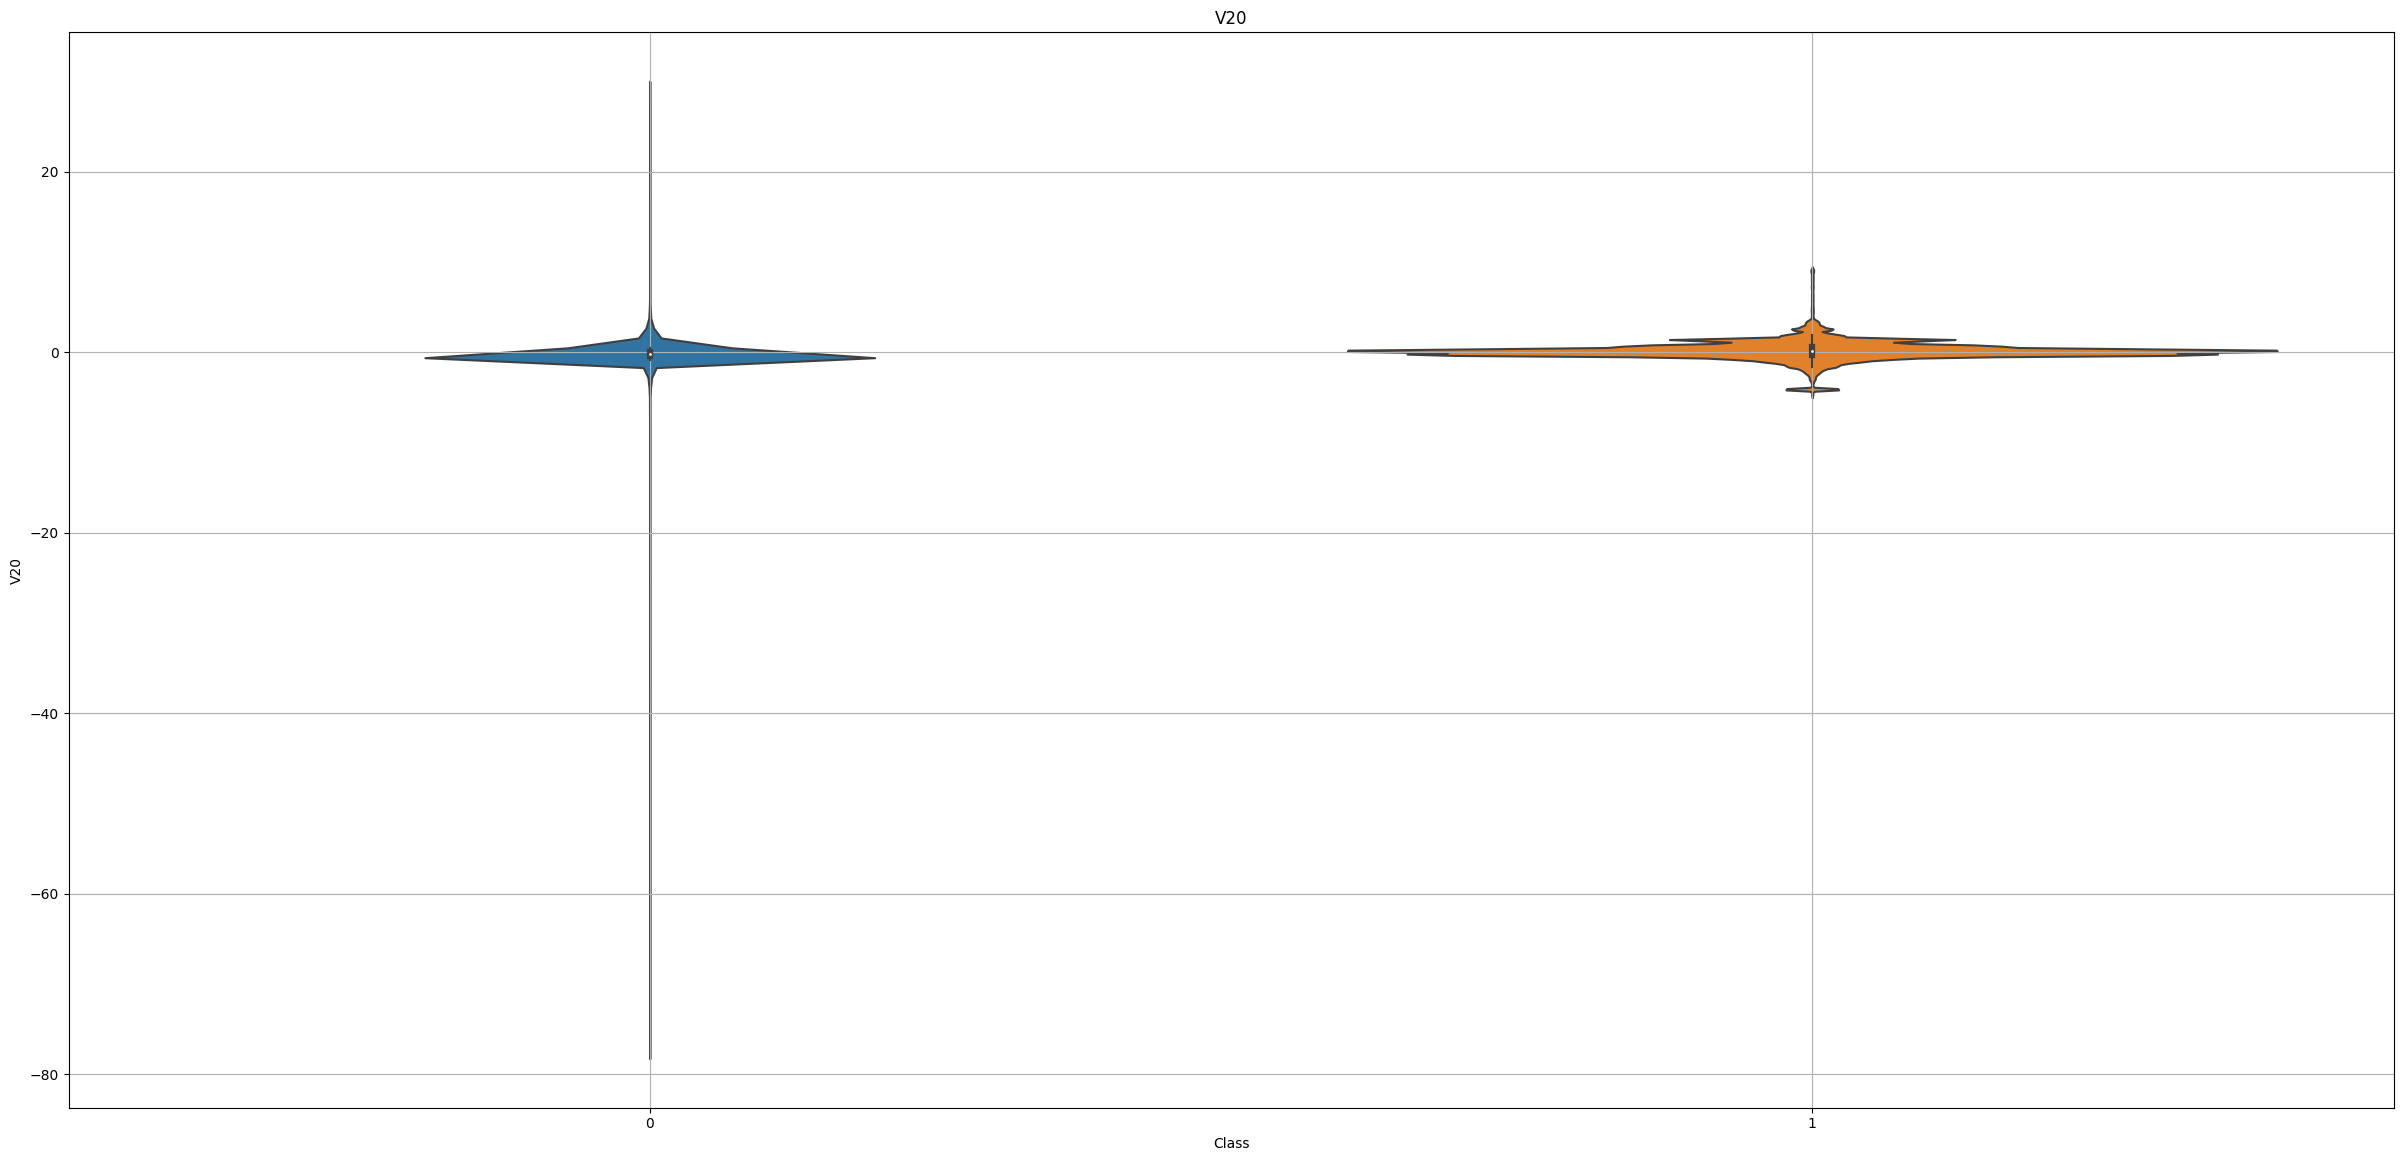

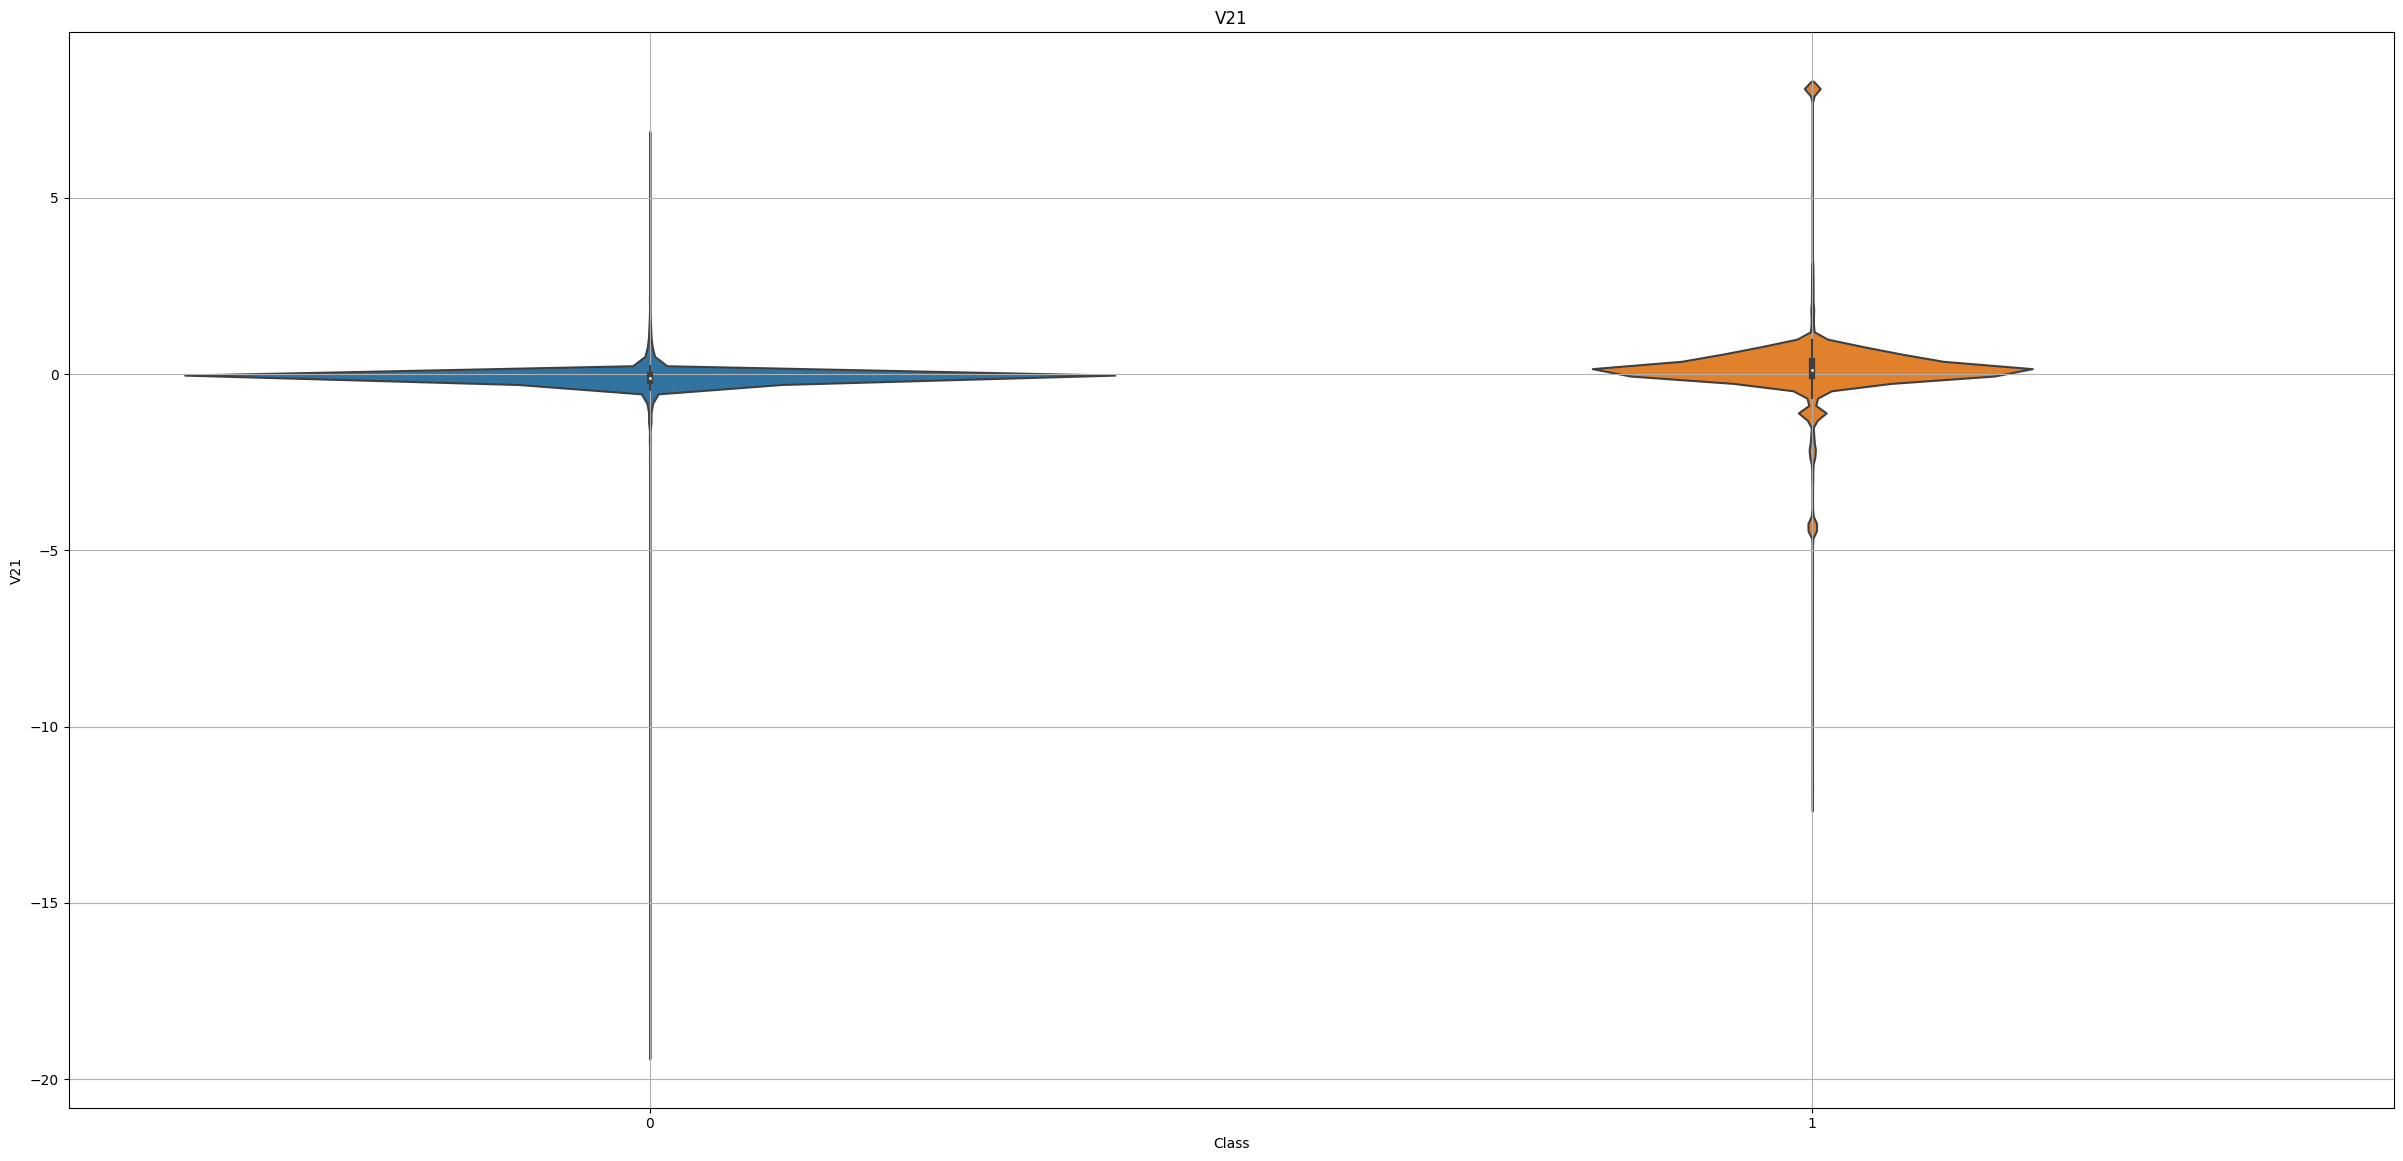

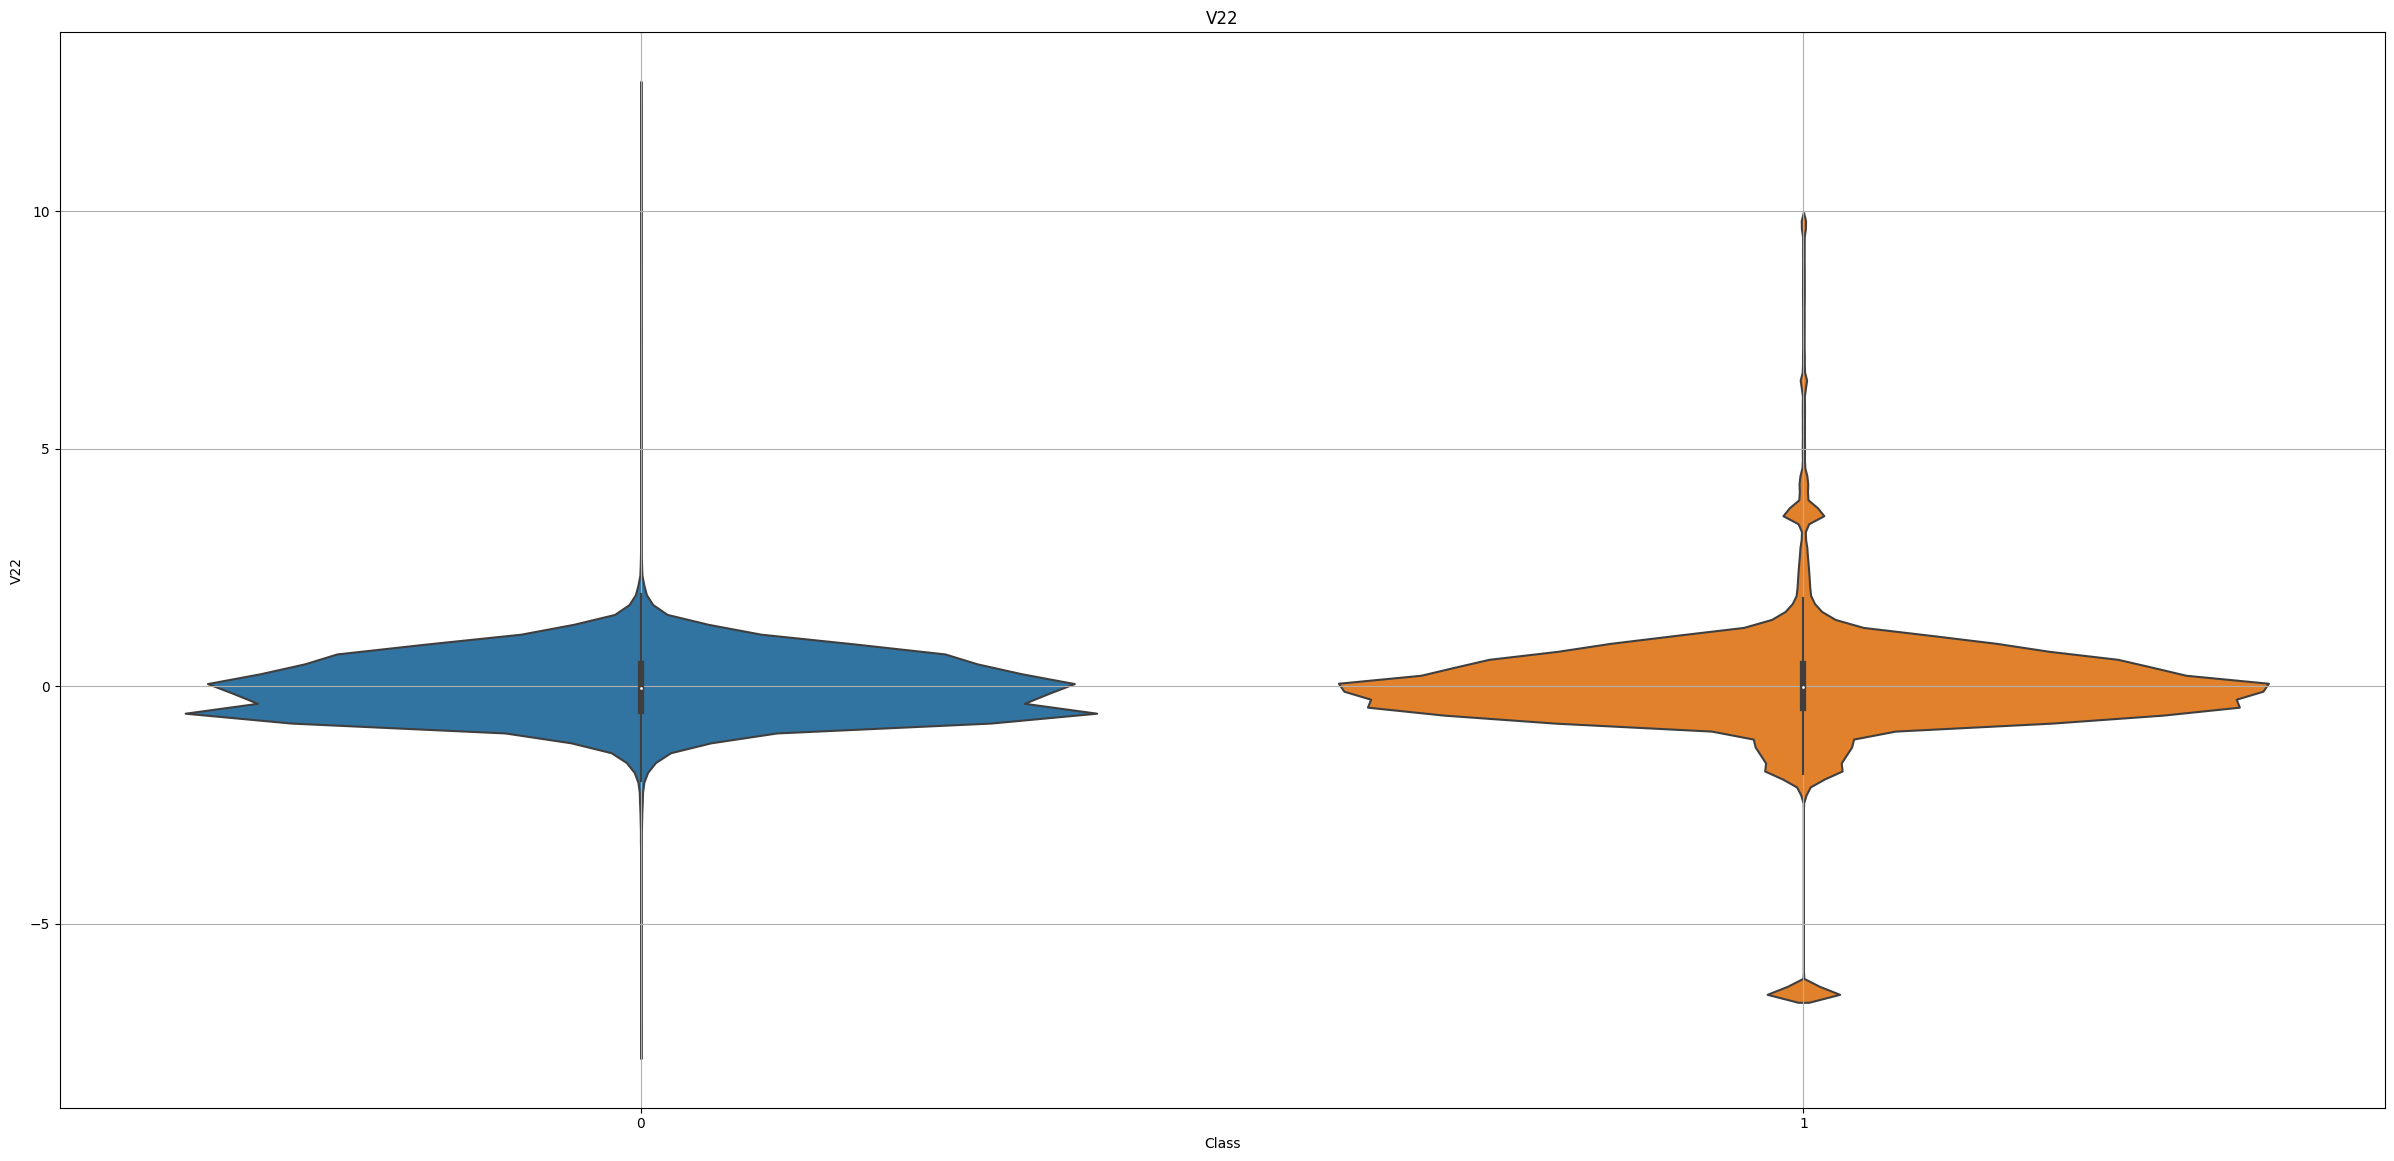

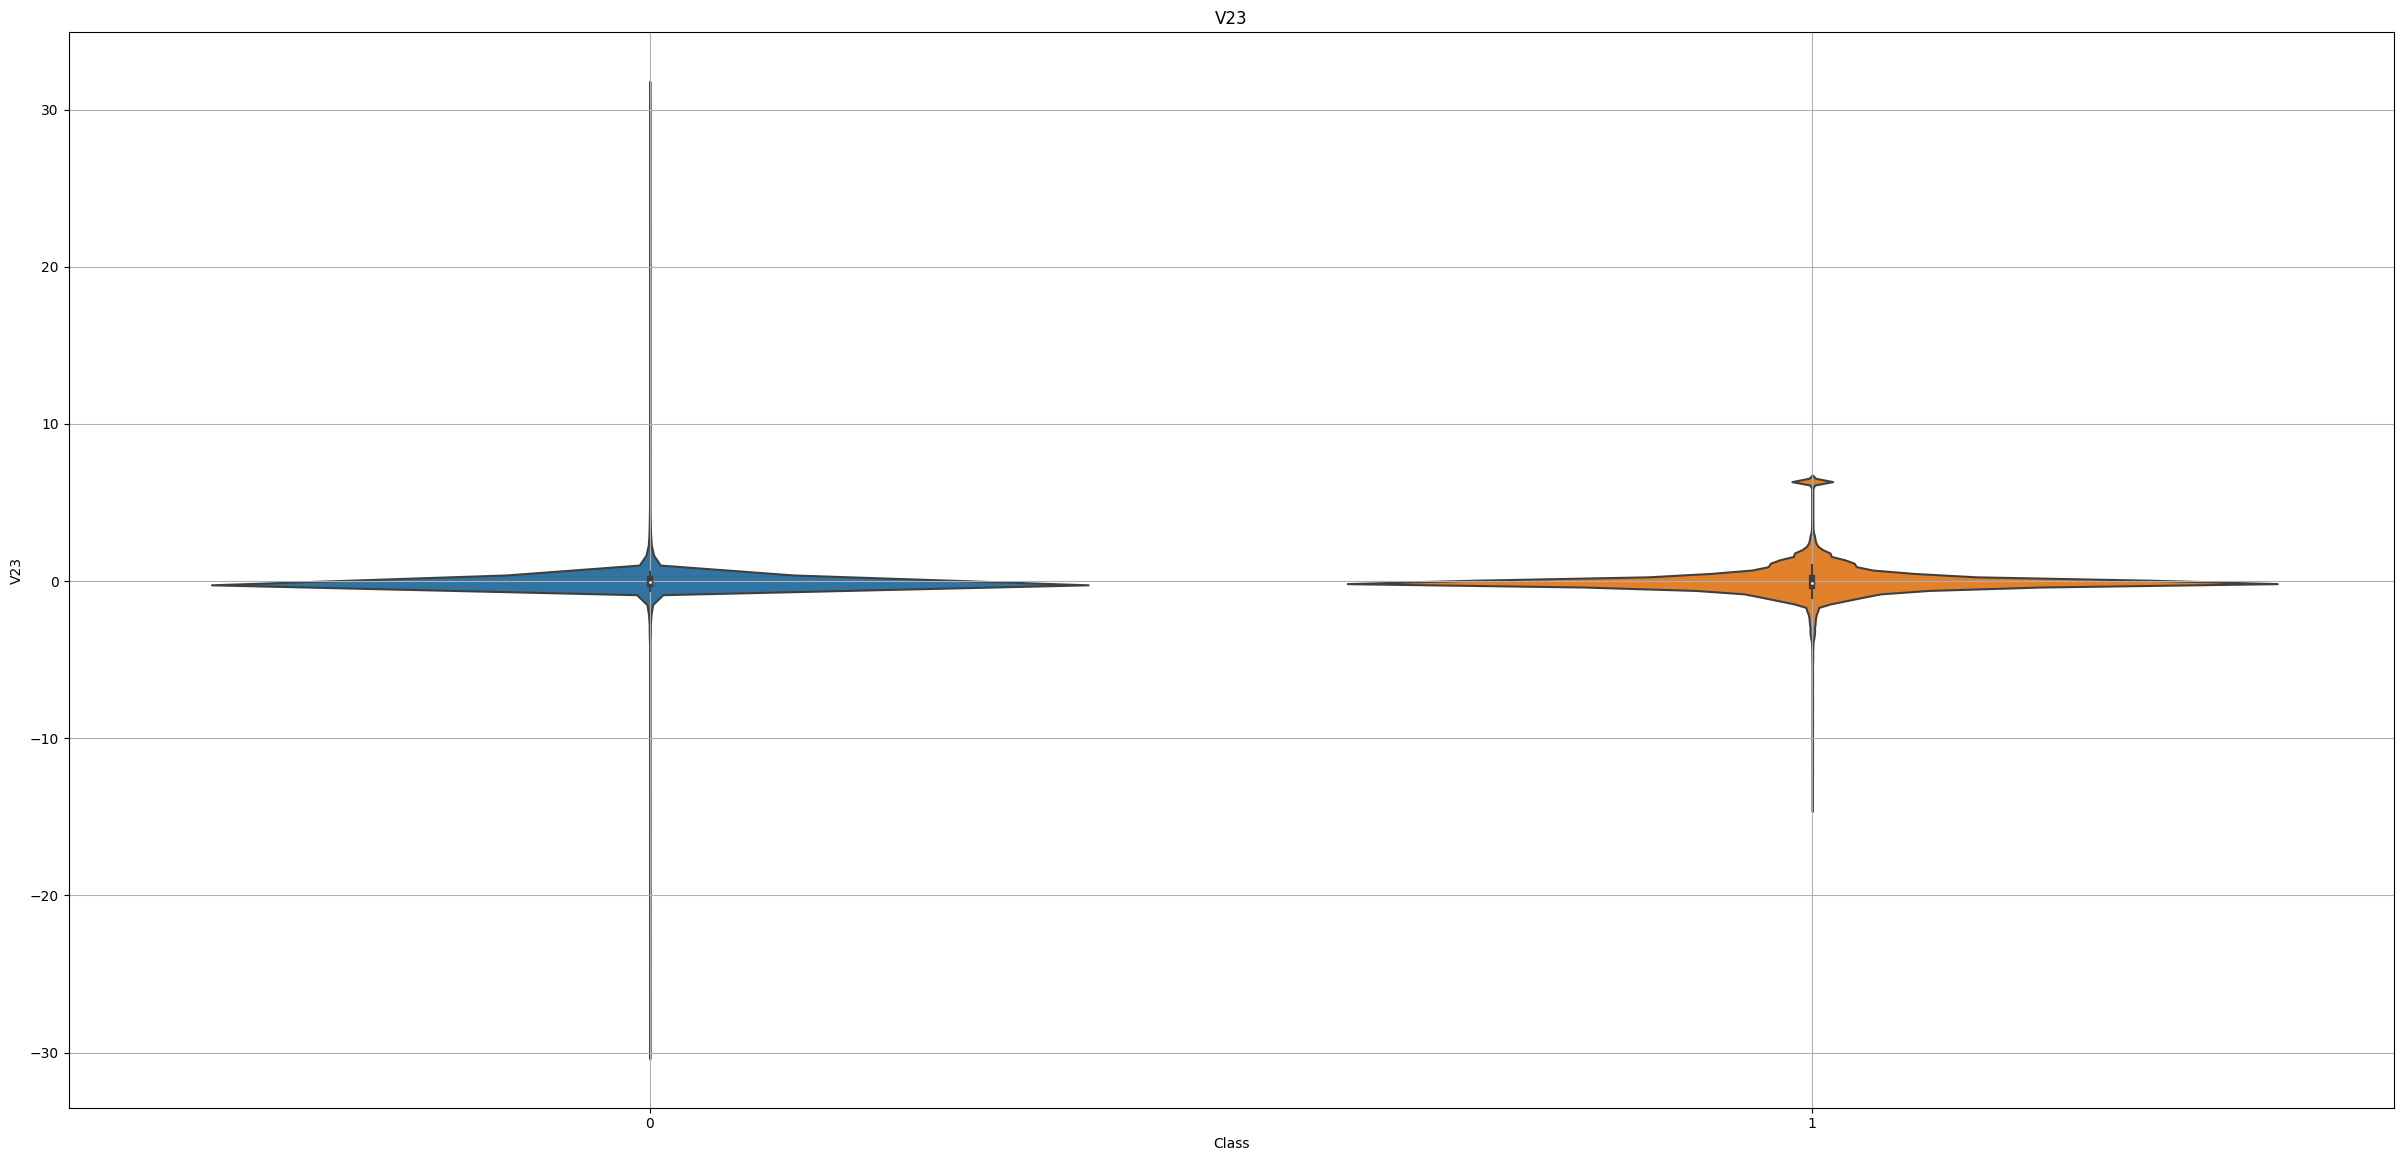

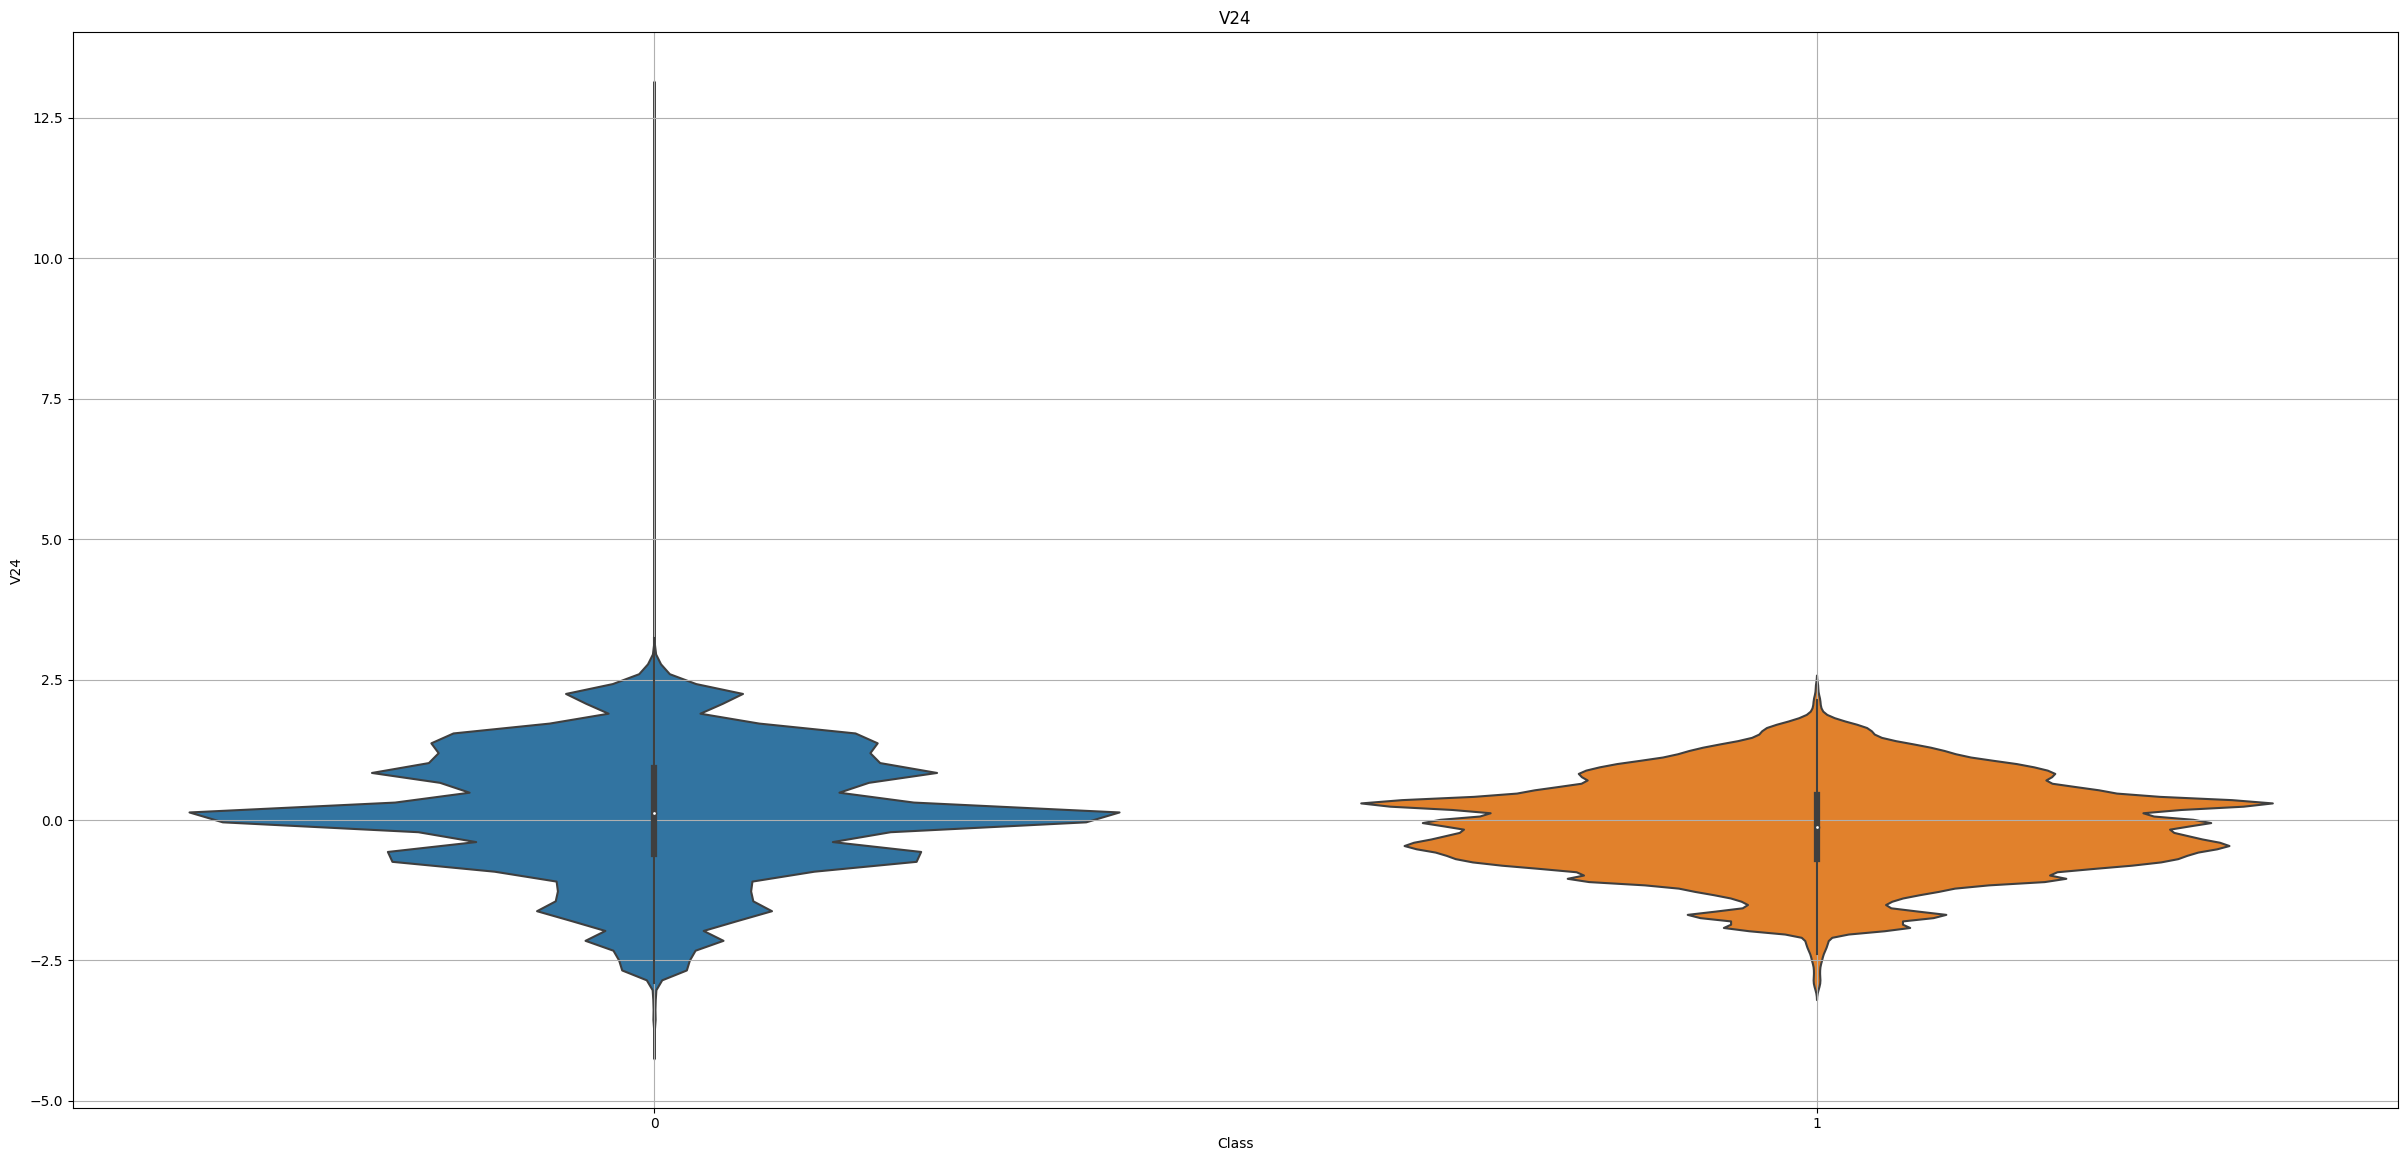

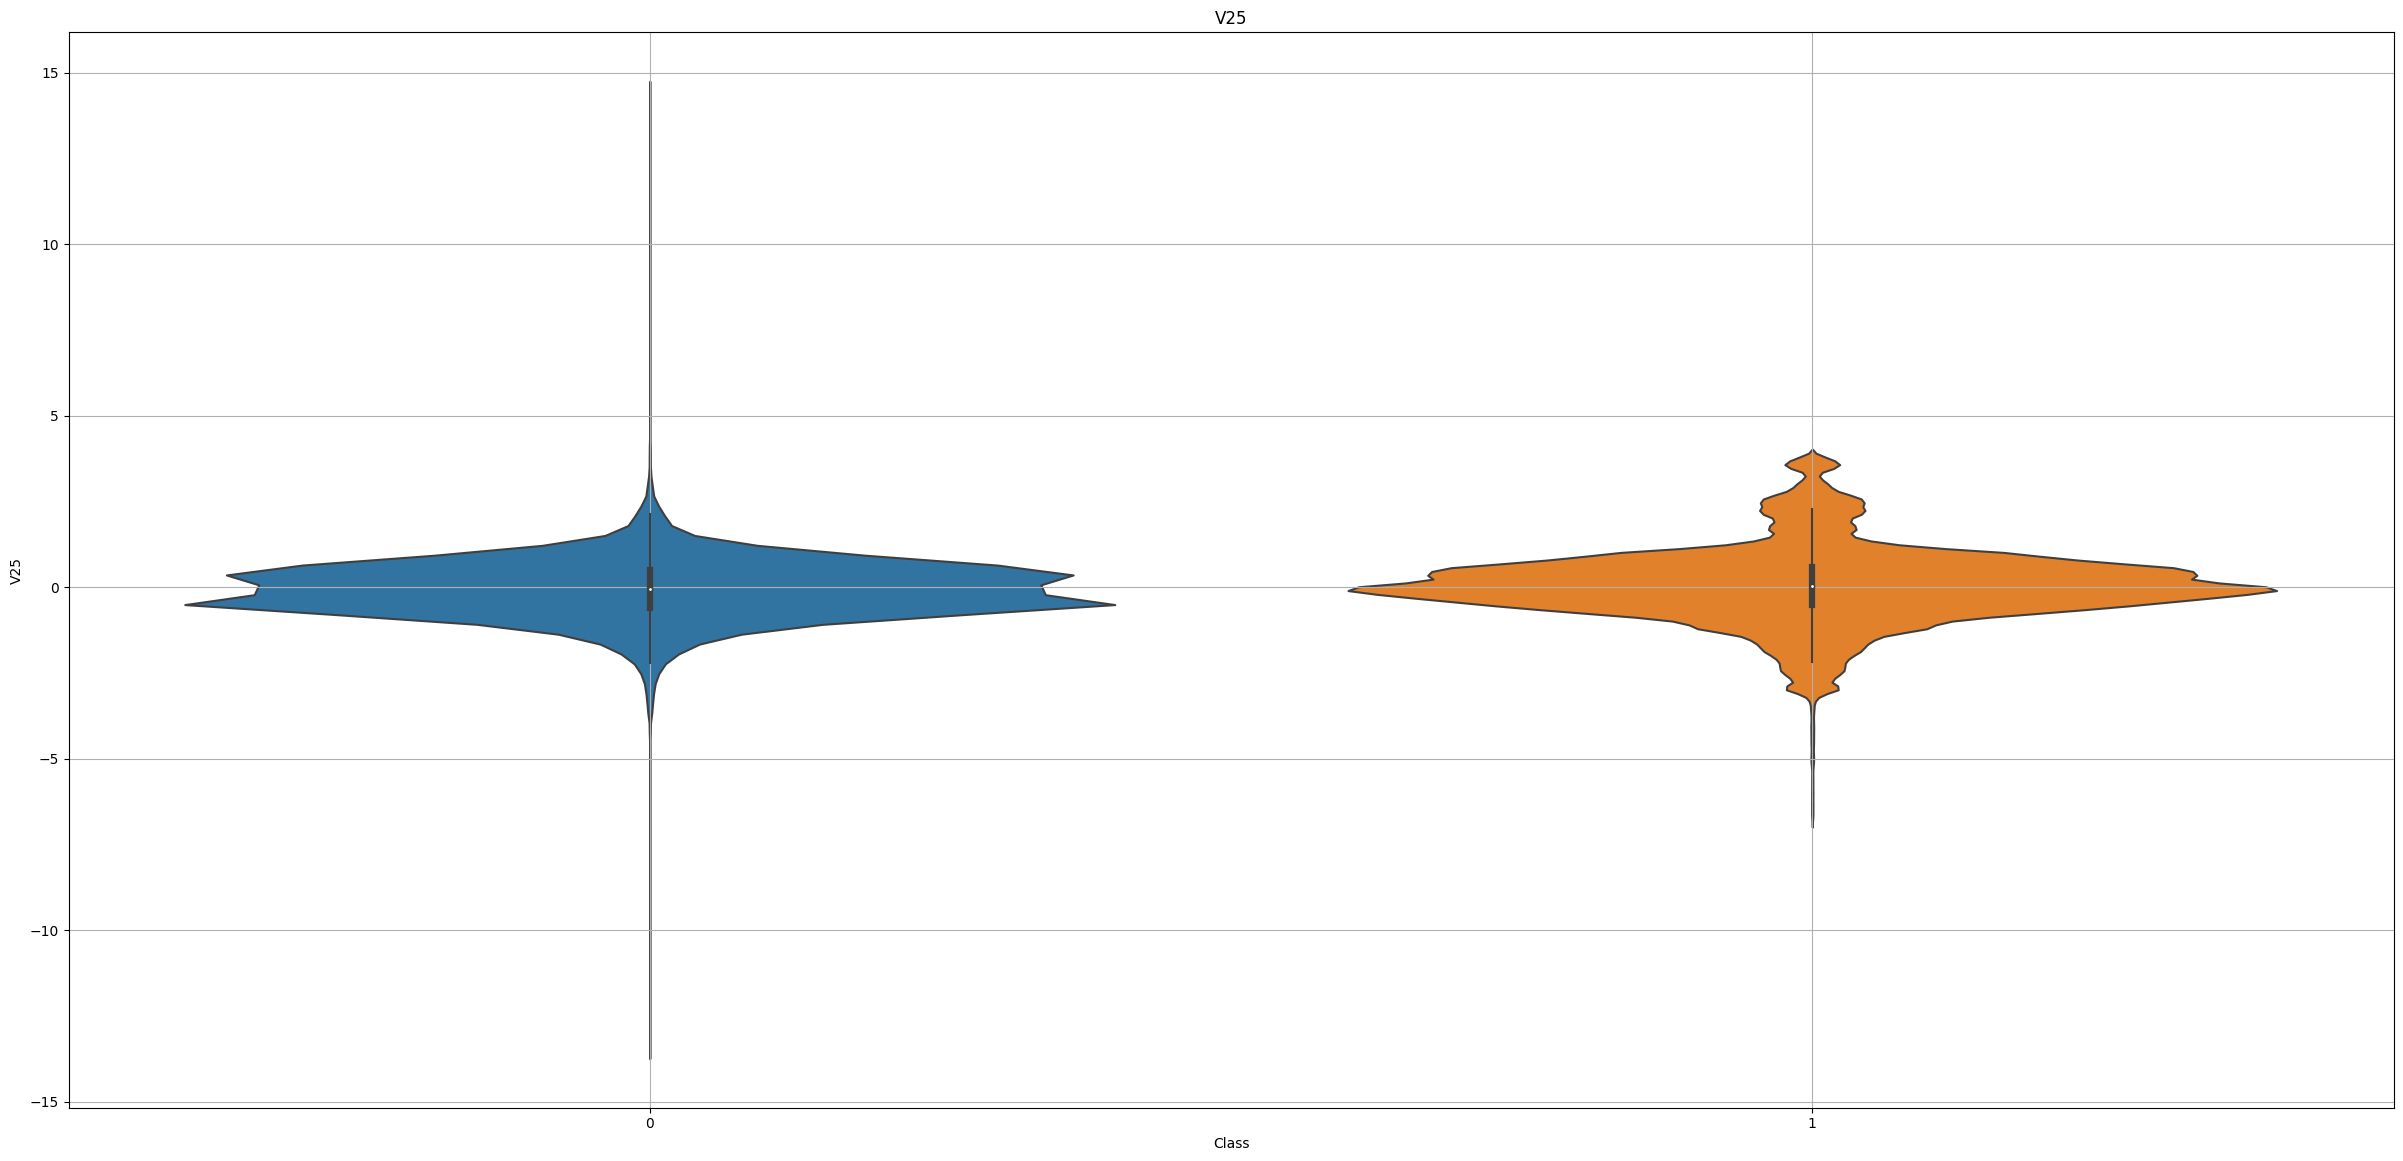

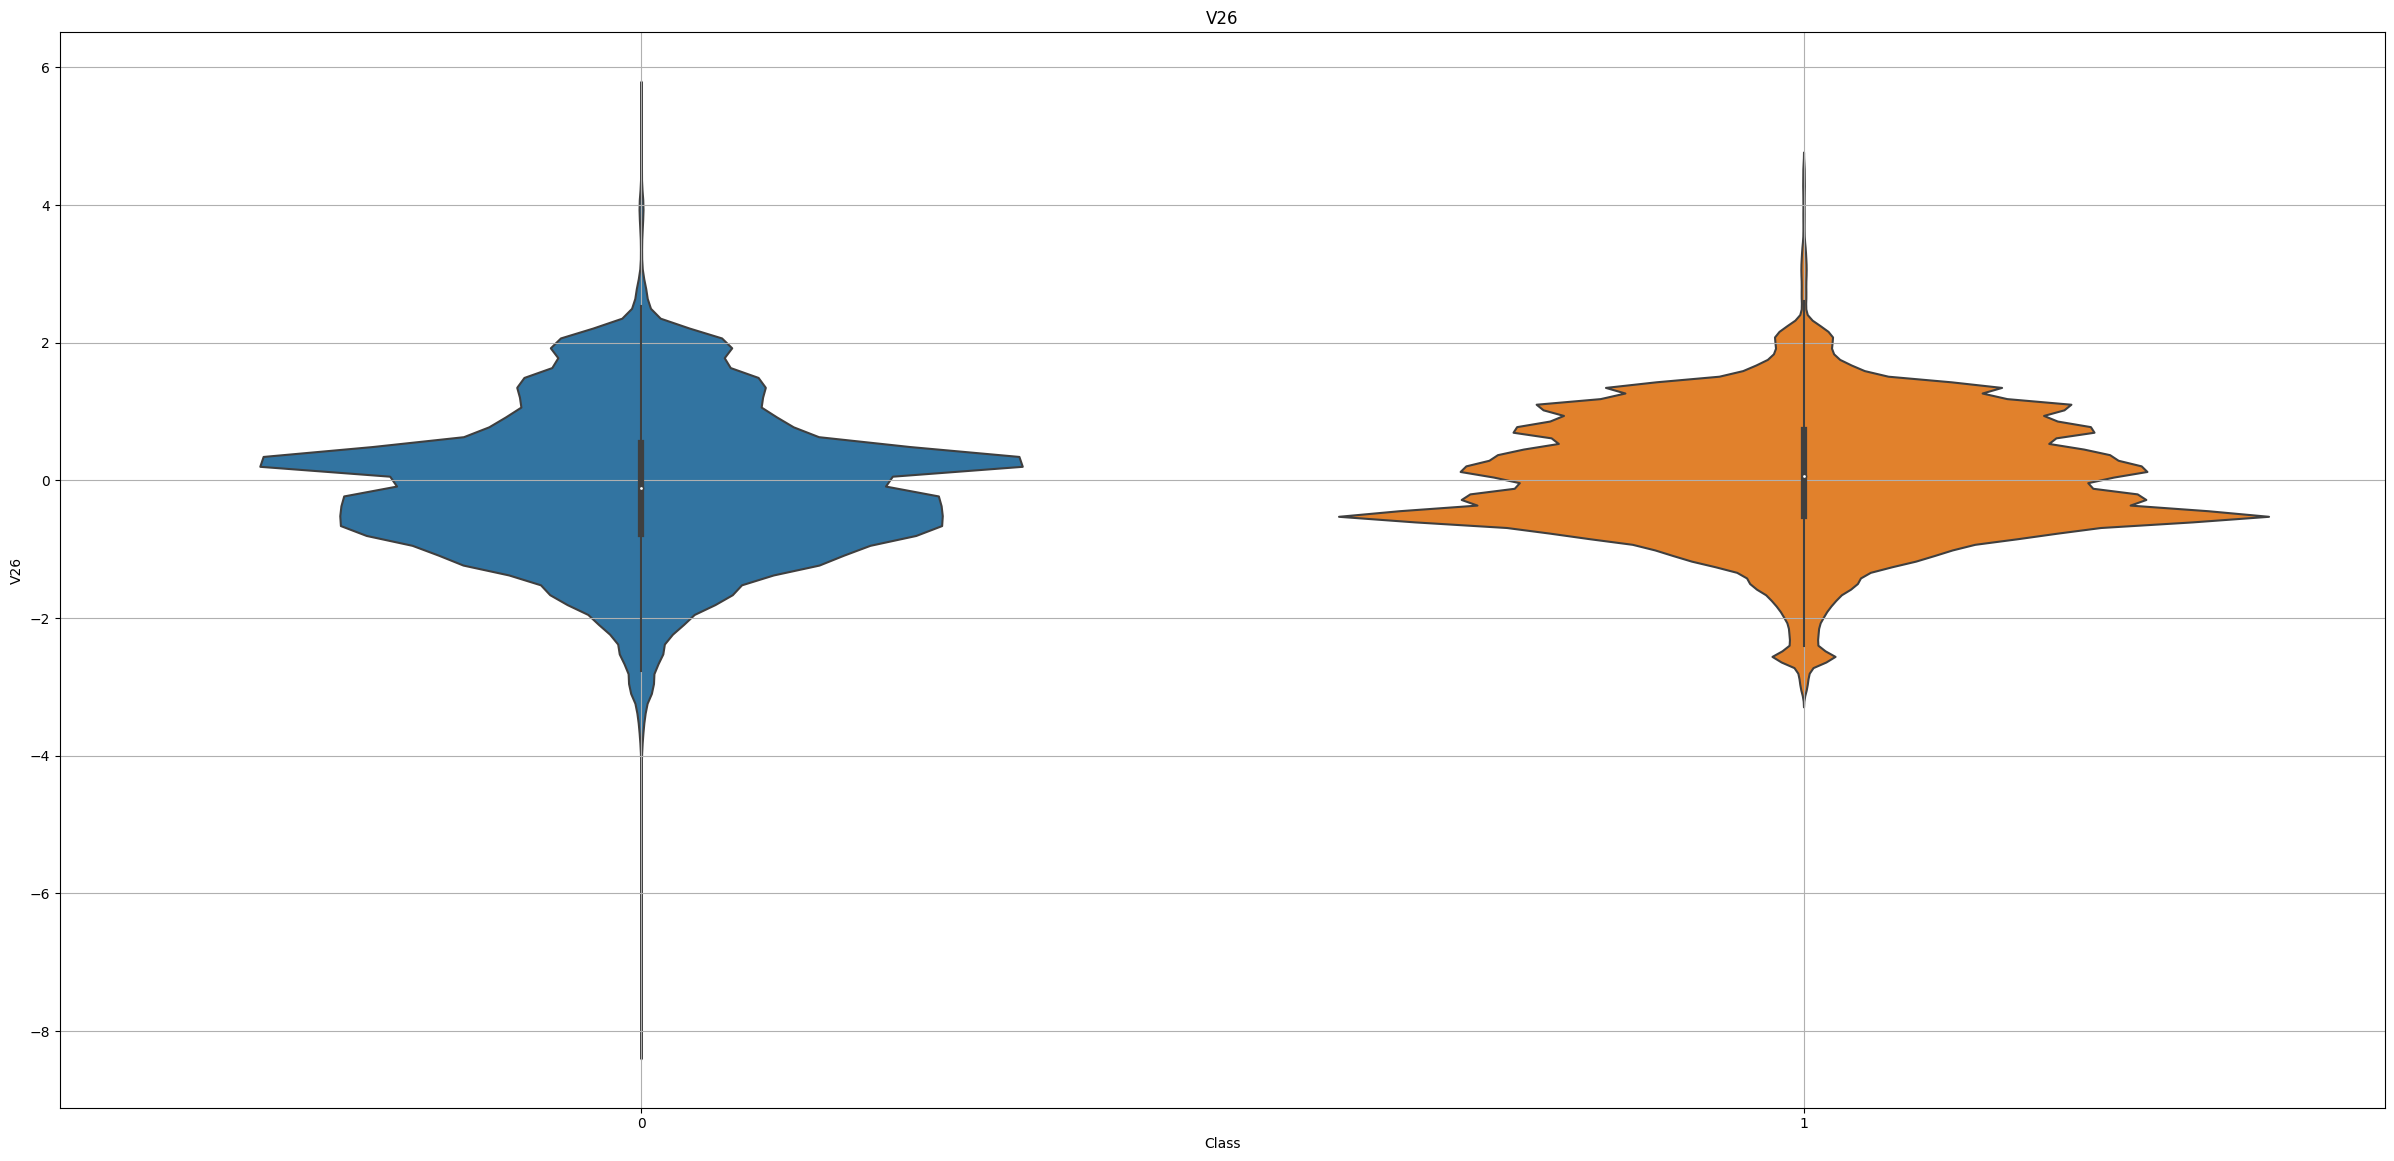

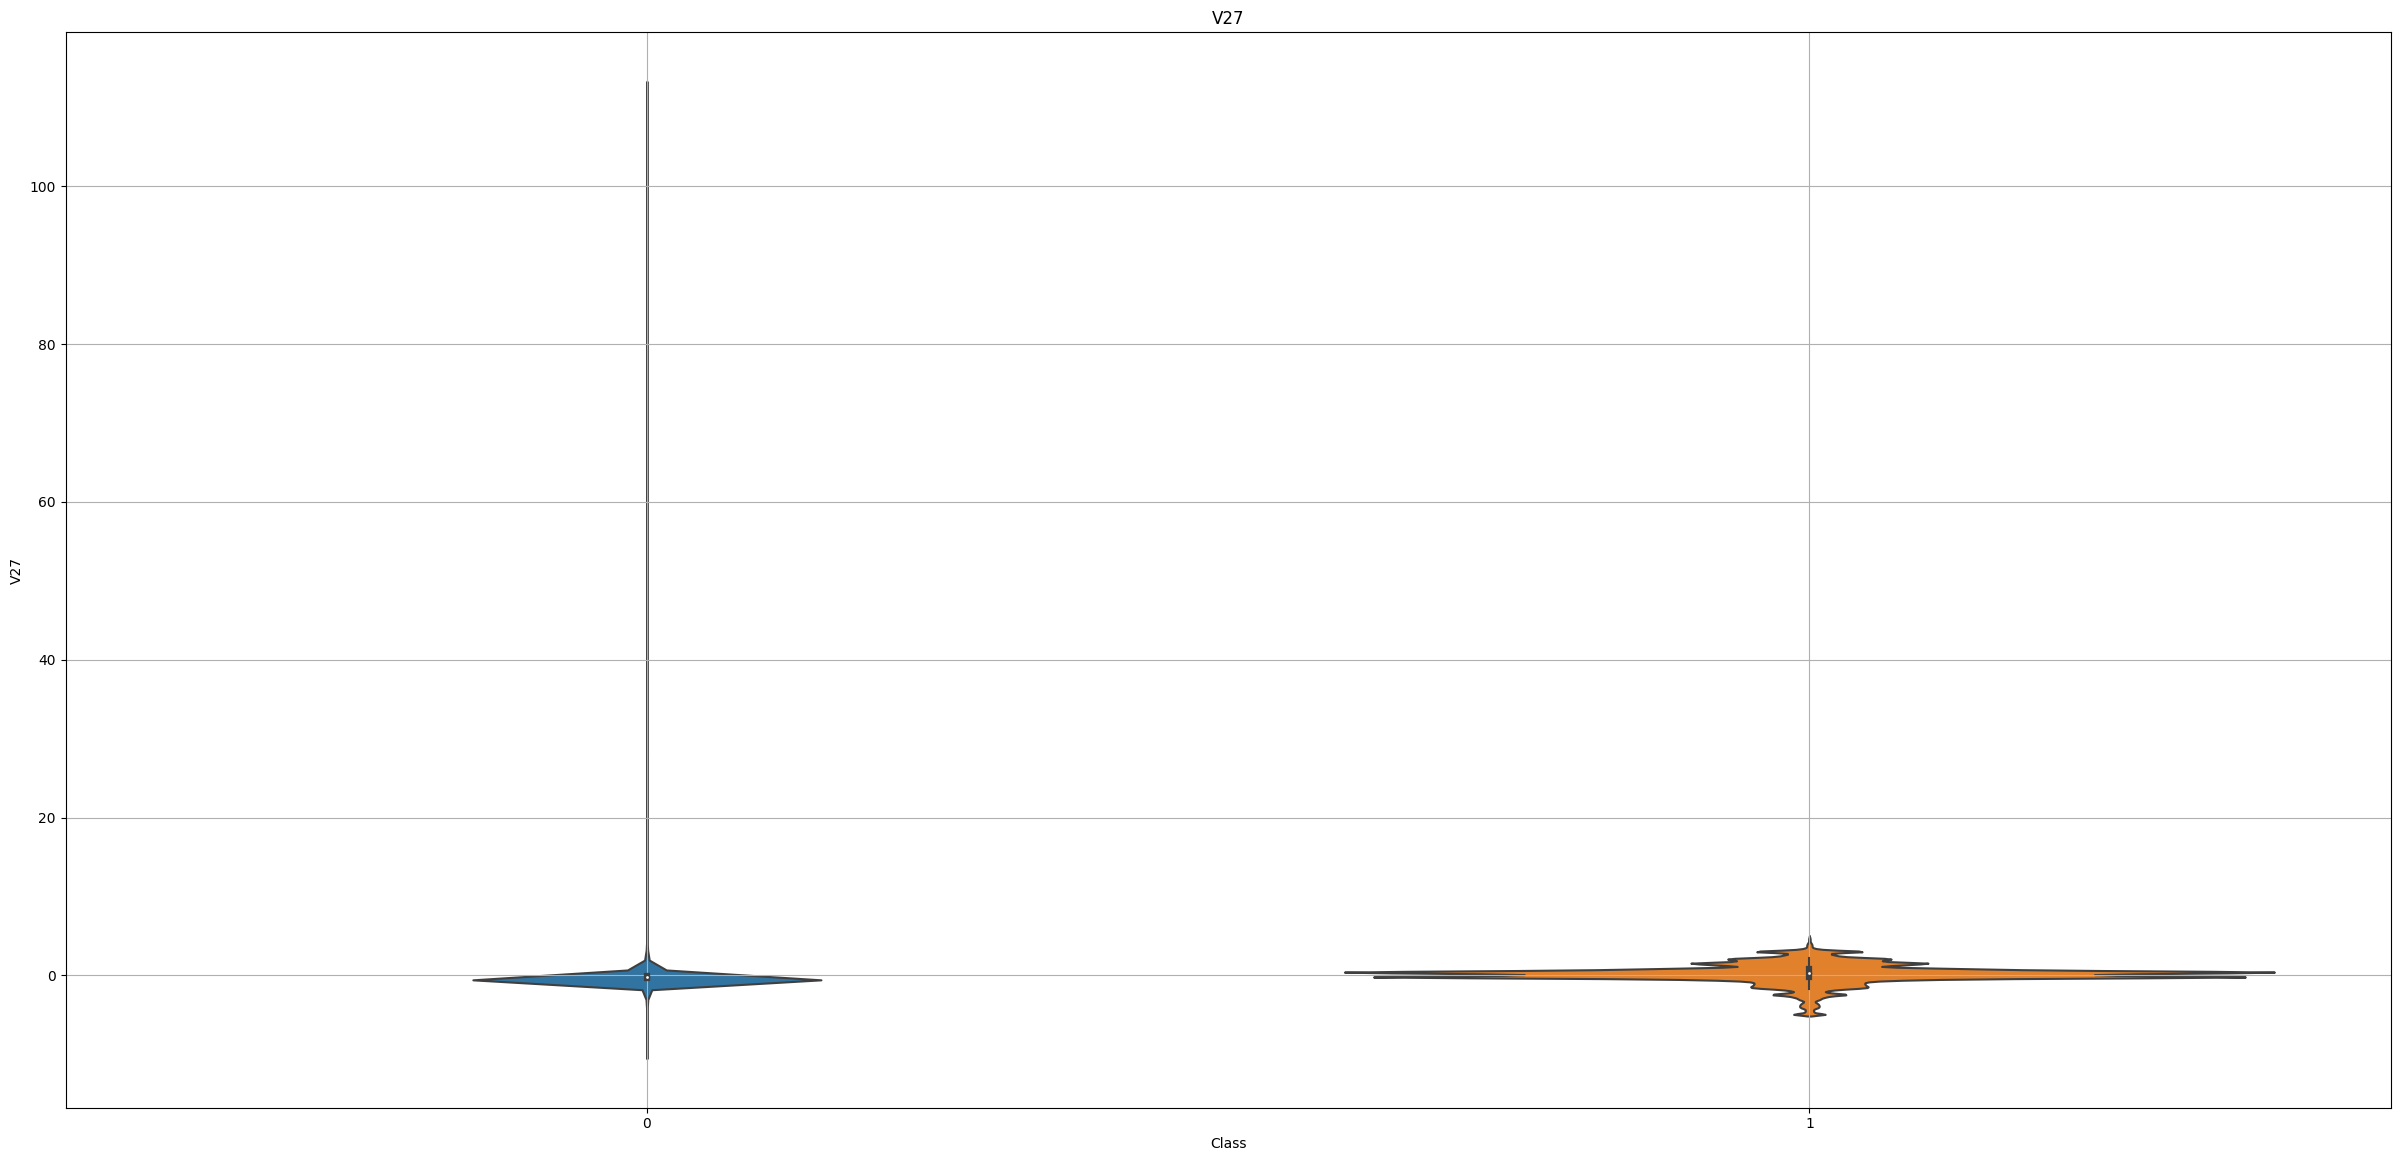

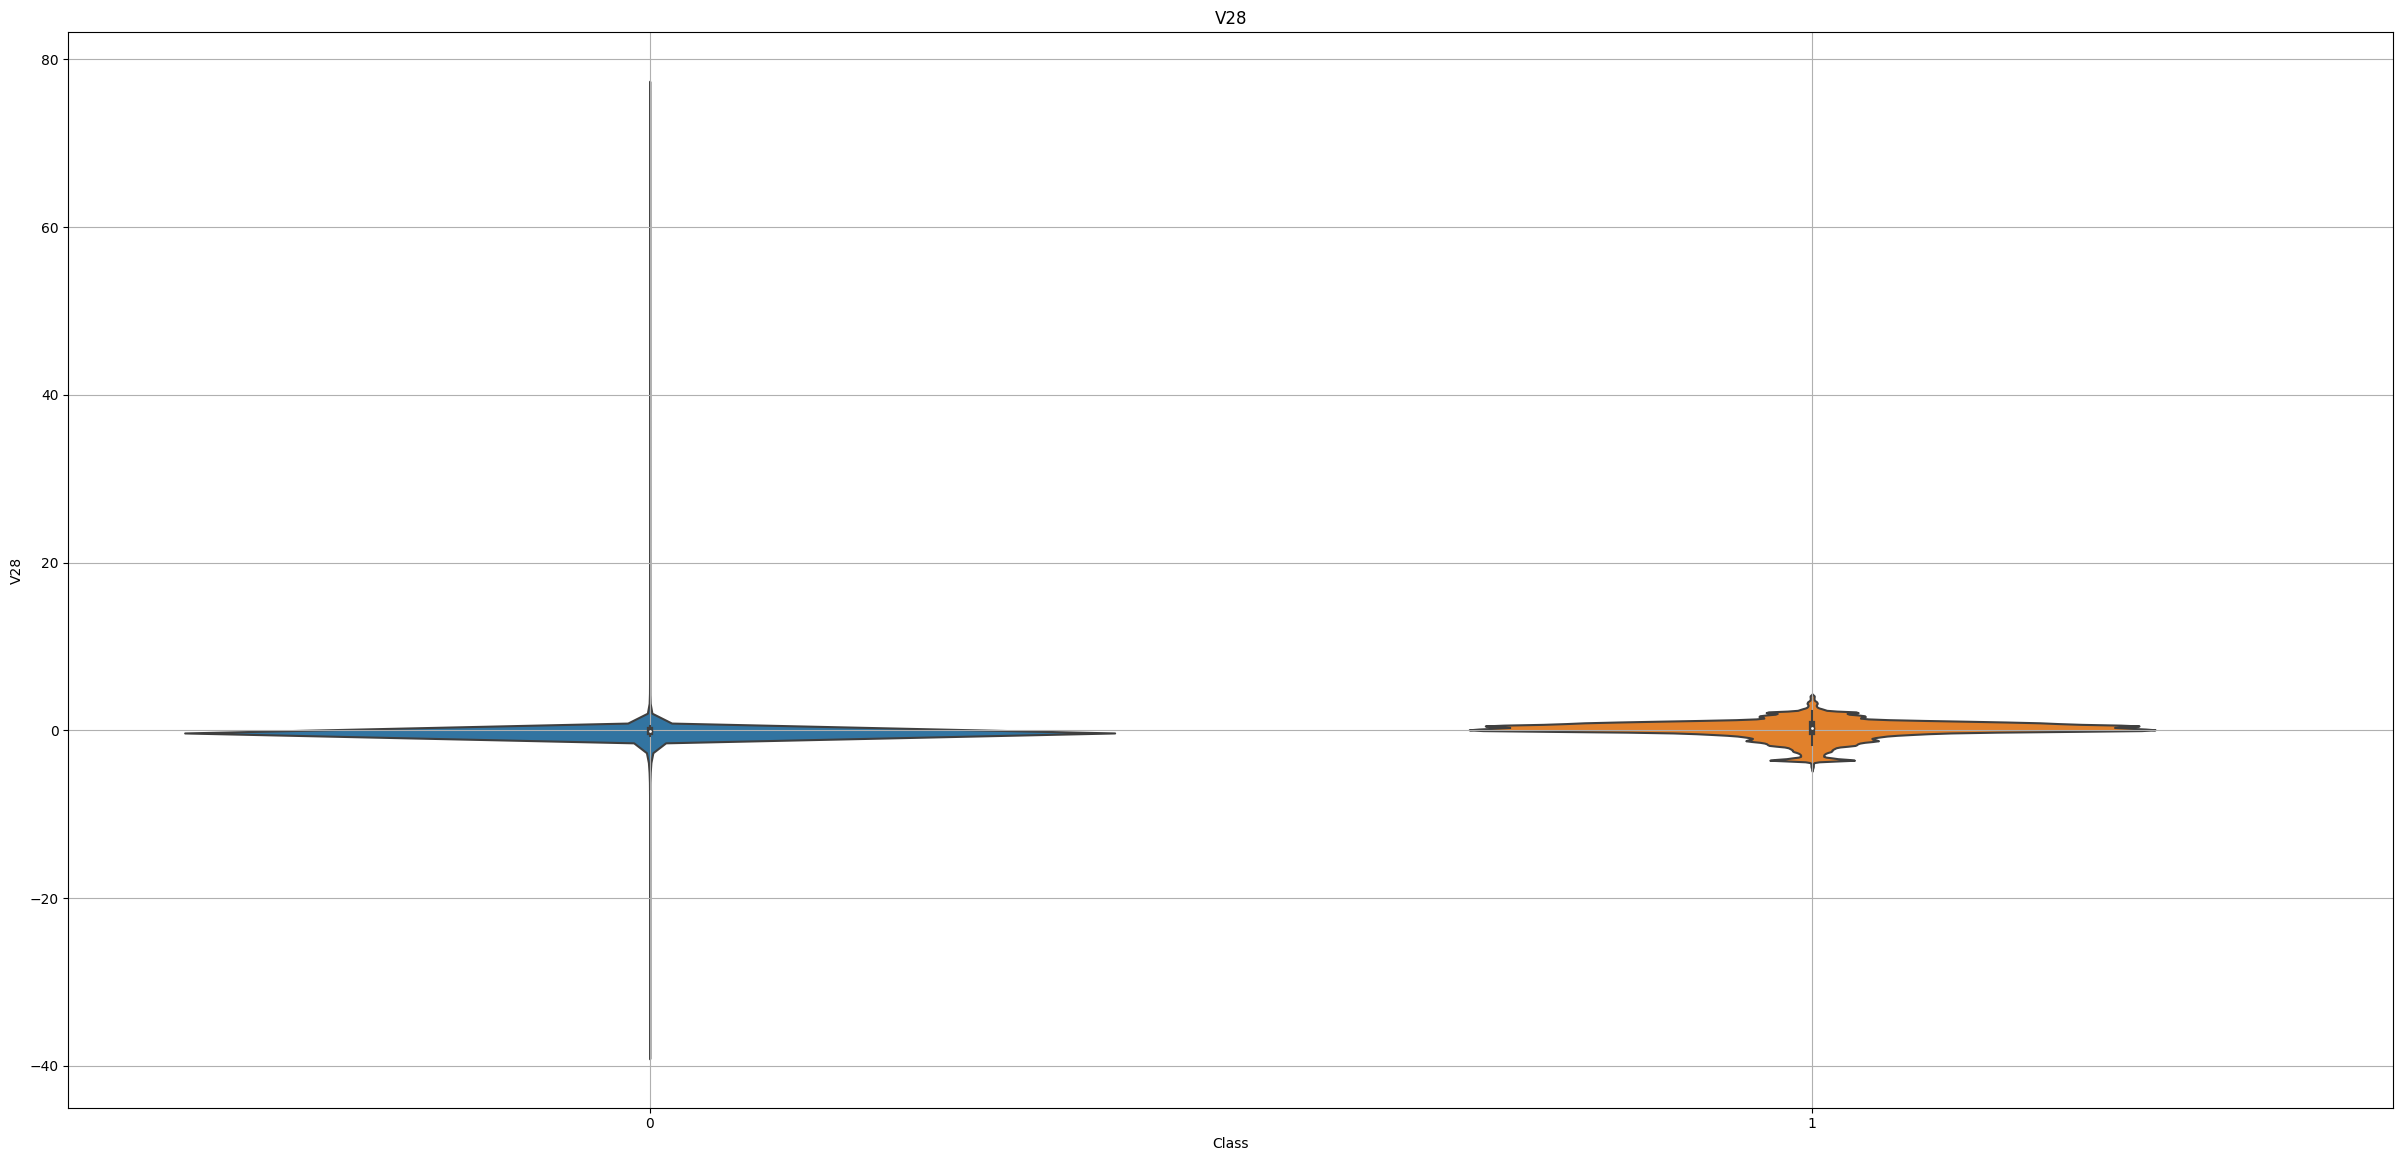

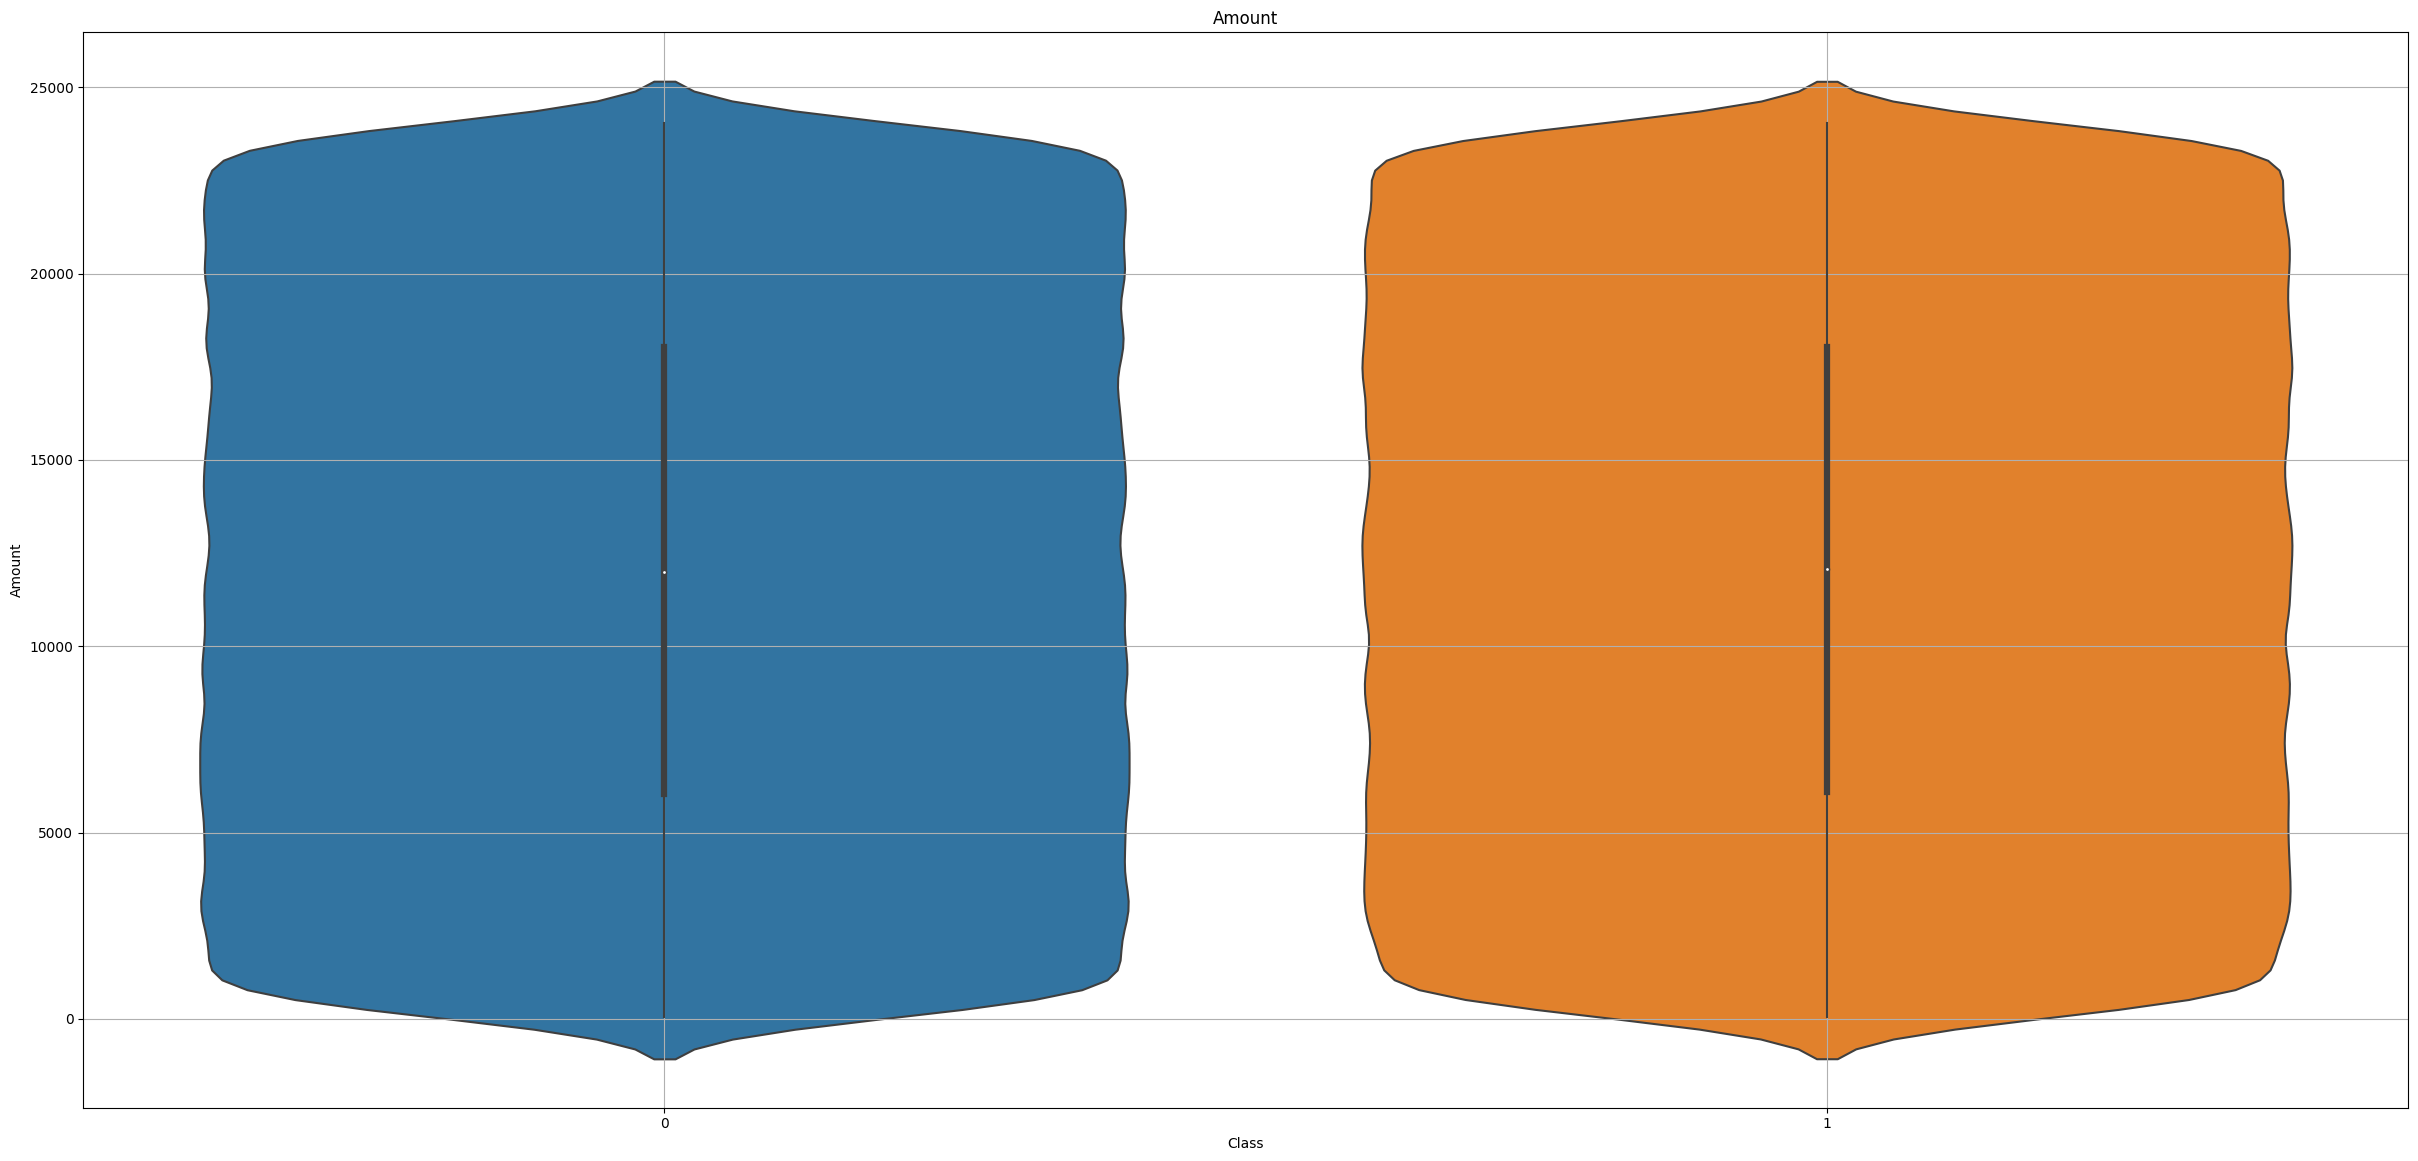

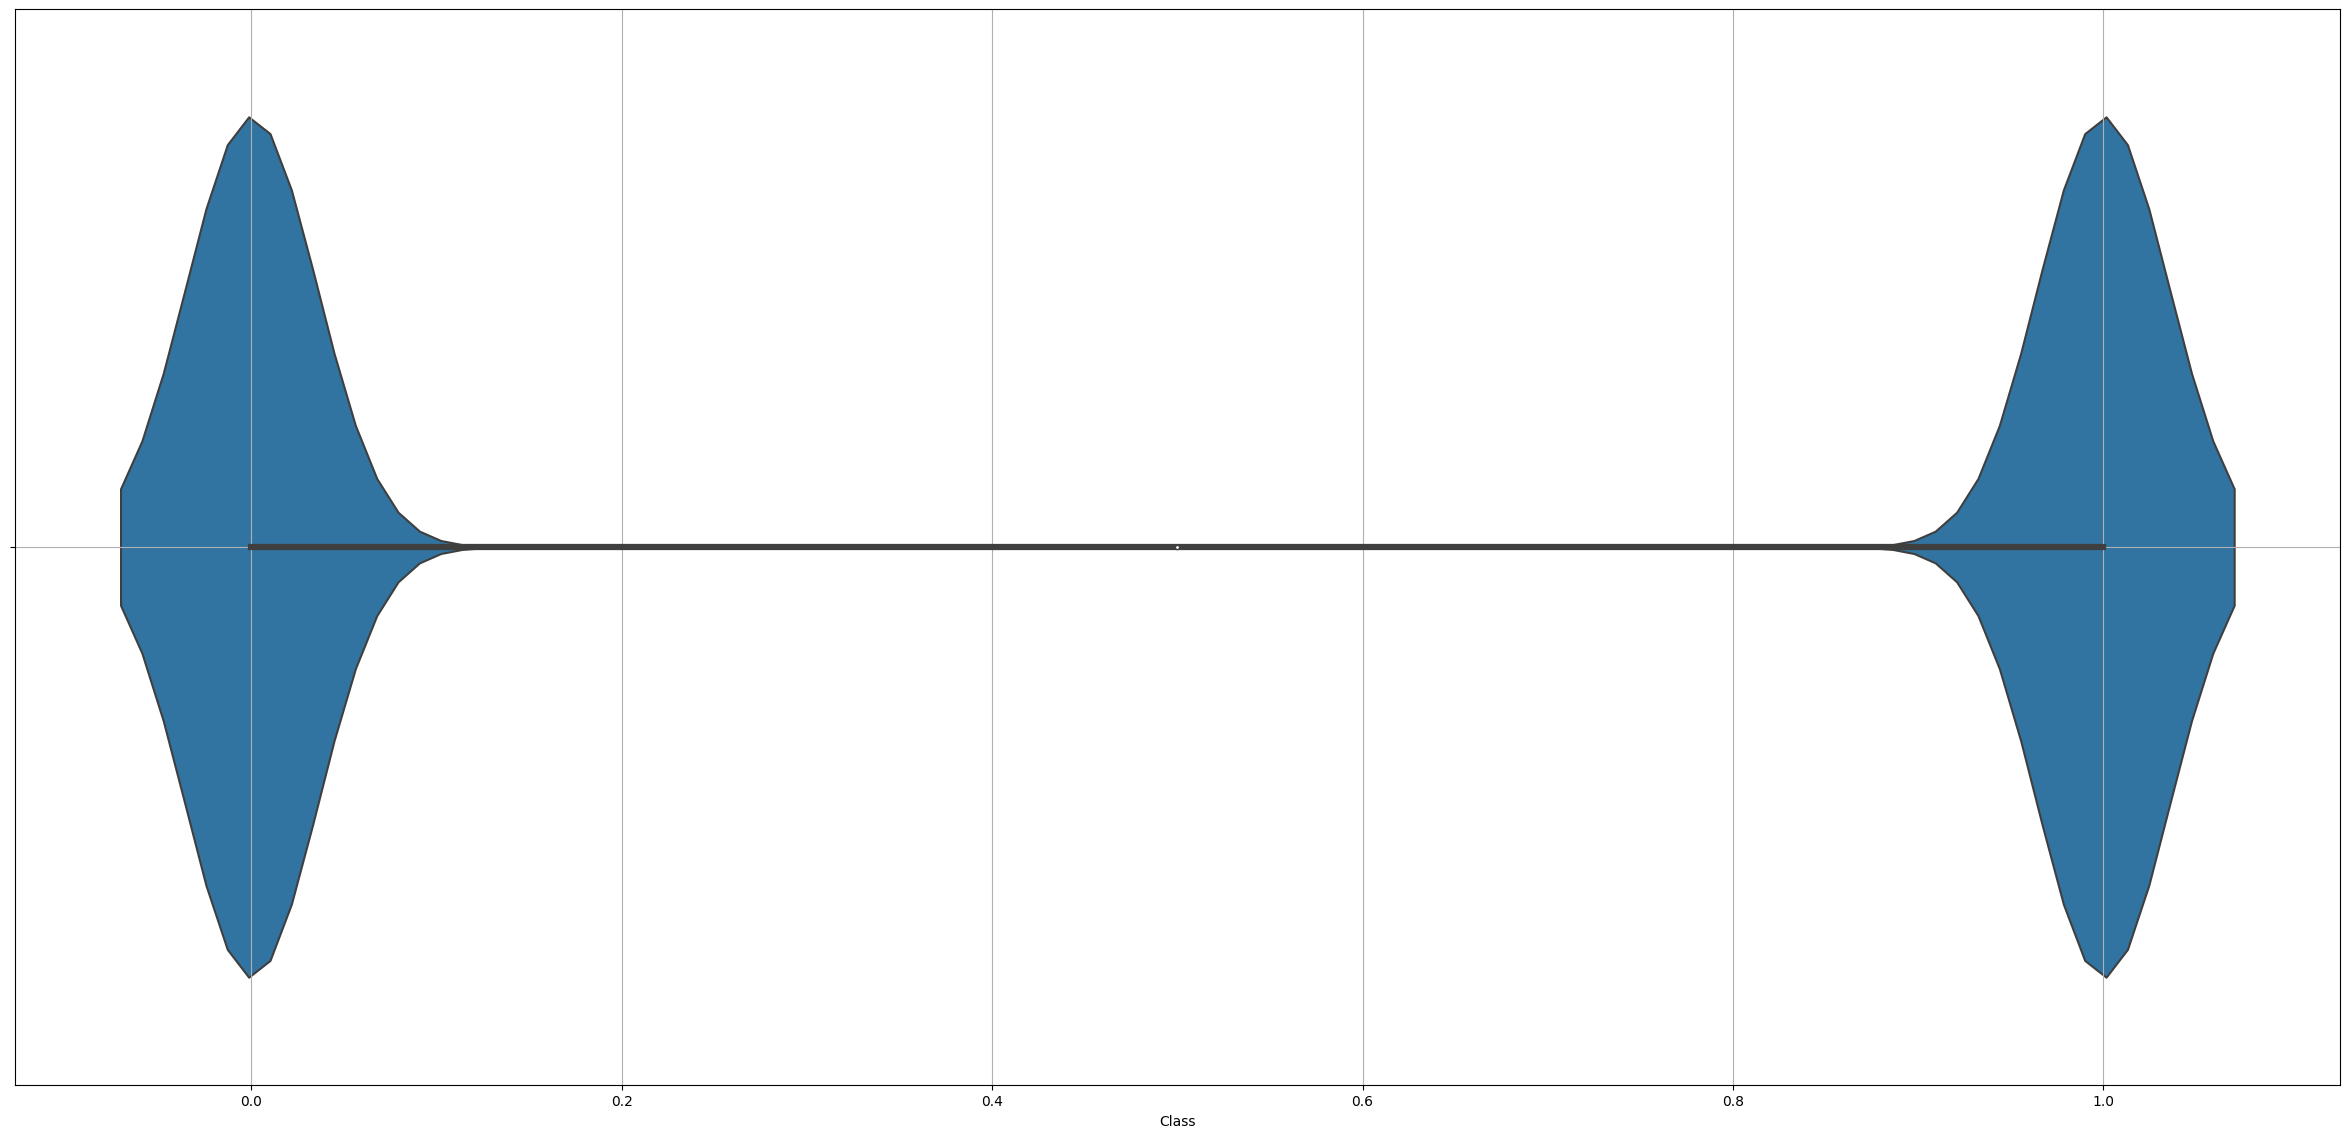

In [7]:
df_cols = list(df.keys())
df_cols[-1] = None

for i in range(len(df_cols)):
    plt.figure(figsize=(30,500))
    plt.subplot(len(df_cols),1,i+1)
    plt.title(df_cols[i])
    sns.violinplot(data=df,x='Class',y=df_cols[i])
    plt.grid(visible=True)
    plt.show()
  
    

**Post Visualization Cleaning**

In [8]:
new_df = df.copy()
new_df = new_df.drop(columns=['Amount','V28','V27','V23','V7'])
param = new_df.drop(columns= 'Class')
variances = param.mean(axis=1)
keys = param.keys()
param.apply(normalization)
target = new_df['Class']
param['Class'] = target

with open('normalized.pk','wb') as file :
    pickle.dump(param,file)



In [9]:
with open('normalized.pk','rb') as file :
    df = pickle.load(file)



**Classifier Functions**

In [10]:
def sigmoid(x,beta_1,beta_2):
    return 1/(1+np.exp(-beta_1*(x-beta_2)))

In [11]:
from sklearn.linear_model import LogisticRegression

mask = np.random.rand(len(df),1)<0.8

train = df[mask]
test = df[~mask]

train_x = train.drop(columns='Class')
train_y = train['Class']


model = LogisticRegression().fit(train_x,train_y)

with open ('model.pk','wb') as file :
    pickle.dump(model,file)
    file.close()



**Metrics**

In [12]:
def MAE(test,pred):
    return np.average(test-pred)

def MSE(test,pred):   
    return np.average((test-pred)**2)

def r2_score(test,pred):
    nume = np.sum(test-pred)
    deno = np.sum(test-np.mean(test))
    return(1-nume/deno)

**Prediction**

In [13]:
test_x = test.drop(columns='Class')
test_y = test['Class']
y_hat =model.predict(test_x)


**Testing**

In [14]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

print("The F1 Score is %f "%(f1_score(y_true=test_y,y_pred=y_hat)))
print("The Log Loss is %f "%(log_loss(y_true=test_y,y_pred=y_hat)))
print("The Classification Acurracy is %f "%(accuracy_score(y_true=test_y,y_pred=y_hat)))

The F1 Score is 0.963407 
The Log Loss is 1.301343 
The Classification Acurracy is 0.963895 


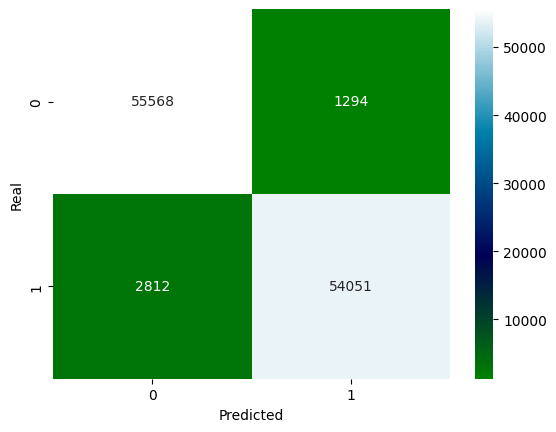

In [15]:
conf = pd.DataFrame({'real':list(test_y),'predict':y_hat})
conf_mat = pd.crosstab(conf['real'],conf['predict'],rownames=['Real'],colnames=['Predicted'])
sns.heatmap(data=conf_mat,annot=True,fmt='d',cmap='ocean')
del(conf)
del(conf_mat)
